# Sequencing

# Volcano plots

Setup

In [ ]:
# Always load same package versions
groundhog.day <- "2024-01-01"
groundhog::meta.groundhog(groundhog.day) 


Now using 'groundhog_3.1.2'.

here() starts at C:/Users/alosvendsen/Documents/R/manuscript

Successfully attached 'data.table_1.14.10'

Successfully attached 'readxl_1.4.3'

Successfully attached 'ggplot2_3.4.4'

Successfully attached 'ggrepel_0.9.4'

Successfully attached 'here_1.0.1'

## IL-6 pooled

No sig up or down regulated genes when pooling IL-6 10 and 0.1 ng/ml

In [ ]:
# Import raw data from the specified Excel file and sheet
file <- here("notebooks/seq/data_raw/IL6_vs_vehicle.xlsx")
il6_pooled_data <- read_xlsx(file, sheet = 1)


setDT(il6_pooled_data)
il6_pooled_data[logCPM > 1 & logFC > 1 & FDR < 0.05]


Empty data.table (0 rows and 8 cols): matrixrow,ENSEMBL_ID,genes,logFC,logCPM,LR...

Empty data.table (0 rows and 8 cols): matrixrow,ENSEMBL_ID,genes,logFC,logCPM,LR...

As seen in empty dataframes there are no sig up or downregulated. Also seen in the volcano plot

In [ ]:
# Create a new column for labeling differential gene expression
il6_pooled_data$diffexpressed <- "NO" # Default value for genes not differentially expressed

# Identify and label upregulated genes
# Genes with log2FoldChange > 1, FDR < 0.05, and logCPM > 1 are labeled as "UP"
il6_pooled_data$diffexpressed[il6_pooled_data$logFC > 1 & il6_pooled_data$FDR < 0.05 & il6_pooled_data$logCPM > 1] <- "UP"

# Identify and label downregulated genes
# Genes with log2FoldChange < -1, FDR < 0.05, and logCPM > 1 are labeled as "DOWN"
il6_pooled_data$diffexpressed[il6_pooled_data$logFC < -1 & il6_pooled_data$FDR < 0.05 & il6_pooled_data$logCPM > 1] <- "DOWN"

# Initialize 'delabel' column to NA for all rows to create the column
il6_pooled_data$delabel <- NA

# Now, you can safely assign gene names to the 'delabel' column for differentially expressed genes
il6_pooled_data$delabel[il6_pooled_data$diffexpressed != "NO"] <- il6_pooled_data$genes[il6_pooled_data$diffexpressed != "NO"]


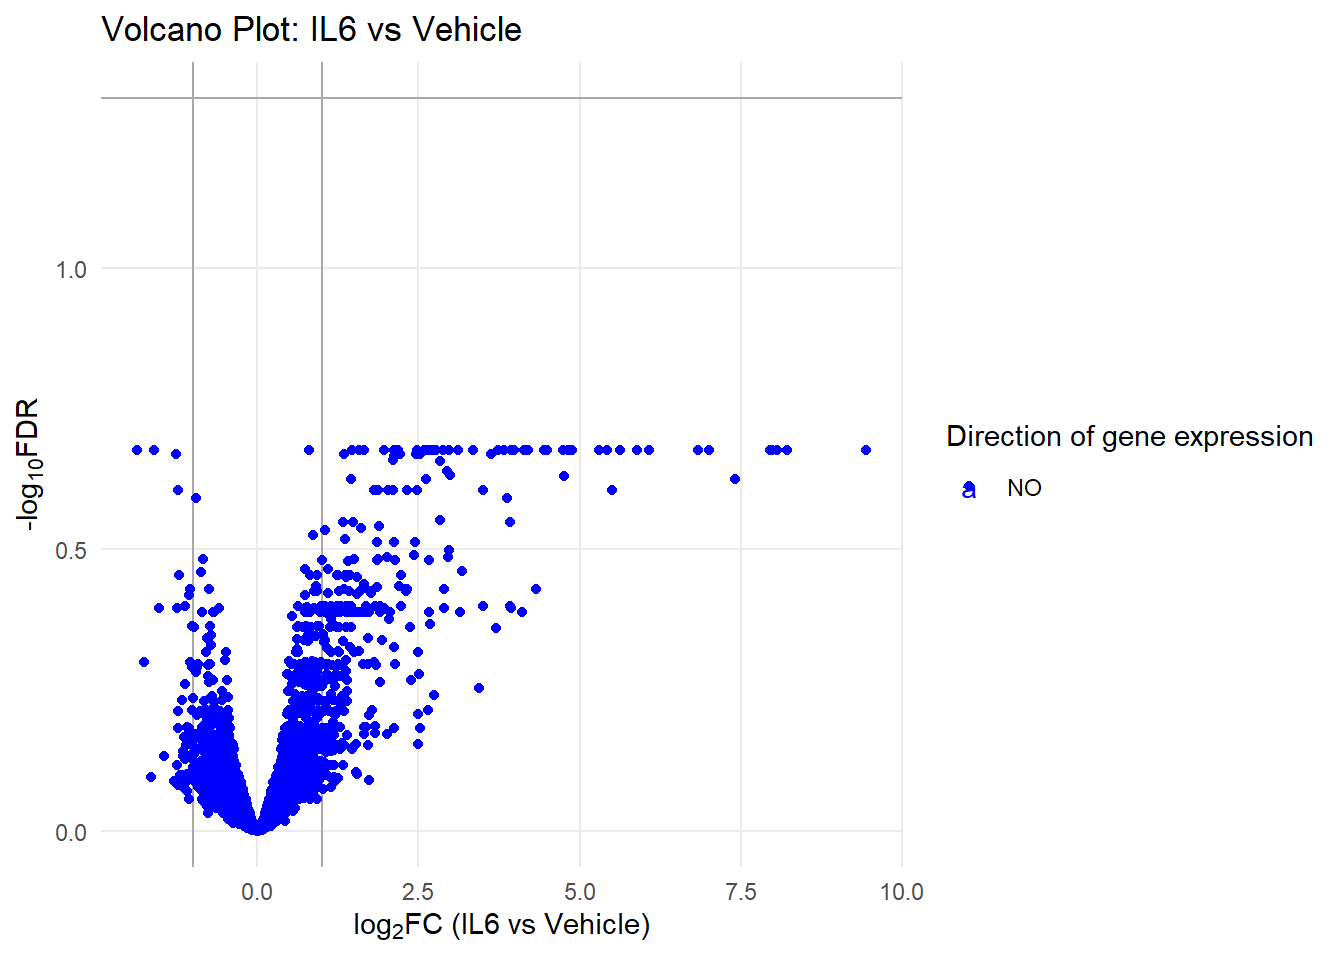

In [ ]:
# Create the volcano plot using ggplot2
plot_volcano_il6_pooled <- 
  ggplot(data=il6_pooled_data, aes(x=logFC, y=-log10(FDR), col=diffexpressed, label=delabel)) + 
    theme_minimal() + # Use a minimal theme for the plot
    geom_text_repel(max.overlaps = 7) + # Use repelling text to avoid label overlap
    scale_color_manual(values=c("blue", "black", "red")) + # Custom colors for differential expression
    geom_vline(xintercept=c(-1, 1), col="dark grey") + # Vertical lines for fold change thresholds
    geom_hline(yintercept=-log10(0.05), col="dark grey") + # Horizontal line for FDR threshold
    geom_point() + # Add points for each gene
    labs(color = 'Direction of gene expression', # Customize legend title
         x = expression("log"[2]*"FC (IL6 vs Vehicle)"), # Customize x-axis label
         y = expression("-log"[10]*"FDR")) + # Customize y-axis label
    #scale_x_continuous(breaks = seq(-11, 9, 2)) + # Customize x-axis breaks
    #scale_y_continuous(breaks = seq(0, 90, 10)) + # Customize y-axis breaks
    theme(panel.grid.minor.y = element_blank(), panel.grid.minor.x = element_blank())+ # Adjust minor grid lines
    ggtitle('Volcano Plot: IL6 vs Vehicle') # Add a title to the plot

plot_volcano_il6_pooled


## IL-6 10 ng/ml

In [ ]:
# Import raw data from the specified Excel file and sheet
file <- here("notebooks/seq/data_raw/IL6_10_vs_vehicle.xlsx")
il6_10_data <- read_xlsx(file, sheet = 1)


increasing max.overlaps

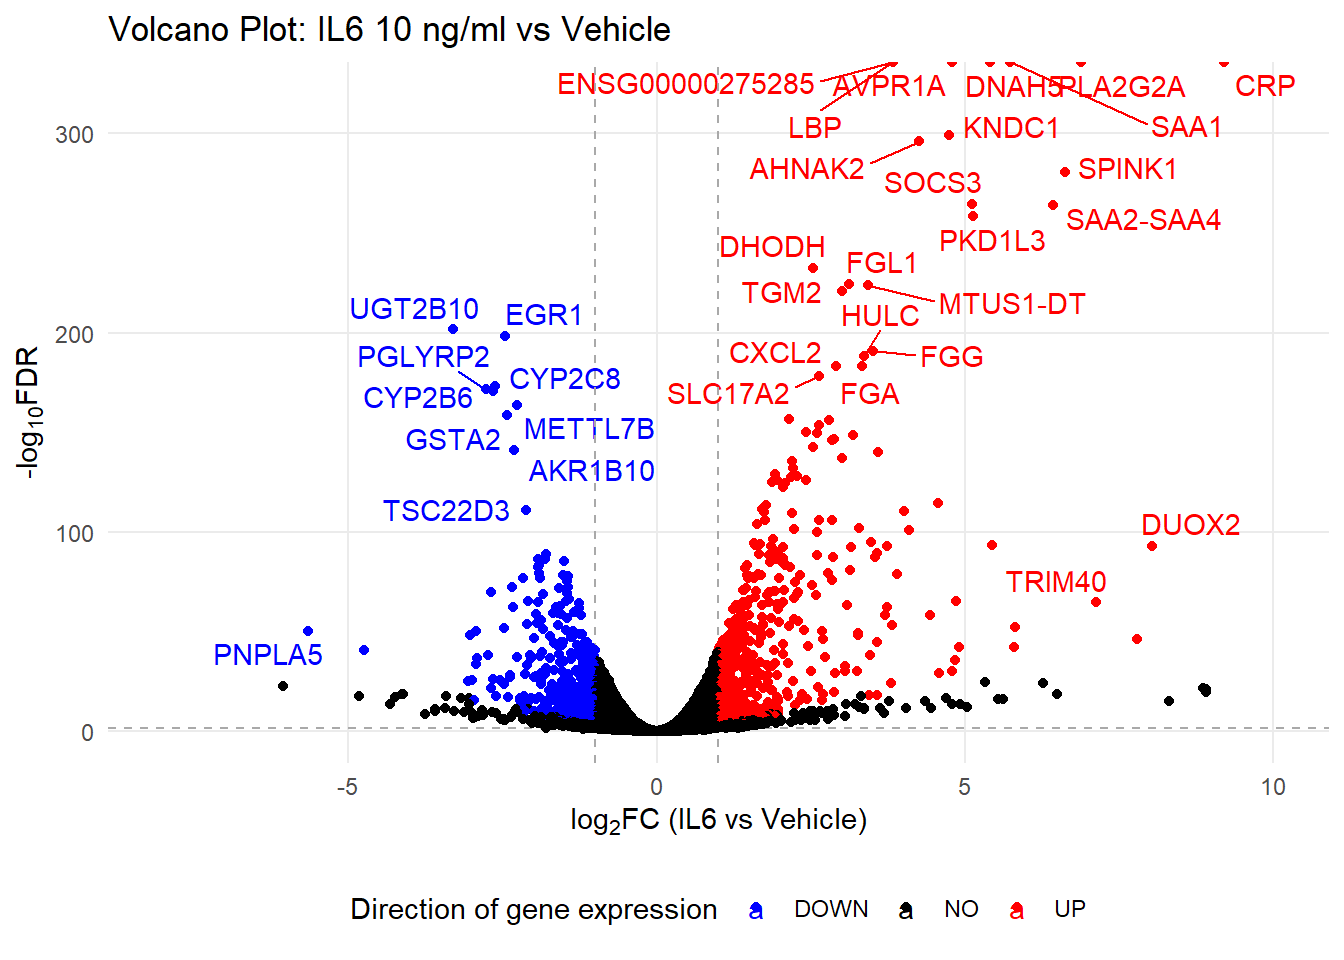

In [ ]:

# Create a new column for labeling differential gene expression
il6_10_data$diffexpressed <- "NO" # Default value for genes not differentially expressed

# Identify and label upregulated genes
# Genes with log2FoldChange > 1, FDR < 0.05, and logCPM > 1 are labeled as "UP"
il6_10_data$diffexpressed[il6_10_data$logFC > 1 & il6_10_data$FDR < 0.05 & il6_10_data$logCPM > 1] <- "UP"

# Identify and label downregulated genes
# Genes with log2FoldChange < -1, FDR < 0.05, and logCPM > 1 are labeled as "DOWN"
il6_10_data$diffexpressed[il6_10_data$logFC < -1 & il6_10_data$FDR < 0.05 & il6_10_data$logCPM > 1] <- "DOWN"

# Initialize 'delabel' column to NA for all rows to create the column
il6_10_data$delabel <- NA

# Now, you can safely assign gene names to the 'delabel' column for differentially expressed genes
il6_10_data$delabel[il6_10_data$diffexpressed != "NO"] <- il6_10_data$genes[il6_10_data$diffexpressed != "NO"]

# Create the volcano plot using ggplot2
plot_volcano_il6_10 <- 
  ggplot(data=il6_10_data, aes(x=logFC, y=-log10(FDR), col=diffexpressed, label=delabel)) + 
    theme_minimal() + # Use a minimal theme for the plot
    geom_text_repel(max.overlaps = 10) + # Use repelling text to avoid label overlap
    scale_color_manual(values=c("blue", "black", "red")) + # Custom colors for differential expression
    geom_vline(xintercept=c(-1, 1), col="dark grey", linetype = "dashed") + # Vertical lines for fold change thresholds
    geom_hline(yintercept=-log10(0.05), col="dark grey", linetype = "dashed") + # Horizontal line for FDR threshold
    geom_point() + # Add points for each gene
    labs(color = 'Direction of gene expression', # Customize legend title
         x = expression("log"[2]*"FC (IL6 vs Vehicle)"), # Customize x-axis label
         y = expression("-log"[10]*"FDR")) + # Customize y-axis label
    scale_x_continuous(limits = c(-8, 10)) + # Customize x-axis breaks
    scale_y_continuous(limits = c(0, 320)) + # Customize y-axis breaks
    theme(panel.grid.minor.y = element_blank(),# Remove minor grid lines
          panel.grid.minor.x = element_blank(),# Remove minor grid lines
          legend.position = "bottom" 
          )+ 
    ggtitle('Volcano Plot: IL6 10 ng/ml vs Vehicle') # Add a title to the plot


plot_volcano_il6_10


Trying to ad a box around the out of bounds data points. They have a smaller FDR than can be handled.

In [ ]:
# # Adjusting the dataset to include points with FDR of 0
# il6_10_data$adjusted_FDR <- ifelse(il6_10_data$FDR == 0, 340, -log10(il6_10_data$FDR))
# 
# # Create the volcano plot using ggplot2
# plot_volcano_il6_10 <- 
#   ggplot(data=il6_10_data, aes(x=logFC, y=adjusted_FDR, col=diffexpressed, label=delabel)) + 
#     theme_minimal() +
#     geom_text_repel(max.overlaps = 10) +
#     scale_color_manual(values=c("blue", "black", "red")) +
#     geom_vline(xintercept=c(-1, 1), col="dark grey", linetype = "dashed") +
#     geom_hline(yintercept=-log10(0.05), col="dark grey", linetype = "dashed") + # Use the new adjusted value
#     geom_point() +
#     labs(color = 'Direction of gene expression',
#          x = expression("log"[2]*"FC (IL6 vs Vehicle)"),
#          y = expression("-log"[10]*"Adjusted FDR")) +
#     scale_x_continuous(limits = c(-8, 10)) +
#     scale_y_continuous(limits = c(0, 450)) +
#     theme(
#       panel.grid.minor.y = element_blank(),
#       panel.grid.minor.x = element_blank(),
#       legend.position = "bottom"
#     ) +
#     annotate("rect", xmin = 1, xmax = 10, ymin = 320, ymax = 340, alpha = .2, color = "black") +
#     ggtitle('Volcano Plot: IL6 10 ng/ml vs Vehicle')
# 
# # Display the plot
# plot_volcano_il6_10


## IL-6 0.1 ng/ml

In [ ]:
# Import raw data from the specified Excel file and sheet
file <- here("notebooks/seq/data_raw/IL6_0.1_vs_vehicle.xlsx")
il6_0.1_data <- read_xlsx(file, sheet = 1)


setDT(il6_0.1_data)
il6_0.1_data[logCPM > 1 & FDR < 0.05 & logFC > 0] |> nrow()


[1] 25

[1] 8

Ikke nogen der er signifikant opreguleret når logFC \> 1 Kun to signifikant nedregulerede ved logFC \< -1

increasing max.overlaps

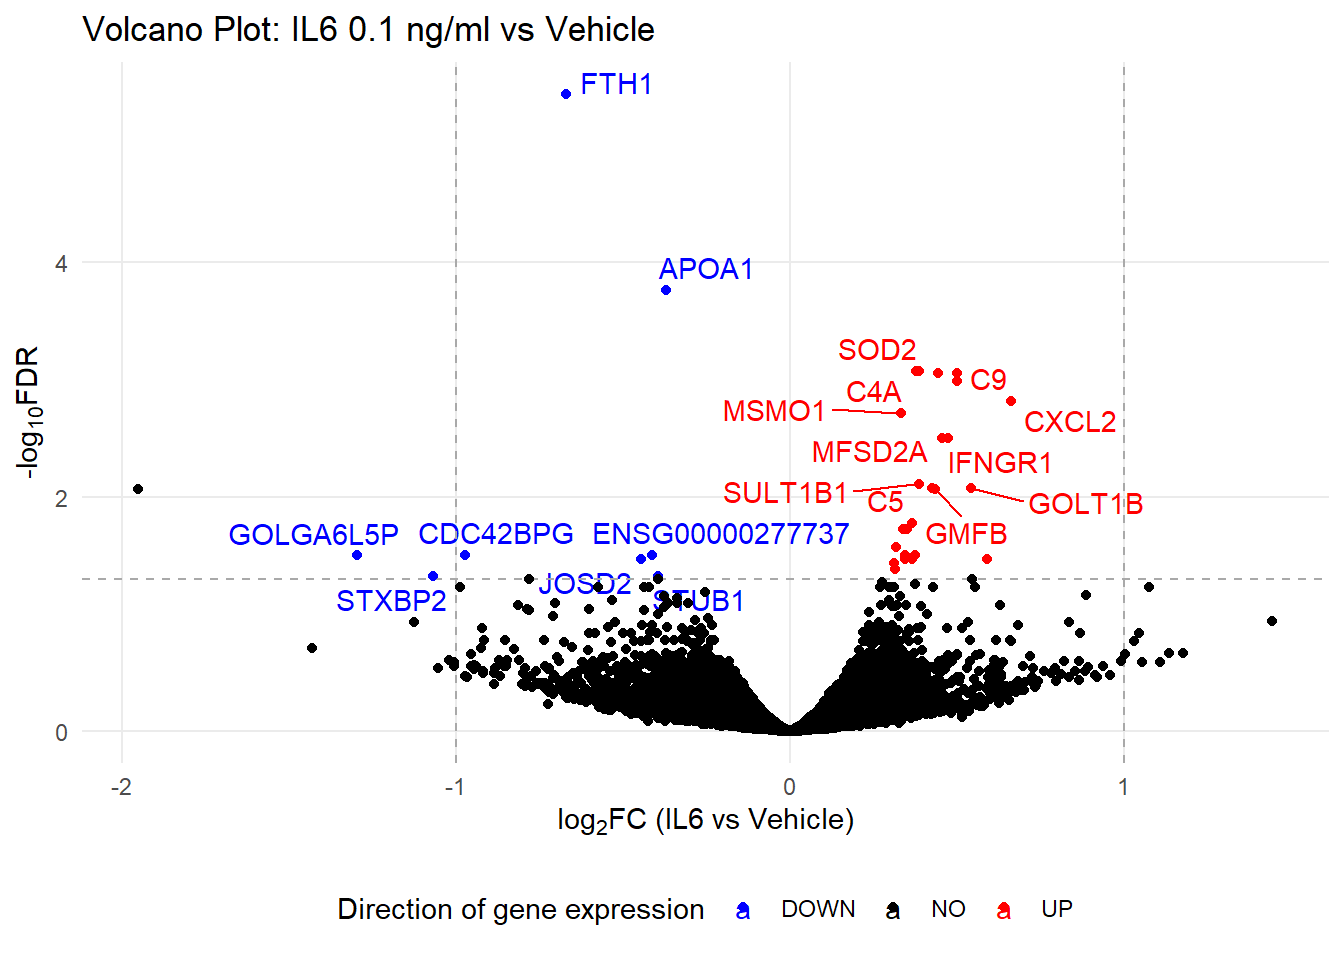

In [ ]:

# Create a new column for labeling differential gene expression
il6_0.1_data$diffexpressed <- "NO" # Default value for genes not differentially expressed

# Identify and label upregulated genes
# Genes with log2FoldChange > 1, FDR < 0.05, and logCPM > 1 are labeled as "UP"
il6_0.1_data$diffexpressed[il6_0.1_data$FDR < 0.05 & il6_0.1_data$logCPM > 1 & il6_0.1_data$logFC > 0] <- "UP"

# Identify and label downregulated genes
# Genes with log2FoldChange < -1, FDR < 0.05, and logCPM > 1 are labeled as "DOWN"
il6_0.1_data$diffexpressed[il6_0.1_data$FDR < 0.05 & il6_0.1_data$logCPM > 1 & il6_0.1_data$logFC < 0] <- "DOWN"

# Initialize 'delabel' column to NA for all rows to create the column
il6_0.1_data$delabel <- NA

# Now, you can safely assign gene names to the 'delabel' column for differentially expressed genes
il6_0.1_data$delabel[il6_0.1_data$diffexpressed != "NO"] <- il6_0.1_data$genes[il6_0.1_data$diffexpressed != "NO"]

# Create the volcano plot using ggplot2
plot_volcano_il6_0.1 <- 
  ggplot(data=il6_0.1_data, aes(x=logFC, y=-log10(FDR), col=diffexpressed, label=delabel)) + 
    theme_minimal() + # Use a minimal theme for the plot
    geom_text_repel(max.overlaps = 10) + # Use repelling text to avoid label overlap
    scale_color_manual(values=c("blue", "black", "red")) + # Custom colors for differential expression
    geom_vline(xintercept=c(-1, 1), col="dark grey", linetype = "dashed") + # Vertical lines for fold change thresholds
    geom_hline(yintercept=-log10(0.05), col="dark grey", linetype = "dashed") + # Horizontal line for FDR threshold
    geom_point() + # Add points for each gene
    labs(color = 'Direction of gene expression', # Customize legend title
         x = expression("log"[2]*"FC (IL6 vs Vehicle)"), # Customize x-axis label
         y = expression("-log"[10]*"FDR")) + # Customize y-axis label
    #scale_x_continuous(limits = c(-8, 10)) + # Customize x-axis breaks
    #scale_y_continuous(limits = c(0, 320)) + # Customize y-axis breaks
    theme(panel.grid.minor.y = element_blank(),# Remove minor grid lines
          panel.grid.minor.x = element_blank(),# Remove minor grid lines
          legend.position = "bottom" 
          )+ 
    ggtitle('Volcano Plot: IL6 0.1 ng/ml vs Vehicle') # Add a title to the plot


plot_volcano_il6_0.1


## IL-1B pooled

In [ ]:
# Import raw data from the specified Excel file and sheet
file <- here("notebooks/seq/data_raw/IL1B_vs_vehicle.xlsx")
il1B_pooled_data <- read_xlsx(file, sheet = 1)


setDT(il1B_pooled_data)
il1B_pooled_data[logCPM > 1 & FDR < 0.05 & logFC > 1] |> nrow()


[1] 241

[1] 104

increasing max.overlaps

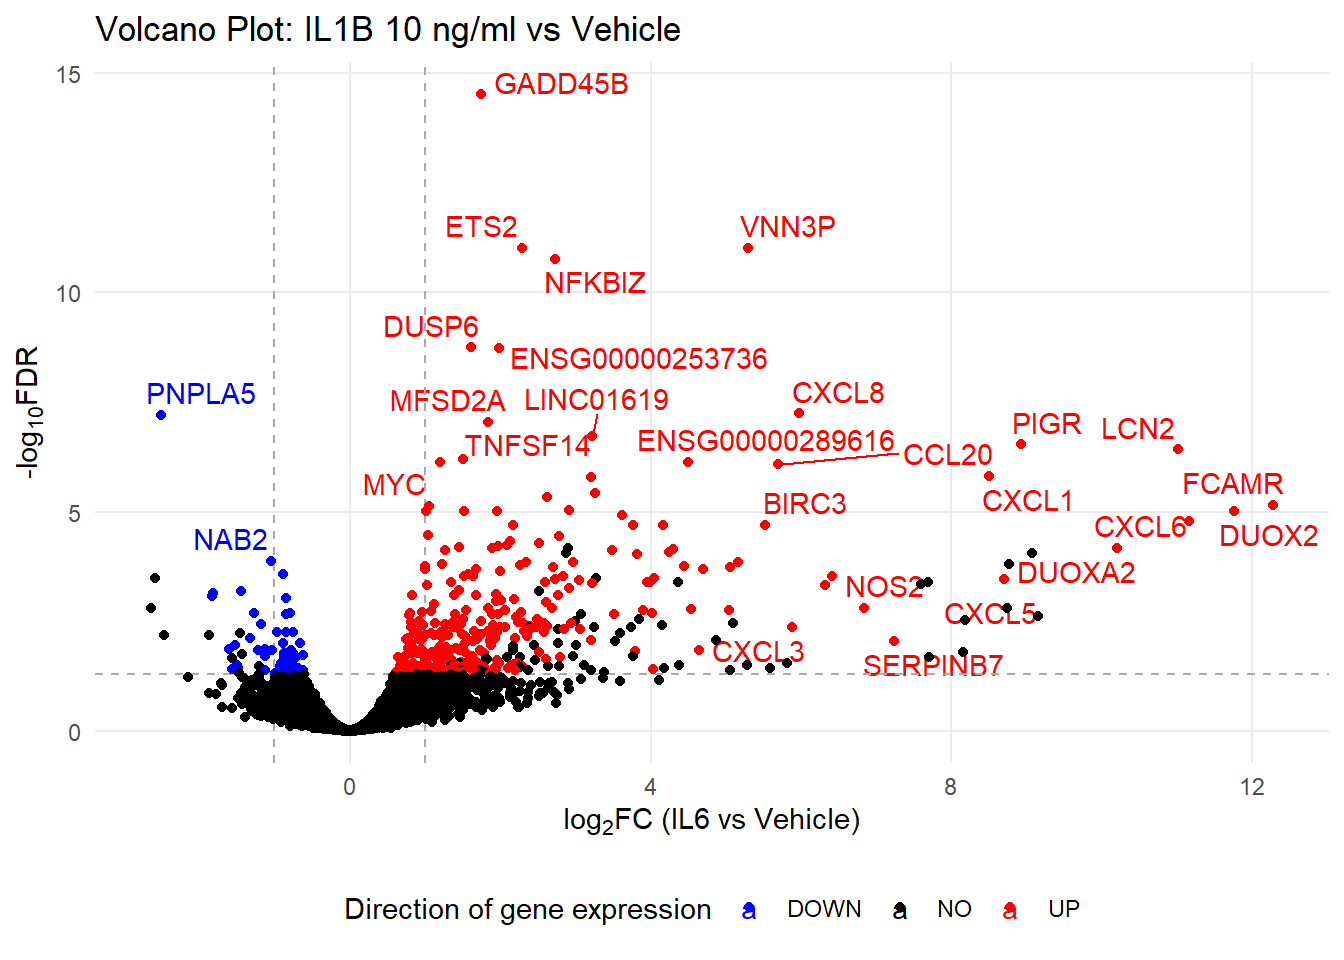

In [ ]:

# Create a new column for labeling differential gene expression
il1B_pooled_data$diffexpressed <- "NO" # Default value for genes not differentially expressed

# Identify and label upregulated genes
# Genes with log2FoldChange > 1, FDR < 0.05, and logCPM > 1 are labeled as "UP"
il1B_pooled_data$diffexpressed[il1B_pooled_data$FDR < 0.05 & il1B_pooled_data$logCPM > 1 & il1B_pooled_data$logFC > 0] <- "UP"

# Identify and label downregulated genes
# Genes with log2FoldChange < -1, FDR < 0.05, and logCPM > 1 are labeled as "DOWN"
il1B_pooled_data$diffexpressed[il1B_pooled_data$FDR < 0.05 & il1B_pooled_data$logCPM > 1 & il1B_pooled_data$logFC < 0] <- "DOWN"

# Initialize 'delabel' column to NA for all rows to create the column
il1B_pooled_data$delabel <- NA

# Now, you can safely assign gene names to the 'delabel' column for differentially expressed genes
il1B_pooled_data$delabel[il1B_pooled_data$diffexpressed != "NO"] <- il1B_pooled_data$genes[il1B_pooled_data$diffexpressed != "NO"]

# Create the volcano plot using ggplot2
plot_volcano_il1B_pooled <- 
  ggplot(data=il1B_pooled_data, aes(x=logFC, y=-log10(FDR), col=diffexpressed, label=delabel)) + 
    theme_minimal() + # Use a minimal theme for the plot
    geom_text_repel(max.overlaps = 10) + # Use repelling text to avoid label overlap
    scale_color_manual(values=c("blue", "black", "red")) + # Custom colors for differential expression
    geom_vline(xintercept=c(-1, 1), col="dark grey", linetype = "dashed") + # Vertical lines for fold change thresholds
    geom_hline(yintercept=-log10(0.05), col="dark grey", linetype = "dashed") + # Horizontal line for FDR threshold
    geom_point() + # Add points for each gene
    labs(color = 'Direction of gene expression', # Customize legend title
         x = expression("log"[2]*"FC (IL6 vs Vehicle)"), # Customize x-axis label
         y = expression("-log"[10]*"FDR")) + # Customize y-axis label
    #scale_x_continuous(limits = c(-8, 10)) + # Customize x-axis breaks
    #scale_y_continuous(limits = c(0, 320)) + # Customize y-axis breaks
    theme(panel.grid.minor.y = element_blank(),# Remove minor grid lines
          panel.grid.minor.x = element_blank(),# Remove minor grid lines
          legend.position = "bottom" 
          )+ 
    ggtitle('Volcano Plot: IL1B 10 ng/ml vs Vehicle') # Add a title to the plot


plot_volcano_il1B_pooled


## IL-1B 10 ng/ml

In [ ]:
# Import raw data from the specified Excel file and sheet
file <- here("notebooks/seq/data_raw/IL1B_10_vs_vehicle.xlsx")
il1B_10_data <- read_xlsx(file, sheet = 1)


setDT(il1B_10_data)
il1B_10_data[logCPM > 1 & FDR < 0.05 & logFC > 1] |> nrow()


[1] 648

[1] 5111

increasing max.overlaps

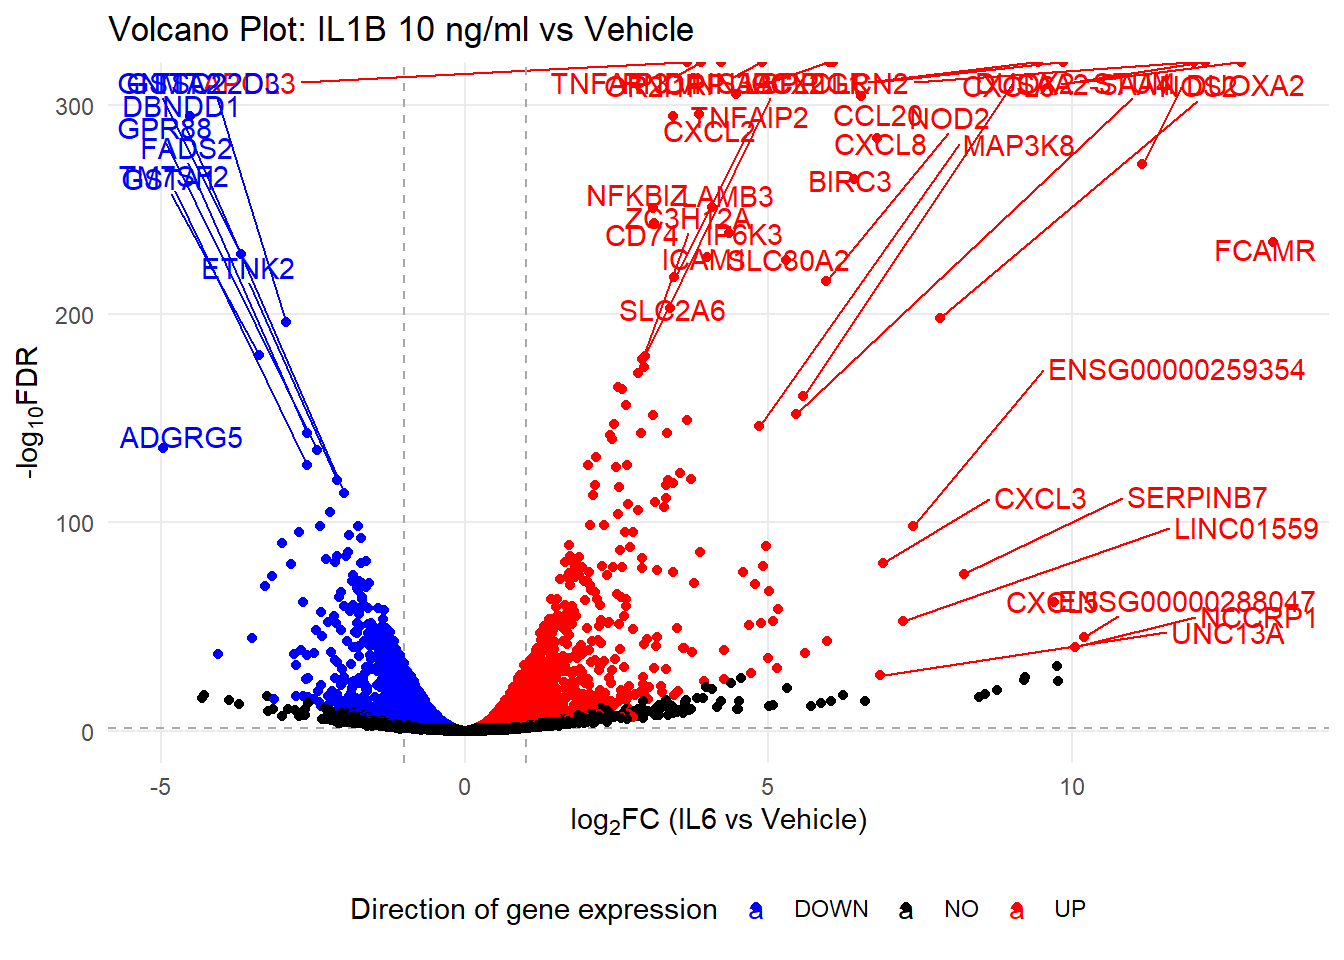

In [ ]:

# Create a new column for labeling differential gene expression
il1B_10_data$diffexpressed <- "NO" # Default value for genes not differentially expressed

# Identify and label upregulated genes
# Genes with log2FoldChange > 1, FDR < 0.05, and logCPM > 1 are labeled as "UP"
il1B_10_data$diffexpressed[il1B_10_data$FDR < 0.05 & il1B_10_data$logCPM > 1 & il1B_10_data$logFC > 0] <- "UP"

# Identify and label downregulated genes
# Genes with log2FoldChange < -1, FDR < 0.05, and logCPM > 1 are labeled as "DOWN"
il1B_10_data$diffexpressed[il1B_10_data$FDR < 0.05 & il1B_10_data$logCPM > 1 & il1B_10_data$logFC < 0] <- "DOWN"

# Initialize 'delabel' column to NA for all rows to create the column
il1B_10_data$delabel <- NA

# Now, you can safely assign gene names to the 'delabel' column for differentially expressed genes
il1B_10_data$delabel[il1B_10_data$diffexpressed != "NO"] <- il1B_10_data$genes[il1B_10_data$diffexpressed != "NO"]

# Create the volcano plot using ggplot2
plot_volcano_il1B_0.1 <- 
  ggplot(data=il1B_10_data, aes(x=logFC, y=-log10(FDR), col=diffexpressed, label=delabel)) + 
    theme_minimal() + # Use a minimal theme for the plot
    geom_text_repel(max.overlaps = 10) + # Use repelling text to avoid label overlap
    scale_color_manual(values=c("blue", "black", "red")) + # Custom colors for differential expression
    geom_vline(xintercept=c(-1, 1), col="dark grey", linetype = "dashed") + # Vertical lines for fold change thresholds
    geom_hline(yintercept=-log10(0.05), col="dark grey", linetype = "dashed") + # Horizontal line for FDR threshold
    geom_point() + # Add points for each gene
    labs(color = 'Direction of gene expression', # Customize legend title
         x = expression("log"[2]*"FC (IL6 vs Vehicle)"), # Customize x-axis label
         y = expression("-log"[10]*"FDR")) + # Customize y-axis label
    #scale_x_continuous(limits = c(-8, 10)) + # Customize x-axis breaks
    #scale_y_continuous(limits = c(0, 320)) + # Customize y-axis breaks
    theme(panel.grid.minor.y = element_blank(),# Remove minor grid lines
          panel.grid.minor.x = element_blank(),# Remove minor grid lines
          legend.position = "bottom" 
          )+ 
    ggtitle('Volcano Plot: IL1B 10 ng/ml vs Vehicle') # Add a title to the plot


plot_volcano_il1B_0.1


## IL-1B 0.1 ng/ml

In [ ]:
# Import raw data from the specified Excel file and sheet
file <- here("notebooks/seq/data_raw/IL1B_0.1_vs_vehicle.xlsx")
il1B_0.1_data <- read_xlsx(file, sheet = 1)


setDT(il1B_0.1_data)
il1B_0.1_data[logCPM > 1 & FDR < 0.05 & logFC > 1] |> nrow()


[1] 106

[1] 684

increasing max.overlaps

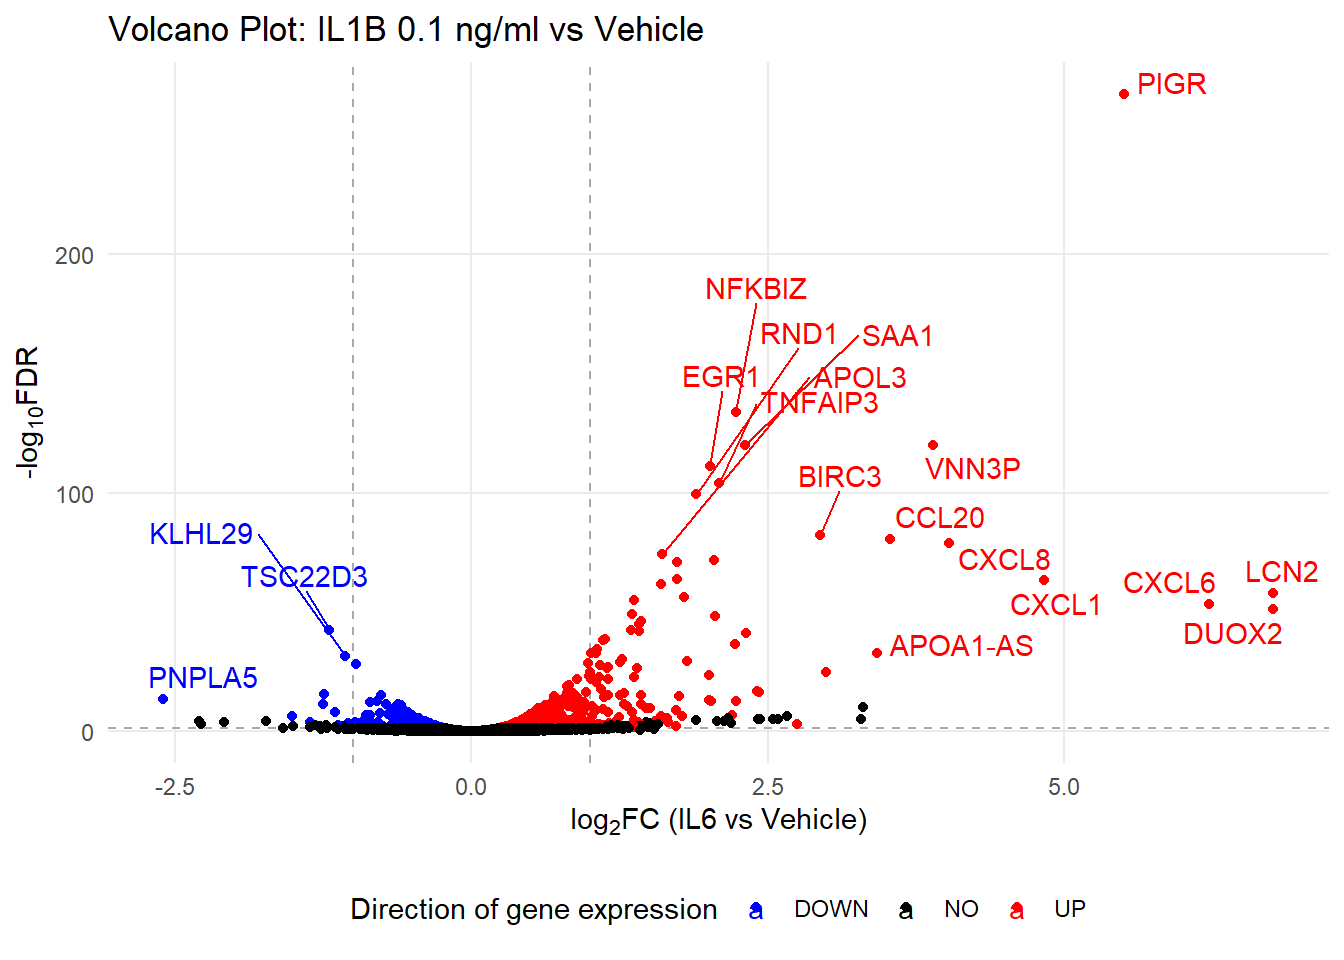

In [ ]:

# Create a new column for labeling differential gene expression
il1B_0.1_data$diffexpressed <- "NO" # Default value for genes not differentially expressed

# Identify and label upregulated genes
# Genes with log2FoldChange > 1, FDR < 0.05, and logCPM > 1 are labeled as "UP"
il1B_0.1_data$diffexpressed[il1B_0.1_data$FDR < 0.05 & il1B_0.1_data$logCPM > 1 & il1B_0.1_data$logFC > 0] <- "UP"

# Identify and label downregulated genes
# Genes with log2FoldChange < -1, FDR < 0.05, and logCPM > 1 are labeled as "DOWN"
il1B_0.1_data$diffexpressed[il1B_0.1_data$FDR < 0.05 & il1B_0.1_data$logCPM > 1 & il1B_0.1_data$logFC < 0] <- "DOWN"

# Initialize 'delabel' column to NA for all rows to create the column
il1B_0.1_data$delabel <- NA

# Now, you can safely assign gene names to the 'delabel' column for differentially expressed genes
il1B_0.1_data$delabel[il1B_0.1_data$diffexpressed != "NO"] <- il1B_0.1_data$genes[il1B_0.1_data$diffexpressed != "NO"]

# Create the volcano plot using ggplot2
plot_volcano_il1B_0.1 <- 
  ggplot(data=il1B_0.1_data, aes(x=logFC, y=-log10(FDR), col=diffexpressed, label=delabel)) + 
    theme_minimal() + # Use a minimal theme for the plot
    geom_text_repel(max.overlaps = 7) + # Use repelling text to avoid label overlap
    scale_color_manual(values=c("blue", "black", "red")) + # Custom colors for differential expression
    geom_vline(xintercept=c(-1, 1), col="dark grey", linetype = "dashed") + # Vertical lines for fold change thresholds
    geom_hline(yintercept=-log10(0.05), col="dark grey", linetype = "dashed") + # Horizontal line for FDR threshold
    geom_point() + # Add points for each gene
    labs(color = 'Direction of gene expression', # Customize legend title
         x = expression("log"[2]*"FC (IL6 vs Vehicle)"), # Customize x-axis label
         y = expression("-log"[10]*"FDR")) + # Customize y-axis label
    #scale_x_continuous(limits = c(-8, 10)) + # Customize x-axis breaks
    #scale_y_continuous(limits = c(0, 320)) + # Customize y-axis breaks
    theme(panel.grid.minor.y = element_blank(),# Remove minor grid lines
          panel.grid.minor.x = element_blank(),# Remove minor grid lines
          legend.position = "bottom" 
          )+ 
    ggtitle('Volcano Plot: IL1B 0.1 ng/ml vs Vehicle') # Add a title to the plot


plot_volcano_il1B_0.1


## Abemaciclib 5 µM

In [ ]:
# Import raw data from the specified Excel file and sheet
file <- here("notebooks/seq/data_raw/abe_vs_vehicle.xlsx")
abe_data <- read_xlsx(file, sheet = 1)


setDT(abe_data)
abe_data[logCPM > 1 & FDR < 0.05 & logFC > 1] 


     matrixrow      ENSEMBL_ID           genes    logFC   logCPM         LR
  1:      1656 ENSG00000140470        ADAMTS17 2.736348 6.631470 569.837805
  2:      4904 ENSG00000161896           IP6K3 2.729978 4.906166 441.472543
  3:      5856 ENSG00000157557            ETS2 2.826833 4.472978 371.842471
  4:      6006 ENSG00000169258          GPRIN1 3.182320 4.438138 368.052632
  5:      1033 ENSG00000156510           HKDC1 2.291036 7.161496 338.469713
 ---                                                                       
543:     11113 ENSG00000069812            HES2 1.055350 1.028193  11.189460
544:     10925 ENSG00000266313 ENSG00000266313 1.019175 1.183450  10.890585
545:     10956 ENSG00000232679       LINC01705 1.006567 1.166972   9.967888
546:     11004 ENSG00000120334           CENPL 1.104778 1.134940   8.230452
547:     10463 ENSG00000163399          ATP1A1 1.028020 1.509585   7.652900
            PValue           FDR
  1: 6.089737e-126 9.712369e-123
  2:  5.175655e-98  3.

      matrixrow      ENSEMBL_ID     genes      logFC    logCPM          LR
   1:       193 ENSG00000124253      PCK1 -7.3910348  8.918734 2613.265382
   2:       278 ENSG00000138115    CYP2C8 -4.0321531  8.470964 1187.675046
   3:        82 ENSG00000197408    CYP2B6 -2.8311130 10.051964  729.734930
   4:       120 ENSG00000134240    HMGCS2 -2.8577733  9.588448  708.417598
   5:      2647 ENSG00000157087    ATP2B2 -3.1479931  5.947785  687.874644
  ---                                                                     
5912:       162 ENSG00000108654      DDX5  0.2229198  9.205413    4.839048
5913:      3249 ENSG00000186815     TPCN1 -0.2558597  5.666161    4.837830
5914:      7447 ENSG00000151320     AKAP6 -0.3351600  3.669124    4.833075
5915:     10108 ENSG00000137970    RPL7P9  0.5536888  1.801992    4.827948
5916:     11100 ENSG00000226696 LENG8-AS1 -0.6814634  1.042936    4.823560
             PValue           FDR
   1:  0.000000e+00  0.000000e+00
   2: 2.909826e-260 1.856323e-25

In [ ]:
# #| label: fig-abemaceclib
# #| fig-cap: "Volcano plot. Abemaciclib vs. vehicle control. Vertical lines for fold change thresholds"
# #| warning: false
# 
# # Create a new column for labeling differential gene expression
# abe_data$diffexpressed <- "NO" # Default value for genes not differentially expressed
# 
# # Identify and label upregulated genes
# # Genes with log2FoldChange > 1, FDR < 0.05, and logCPM > 1 are labeled as "UP"
# abe_data$diffexpressed[abe_data$FDR < 0.05 & abe_data$logCPM > 1 & abe_data$logFC > 0] <- "UP"
# 
# # Identify and label downregulated genes
# # Genes with log2FoldChange < -1, FDR < 0.05, and logCPM > 1 are labeled as "DOWN"
# abe_data$diffexpressed[abe_data$FDR < 0.05 & abe_data$logCPM > 1 & abe_data$logFC < 0] <- "DOWN"
# 
# # Initialize 'delabel' column to NA for all rows to create the column
# abe_data$delabel <- NA
# 
# # Now, you can safely assign gene names to the 'delabel' column for differentially expressed genes
# abe_data$delabel[abe_data$diffexpressed != "NO"] <- abe_data$genes[abe_data$diffexpressed != "NO"]
# 
# # Create the volcano plot using ggplot2
# plot_volcano_abe <- 
#   ggplot(data=abe_data, aes(x=logFC, y=-log10(FDR), col=diffexpressed, label=delabel)) + 
#     theme_minimal() + # Use a minimal theme for the plot
#     geom_text_repel() + # Use repelling text to avoid label overlap
#     scale_color_manual(values=c("blue", "black", "red")) + # Custom colors for differential expression
#     geom_vline(xintercept=c(-1, 1), col="dark grey", linetype = "dashed") + # Vertical lines for fold change thresholds
#     geom_hline(yintercept=-log10(0.05), col="dark grey", linetype = "dashed") + # Horizontal line for FDR threshold
#     geom_point() + # Add points for each gene
#     labs(color = 'Direction of gene expression', # Customize legend title
#          x = expression("log"[2]*"FC (IL6 vs Vehicle)"), # Customize x-axis label
#          y = expression("-log"[10]*"FDR")) + # Customize y-axis label
#     #scale_x_continuous(limits = c(-8, 10)) + # Customize x-axis breaks
#     #scale_y_continuous(limits = c(0, 320)) + # Customize y-axis breaks
#     theme(panel.grid.minor.y = element_blank(),# Remove minor grid lines
#           panel.grid.minor.x = element_blank(),# Remove minor grid lines
#           legend.position = "bottom",
#           panel.background = element_rect(fill = "white")
#           )+ 
#   coord_flip() +
#     ggtitle('Volcano Plot: 5 µM abemaciclib vs Vehicle') # Add a title to the plot 
# 
# 
# 
# plot_volcano_abe
# 
# ggsave(filename = here("notebooks/seq/output/abe_volcano.png"))


# GSEA

## Pathway/gene set enrichment analysis

After differential gene expression (DGE) analysis we have a long list of differentially expressed genes. Pathway enrichment analysis (PEA) is a common approach to summarise this long list of genes and interpret hundreds of DGEs at once. So instead of having a list of 20 000 genes, we may get a list of 50 or 60 biological pathways.

<figure>
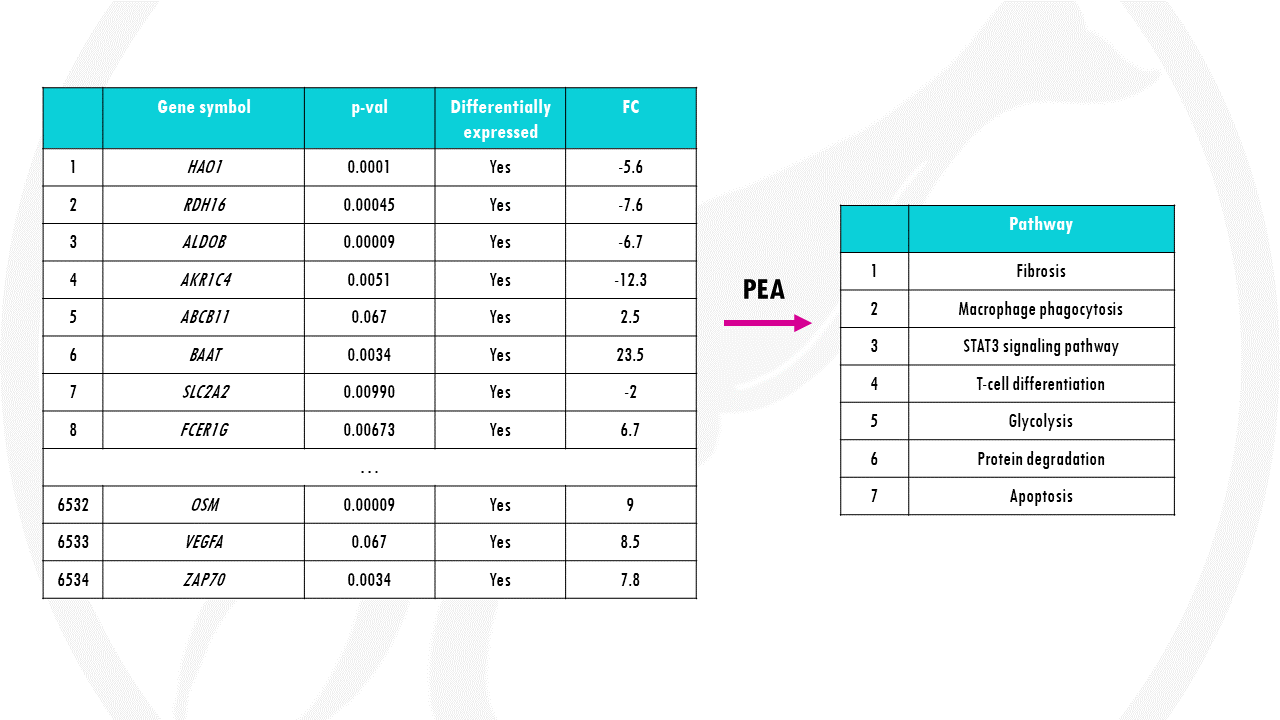
<figcaption aria-hidden="true">Summarise lists of DGEs to pathways</figcaption>
</figure>

Pathway enrichment analysis summarises the long gene list to a shorter and more easily interpretable list of pathways.

### How does PEA work?

For a pathway enrichment analysis we need 3 ingredients.

1.  Our **gene list** of interest, fx. a list of DGEs which we want to summarise.
2.  A list of **background genes** - fx all of the genes in the human genome/transcriptome.
3.  A list of **gene sets**. Gene sets are basically groups of related genes. Of course, for the algorithm to know if your list has a lot of genes related to breast cancer, or apoptosis, or cellular respiration, you need to tell it which genes are actually involved in breast cancer, apoptosis, and cellular respiration.

<figure>
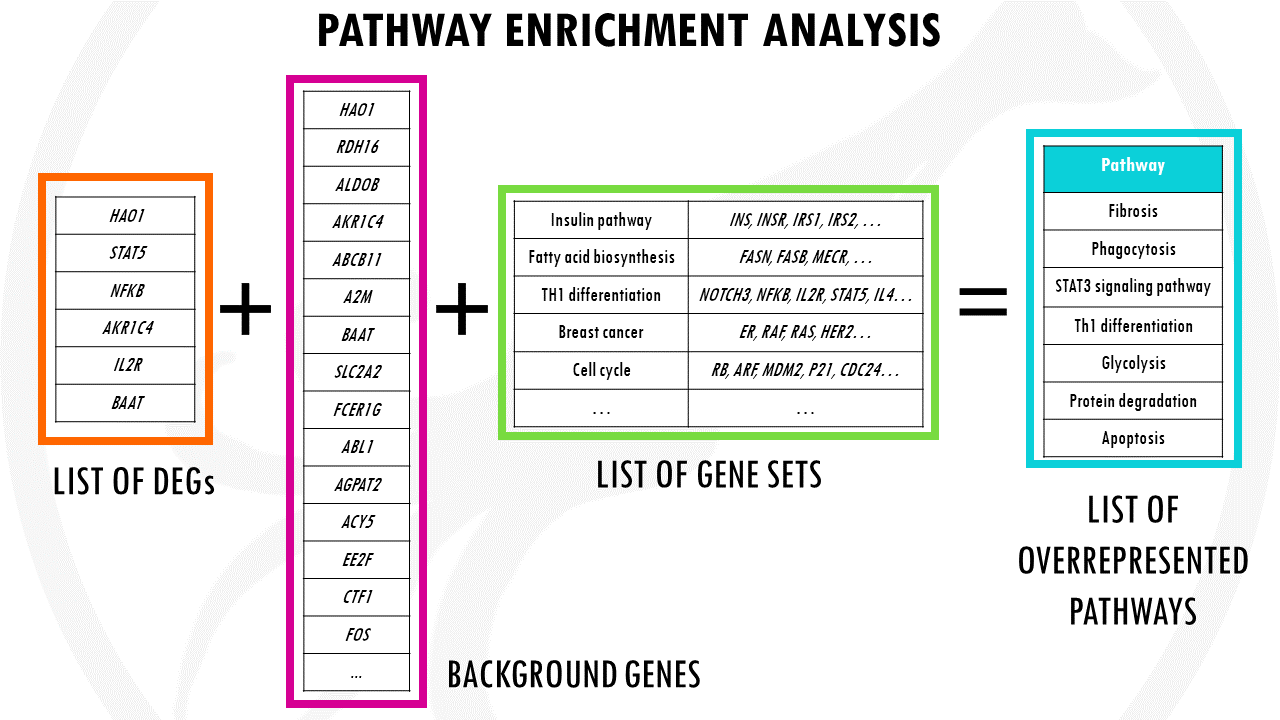
<figcaption aria-hidden="true">Components of a pathway enrichment analysis</figcaption>
</figure>

PEA essentially compares our gene list to the background list to check if there are certain pathways **overrepresented**

One example could be: Alcoholic liver disease is usually involved in inflammatory processes, which often involve pro-inflammatory cytokines like IL-6. So, is there an **association** between our genes differentially expressed in alcoholic liver disease vs healthy cells and IL-6 production.

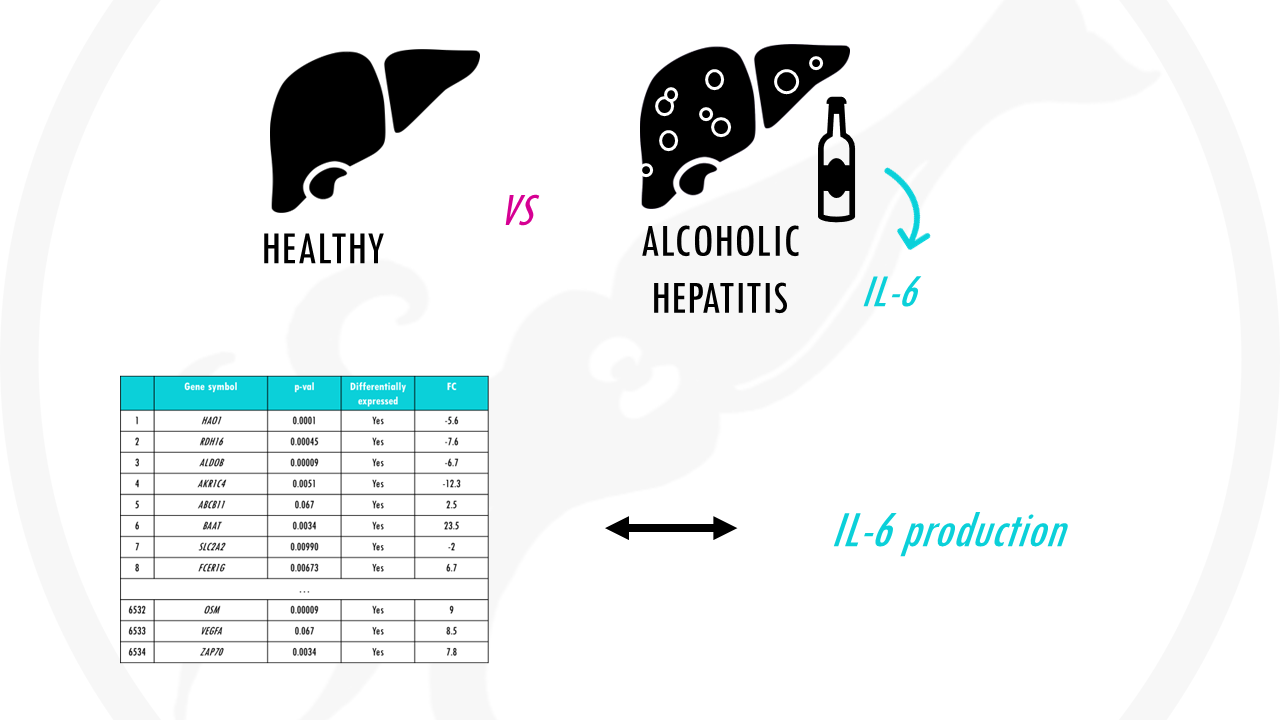

Is our list of DGEs **enriched** with genes involved in IL-6 synthesis pathway?

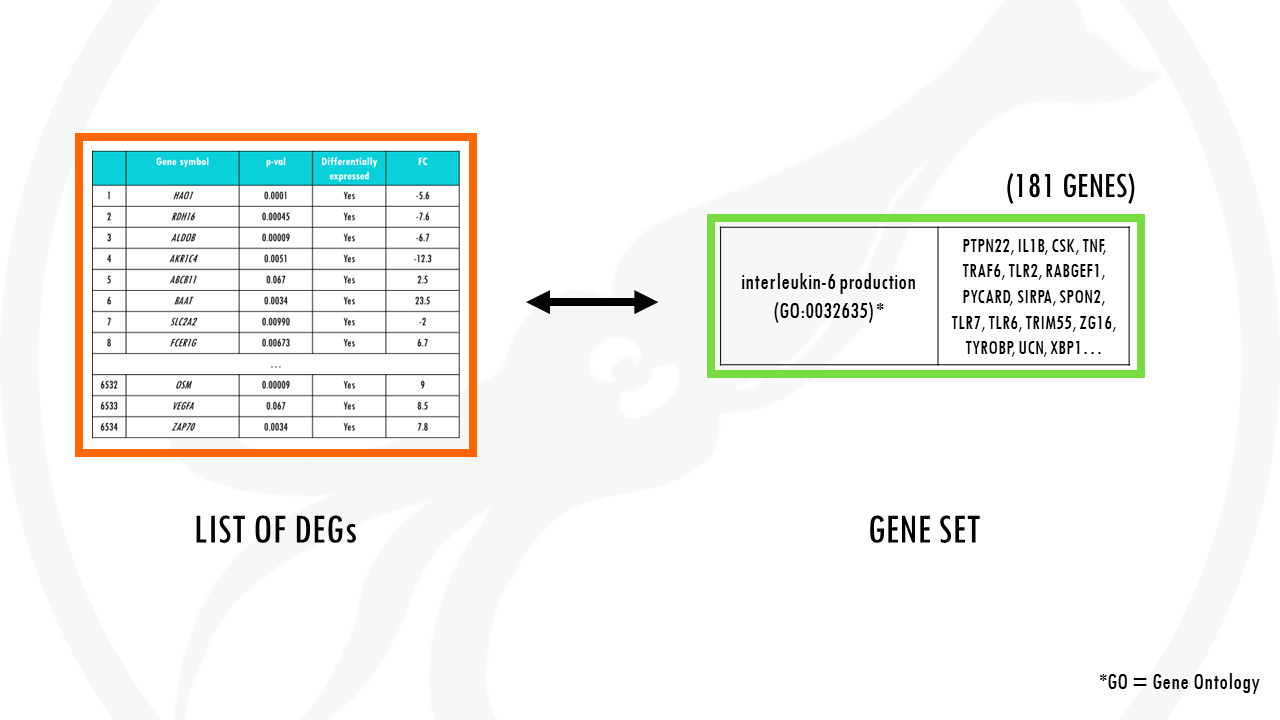

To answer this question, we can build a contigency table. This will help us determine whether the fraction of genes of interest in the pathway is higher compared to the fraction of genes outside the pathway (so, backgound set). See the table below.

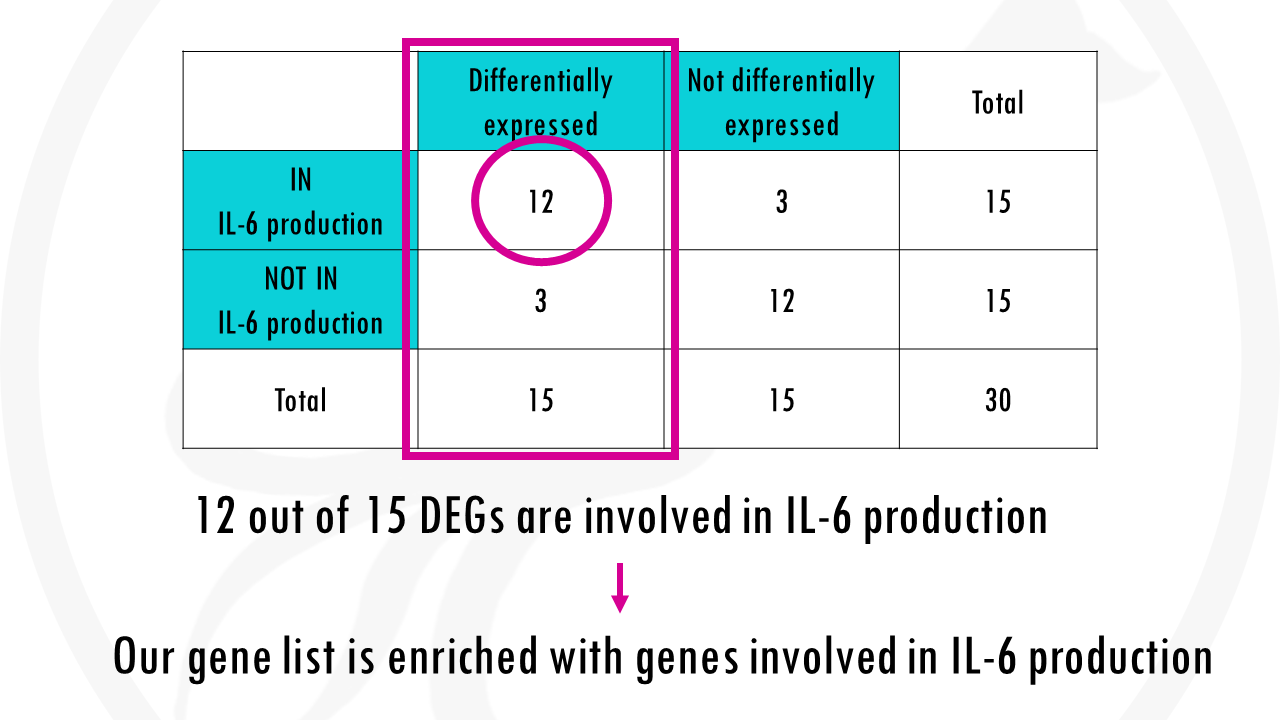

We have a column for differentially expressed and a column not differentially expressed genes, and then two rows, for genes that are annotated as being involved in IL-6 production and genes that are not involved in IL6 production.

To simplify things a lot, we will just look at 30 genes. 15 deferentially expressed genes were identified and of those, 12 genes were associated with the GO term interleukin-6 production.

We find that **12 of our 15** differentially expressed genes are involved in IL-6 production. We could quite confidently say that **our gene list is enriched with genes involved in IL-6 production.**

But what if there was 9 of our 15 involved in IL-6 production. is our gene list enriched with genes involved in IL-6 production? We need an objective statistical test to determine what is enriched and what is not. There are many methods, by the one that is commonly used in pathway enrichment analysis is fisher’s exact test. I our p-value is really lwo we can safely say that our list is overrepresented with genes involved in IL-6 production, in other words, IL-6 prodcution is an immportant pathway in alchoholic liver diseases compared to healthy liver cells. Becayse we a testing thousands of pathways we till have to adjust p-values with a multiple-testing correction method.

Pathway enrichment analysis takes your **gene list** of interest and compares it to a **list of background genes** to check if there are certain pathways that are over-represented.

So it checks the fraction of your genes annotated to a specific Gene Ontology (GO) term. Then it checks the proportion of genes in the whole genome (your background set) that are annotated to that GO Term.

Then, it gives you a **p-value** which tells you what is the probability that that pathway is actually over-represented in your gene list and it wasn’t just coincidence.

### Our analysis

Mark Burton have done the GSE analysis using four different databases, outlined below. I think we just use the vehicle control as the list of background genes. Otherwise he must have used some subset of only genes/pathways related to PHHs.

Gene Ontology (GO), KEGG, Reactome, and BioCarta are databases and tools that provide comprehensive information on gene and protein functions, interactions, and pathways. Each has its unique focus and strengths:

1.  **Gene Ontology (GO)**

    -   **Focus:** Provides a standardized vocabulary (ontologies) to describe gene and protein roles in cells. It covers three domains: Biological Process (BP), which describes the biological objectives to which the gene or gene product contributes; Molecular Function (MF), which describes the elemental activities of a gene product at the molecular level, such as binding or catalysis; and Cellular Component (CC), which describes where in the cell the gene product is active.

    -   **Strengths:** Widely used for annotating genes and gene products across species; facilitates consistent descriptions of gene products even in the context of different studies.

2.  **Kyoto Encyclopedia of Genes and Genomes (KEGG)**

    -   **Focus:** Integrates genomic, chemical, and systemic functional information. KEGG provides pathways maps that represent molecular interaction and reaction networks, covering metabolism, genetic information processing, environmental information processing, cellular processes, organismal systems, and human diseases.

    -   **Strengths:** Comprehensive in linking genes to functions through networks of interactions; useful for understanding high-level functions and utilities of the biological system.

3.  **Reactome**

    -   **Focus:** A curated database of pathways and reactions in human biology. Reactome pathways encompass various processes such as metabolism, signal transduction, gene expression, and cell cycle. It aims to provide a detailed, visual representation of molecular processes.

    -   **Strengths:** Highly detailed and manually curated; provides an interactive pathway browser that facilitates the exploration of complex biological pathways; also includes pathways from other species, providing a comparative perspective.

4.  **BioCarta**

    -   **Focus:** Earlier widely used for providing graphical representations of molecular pathways, focusing on various biological and signaling pathways. BioCarta’s pathways were known for highlighting the interactions between different molecules and the potential regulation mechanisms.

    -   **Strengths:** Although less updated and less comprehensive than other databases mentioned, BioCarta pathways have been historically significant for offering insights into specific signaling and molecular pathways, contributing to the understanding of complex biological processes.

## Visualization of GSEA

#### Setup

In [ ]:
library(here)
library(readxl)
library(tidyverse)


── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.3     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ lubridate 1.9.3     ✔ tibble    3.2.1
✔ purrr     1.0.2     ✔ tidyr     1.3.0
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::between()     masks data.table::between()
✖ dplyr::filter()      masks stats::filter()
✖ dplyr::first()       masks data.table::first()
✖ lubridate::hour()    masks data.table::hour()
✖ lubridate::isoweek() masks data.table::isoweek()
✖ dplyr::lag()         masks stats::lag()
✖ dplyr::last()        masks data.table::last()
✖ lubridate::mday()    masks data.table::mday()
✖ lubridate::minute()  masks data.table::minute()
✖ lubridate::month()   masks data.table::month()
✖ lubridate::quarter() masks data.table::quarter()
✖ lubridate::second()  masks data.table::second()
✖ purrr::transpose()   masks data.table::transpose()
✖ lubridate::wday()    masks data.table::wd

### IL-1B 10 ng

#### KEGG

Testing just KEGG. Getting the code to work for one file.

In [ ]:
path_raw_data <- here("notebooks/seq/data_raw/GSEA/")
gsea_data <- read_excel(here(path_raw_data, "KEGG_IL1B_10_vs_vehicle.xlsx"))


In [ ]:
plot_data <- 
  arrange(gsea_data, -abs(NES)) %>% 
    group_by(sign(NES)) %>%
    slice(1:20)


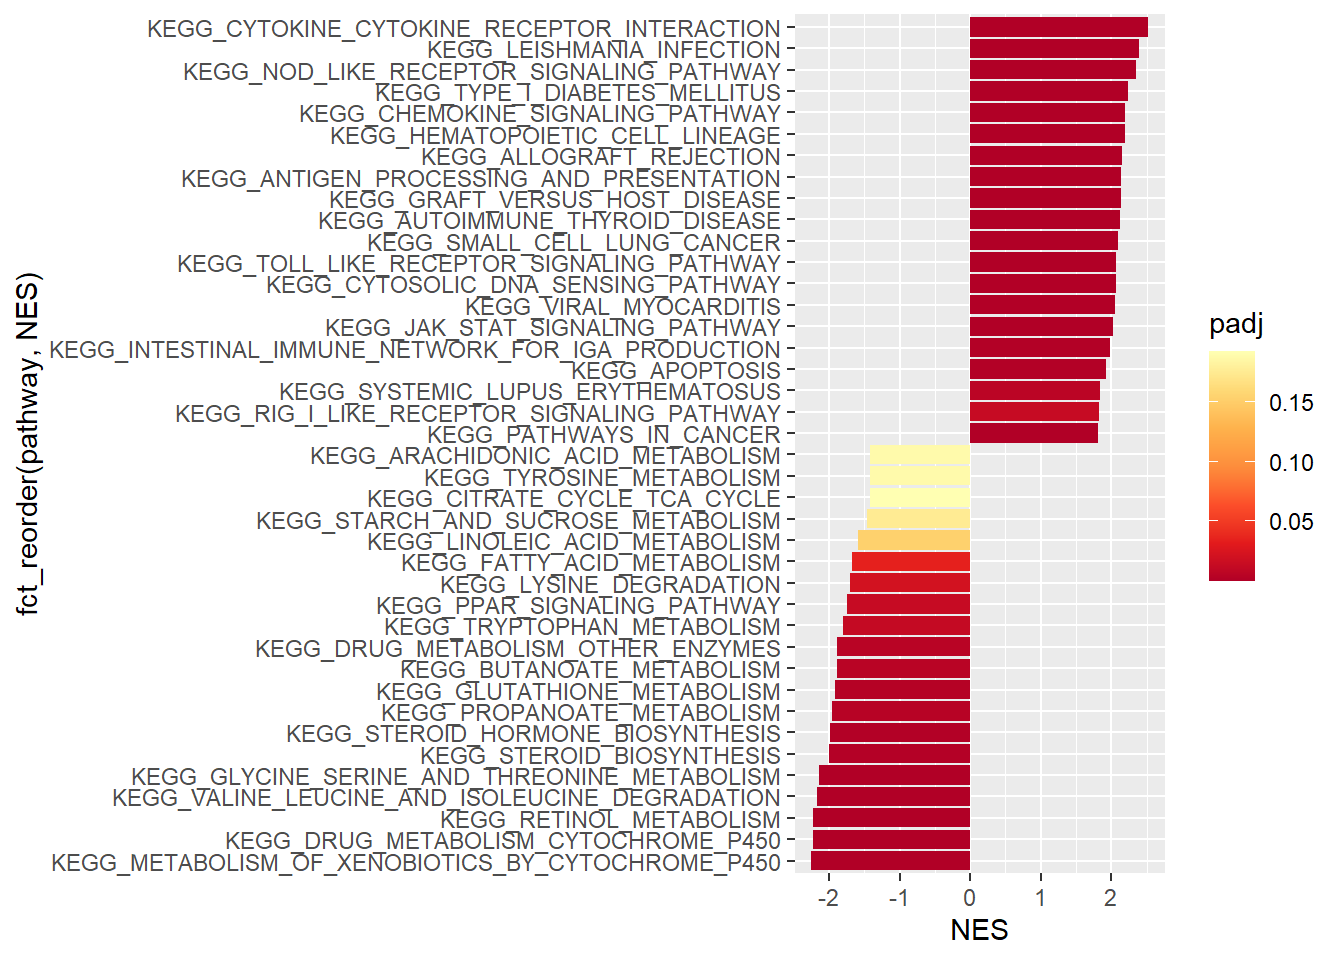

In [ ]:
ggplot(data = plot_data,
       aes(x = NES,
           y = fct_reorder(pathway, NES),
           fill = padj
           )
       ) +
  geom_bar(stat = "identity") +
  scale_fill_distiller(type = "seq", palette = "YlOrRd")


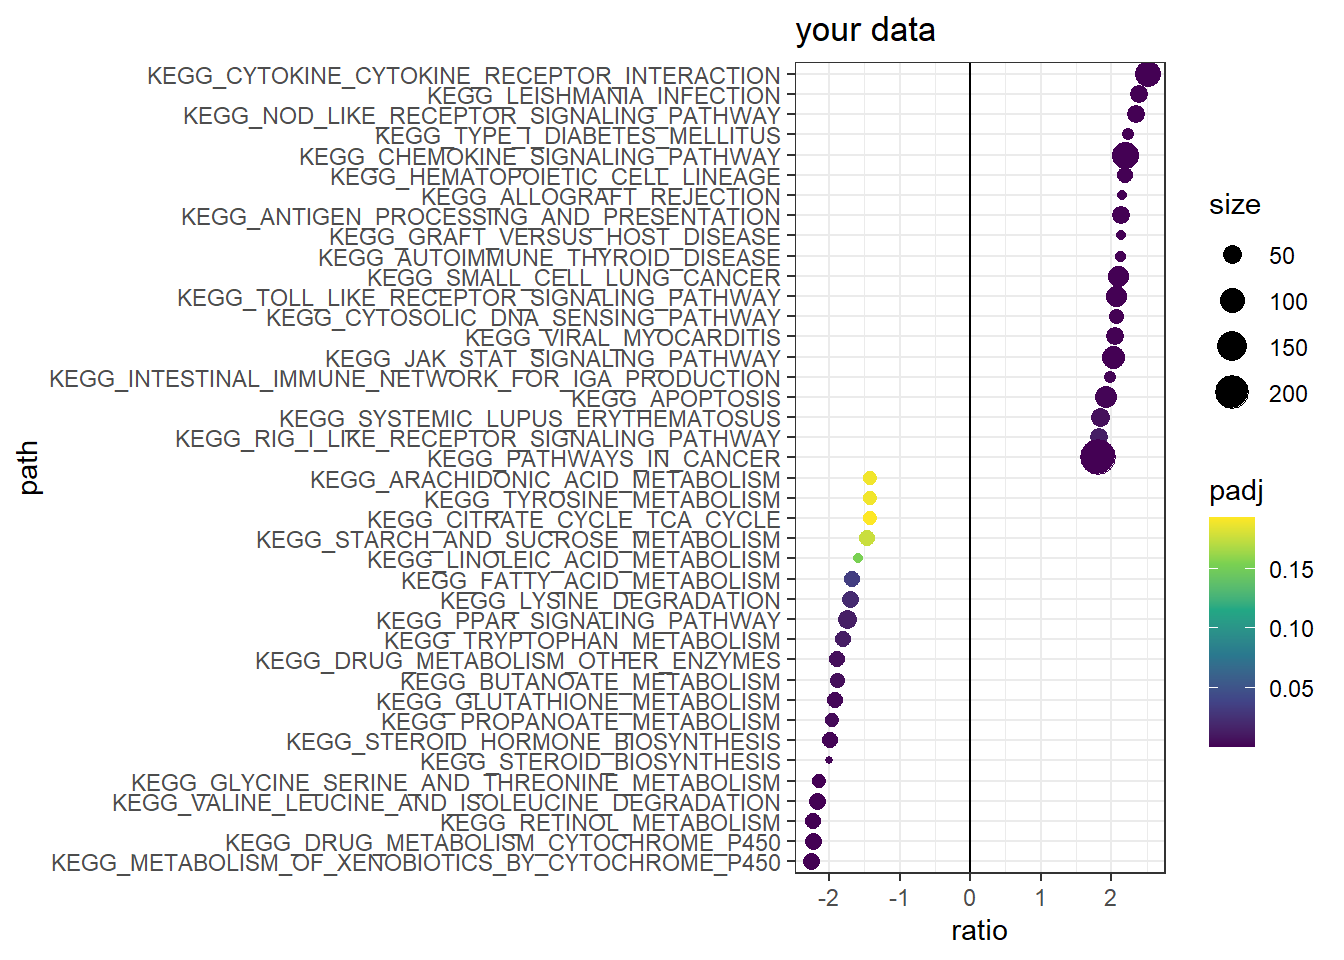

In [ ]:
ggplot(plot_data, aes(x = NES, y = fct_reorder(pathway, NES), color = padj, size = size)) + 
  geom_point(stat = 'identity') + 
  xlab("ratio") + ylab("path") + ggtitle("your data") + 
  theme_bw() + 
  scale_color_viridis_c() +
  #scale_color_distiller(type = "seq", palette = "PuRd") +
  geom_vline(xintercept = 0)


### All KEGG plots

Plot all using a function

In [ ]:
# Get file paths
kegg_file_paths <- dir(here("notebooks/seq/data_raw/GSEA"), pattern = "KEGG", full.names = TRUE)

# Subset to interleukines if wanted
#kegg_file_paths[grep(pattern = "IL", kegg_file_paths)]


In [ ]:
KEGG_plot_list <- map(kegg_file_paths, function(file_path) {
  # Read the file
  plot_data <- read_excel(file_path)
  
  # Process the data
  processed_data <- plot_data %>%
    arrange(desc(abs(NES))) %>%
    group_by(sign_NES = sign(NES)) %>%
    slice_head(n = 10) %>%
    ungroup() %>%
    filter(padj <= 0.05) %>%
    mutate(pathway = str_remove_all(pathway, "KEGG_"),
           pathway = str_replace_all(pathway, pattern = "_", replacement = " "),
           pathway = str_to_title(pathway))

  
  # Generate the plot
  ggplot(processed_data,
         aes(x = NES,
             y = fct_reorder(pathway, NES),
             color = padj,
             size = size
             )
         ) +
    geom_point(stat = 'identity') +
    labs(x = "NES",
         y = "Pathway",
         title = paste("Top 10 up/down Pathways for","", basename(file_path))
         ) +
    theme_bw() +
    geom_vline(xintercept = 0) +
    scale_color_viridis_c()
    #scale_color_distiller(type = "seq", palette = "YlOrRd") #+
    #theme(axis.text.y = element_text(size = 8))
})


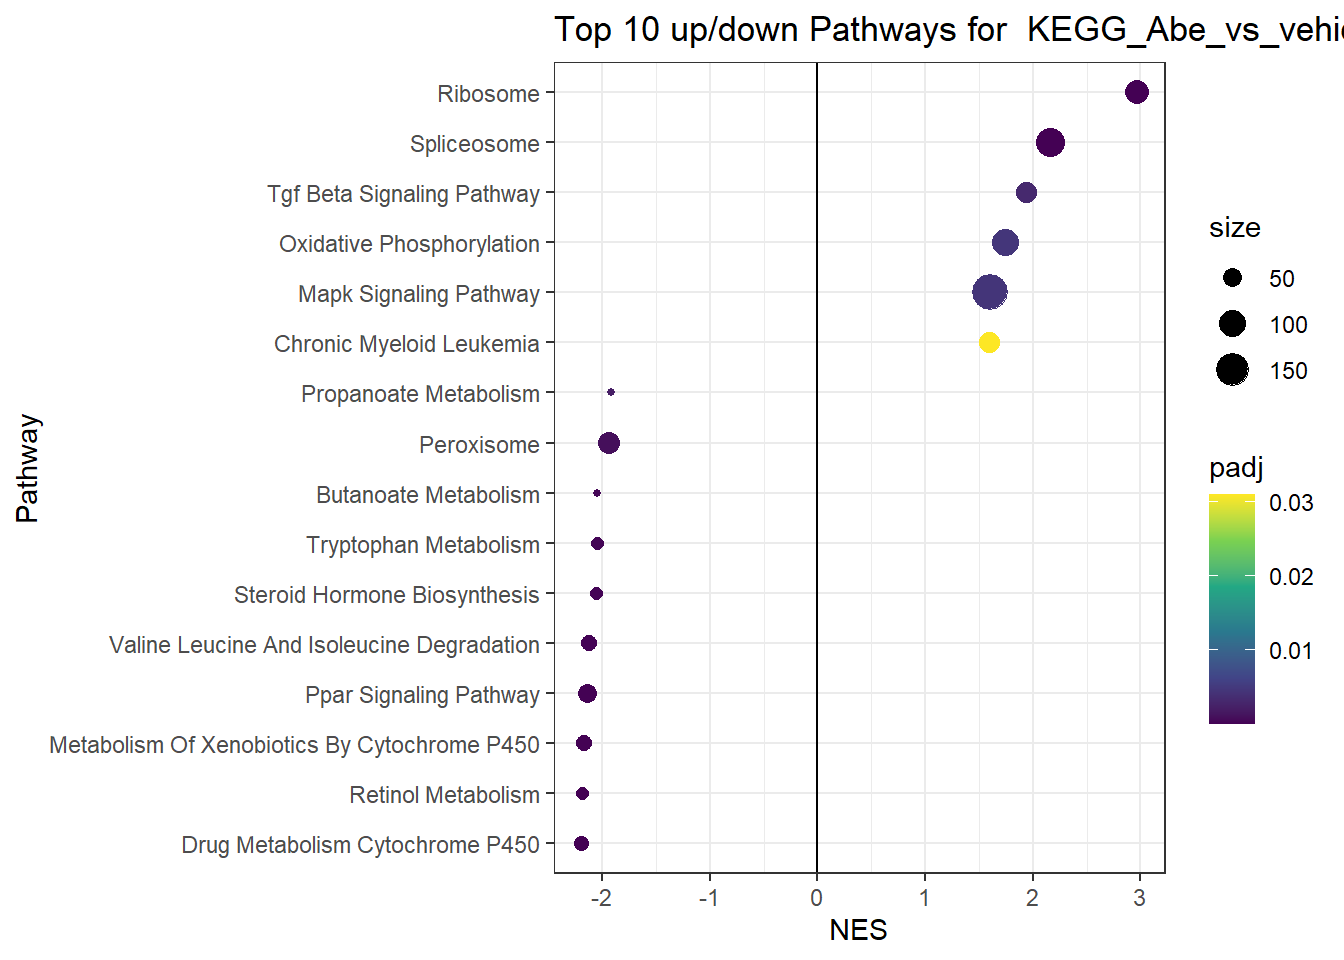

In [ ]:

KEGG_plot_list[[1]]


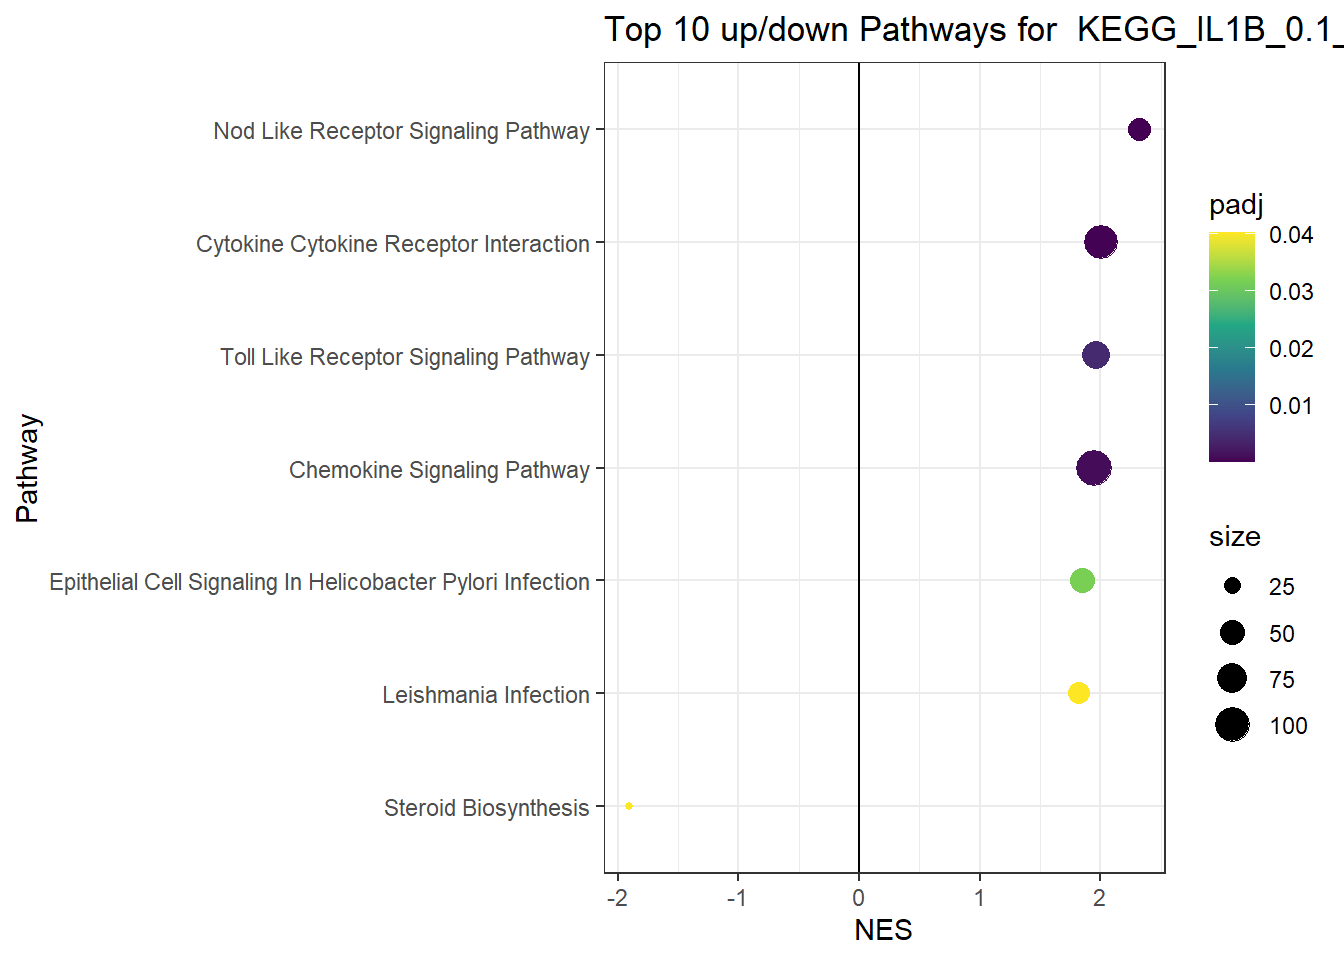

In [ ]:

KEGG_plot_list[[2]]


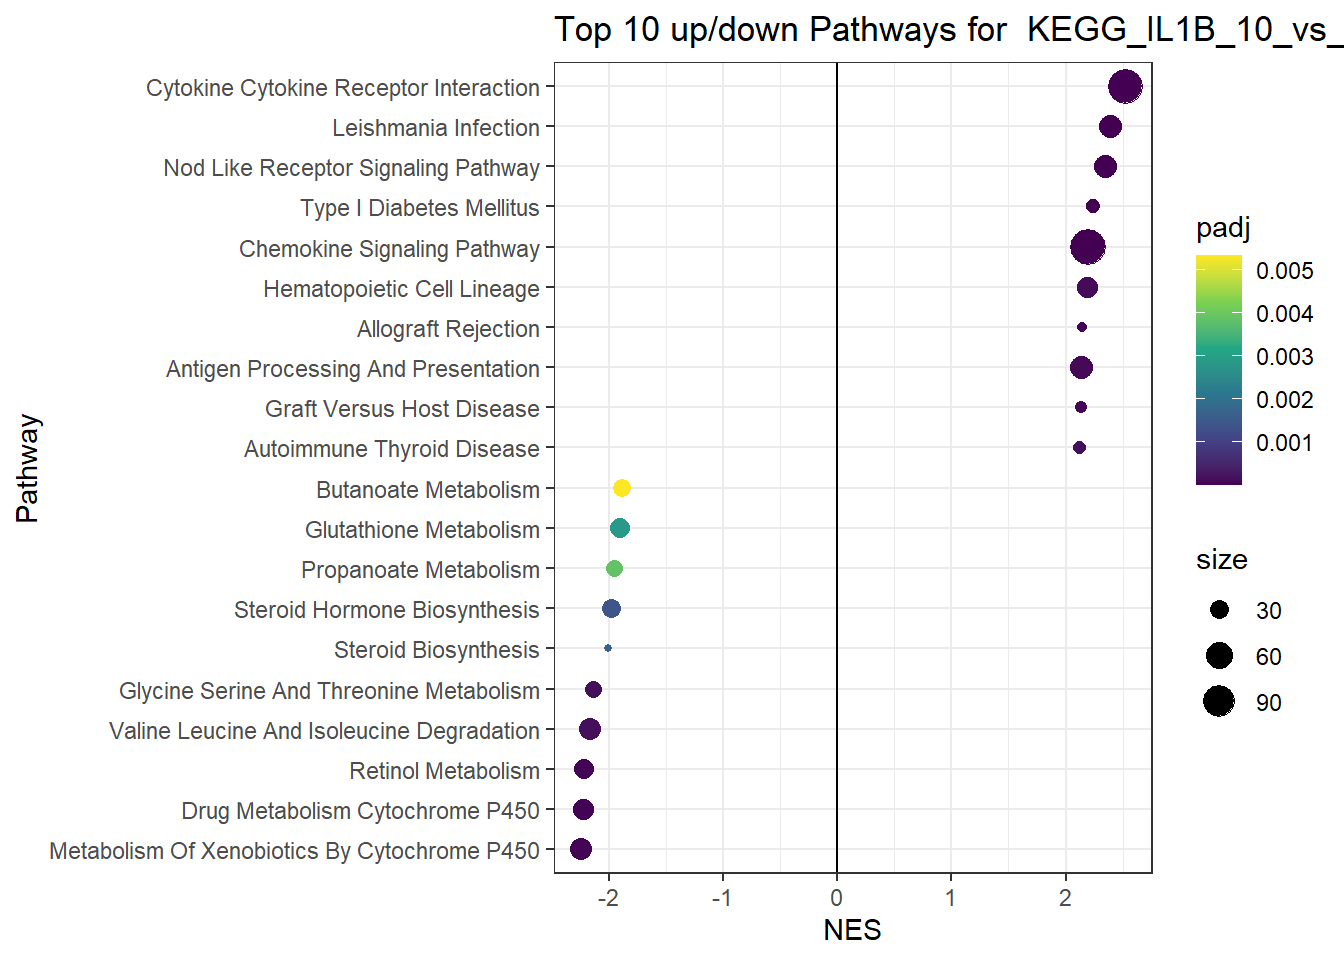

In [ ]:

KEGG_plot_list[[3]]


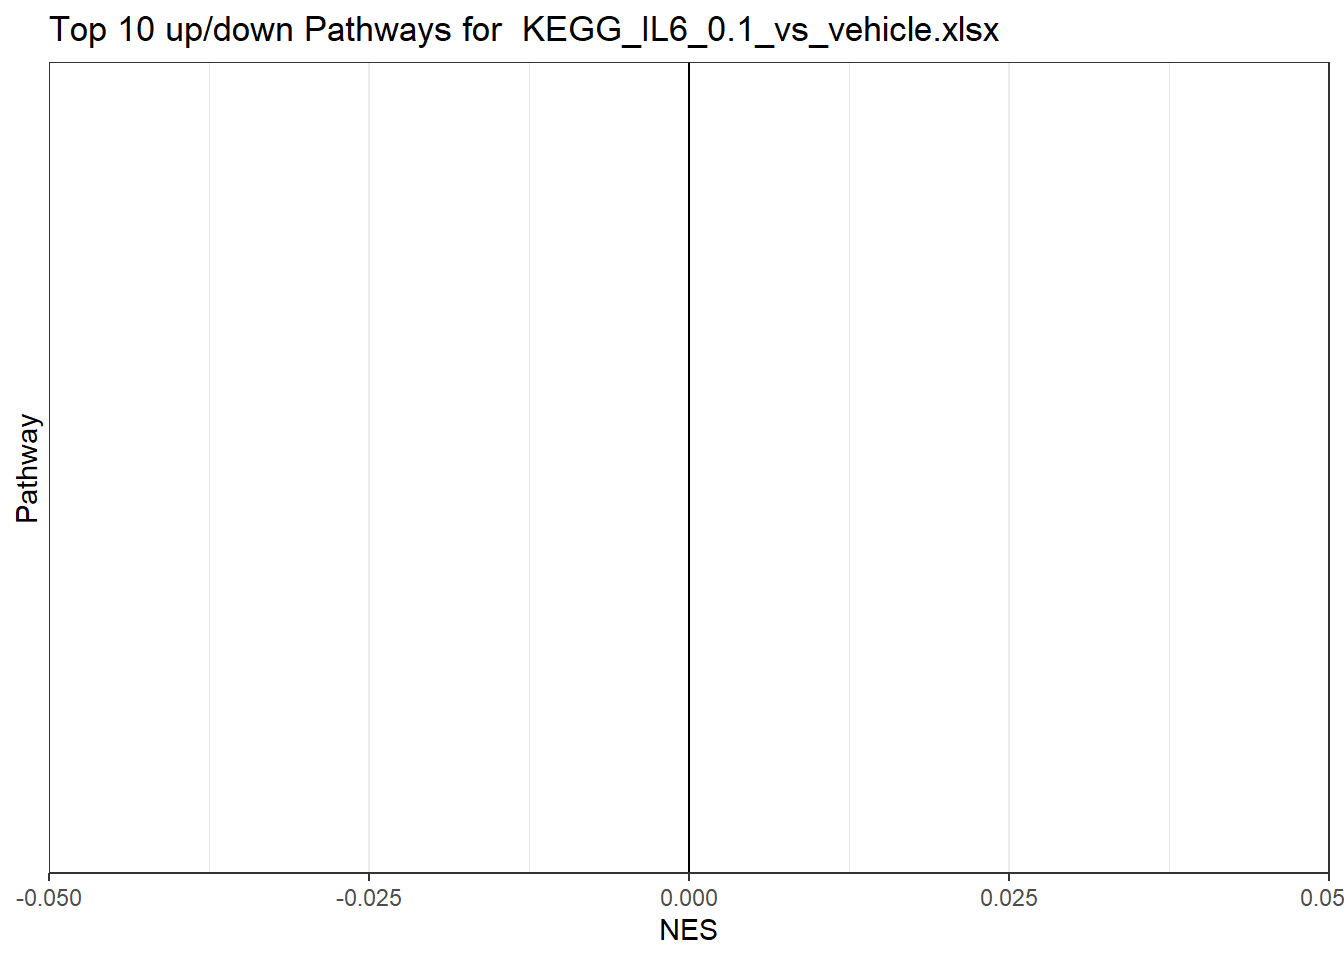

In [ ]:

KEGG_plot_list[[4]]


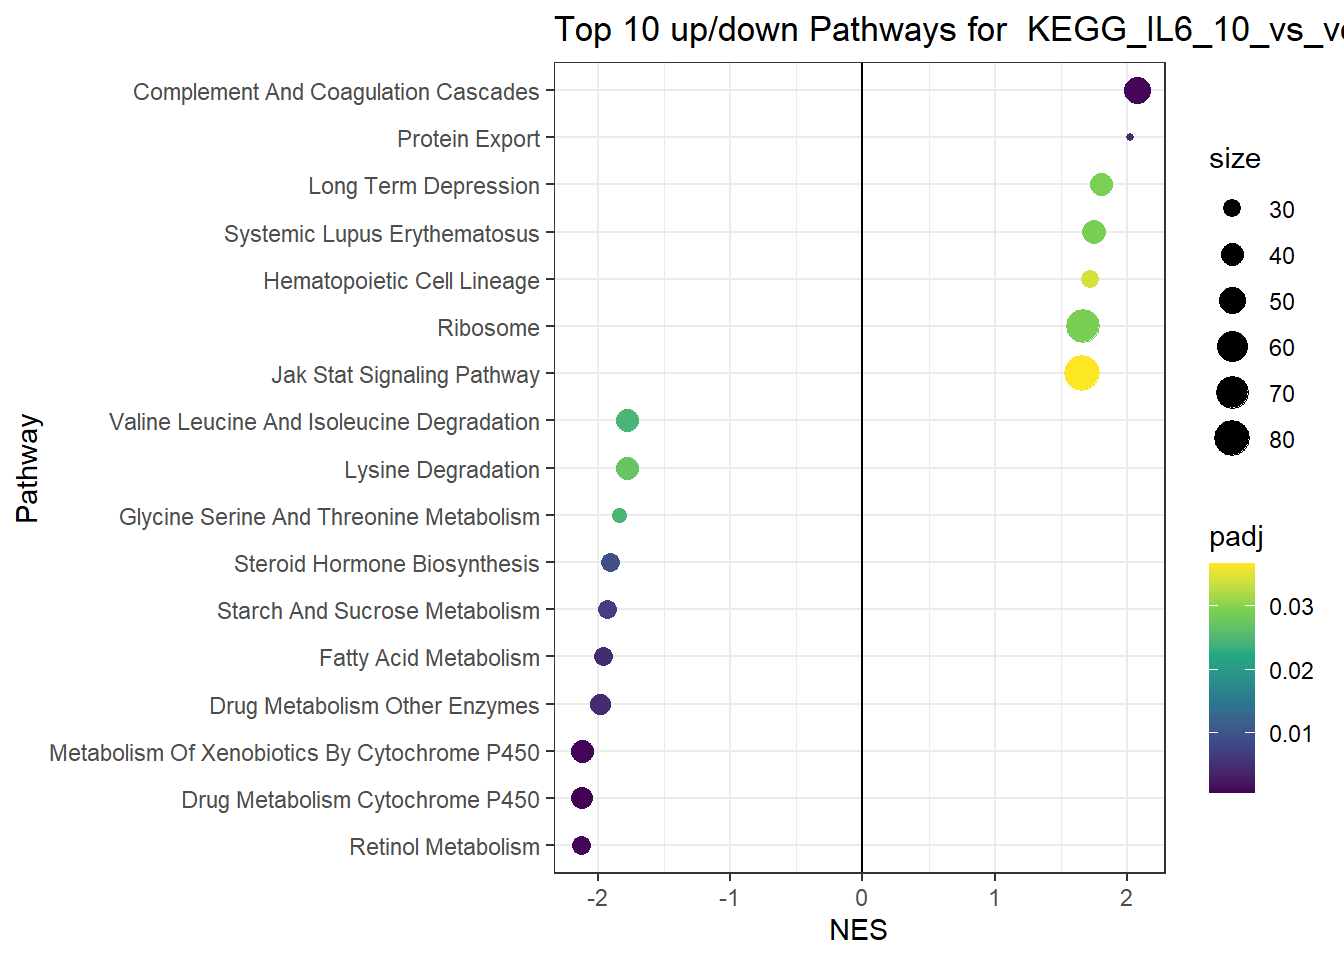

In [ ]:

KEGG_plot_list[[5]]


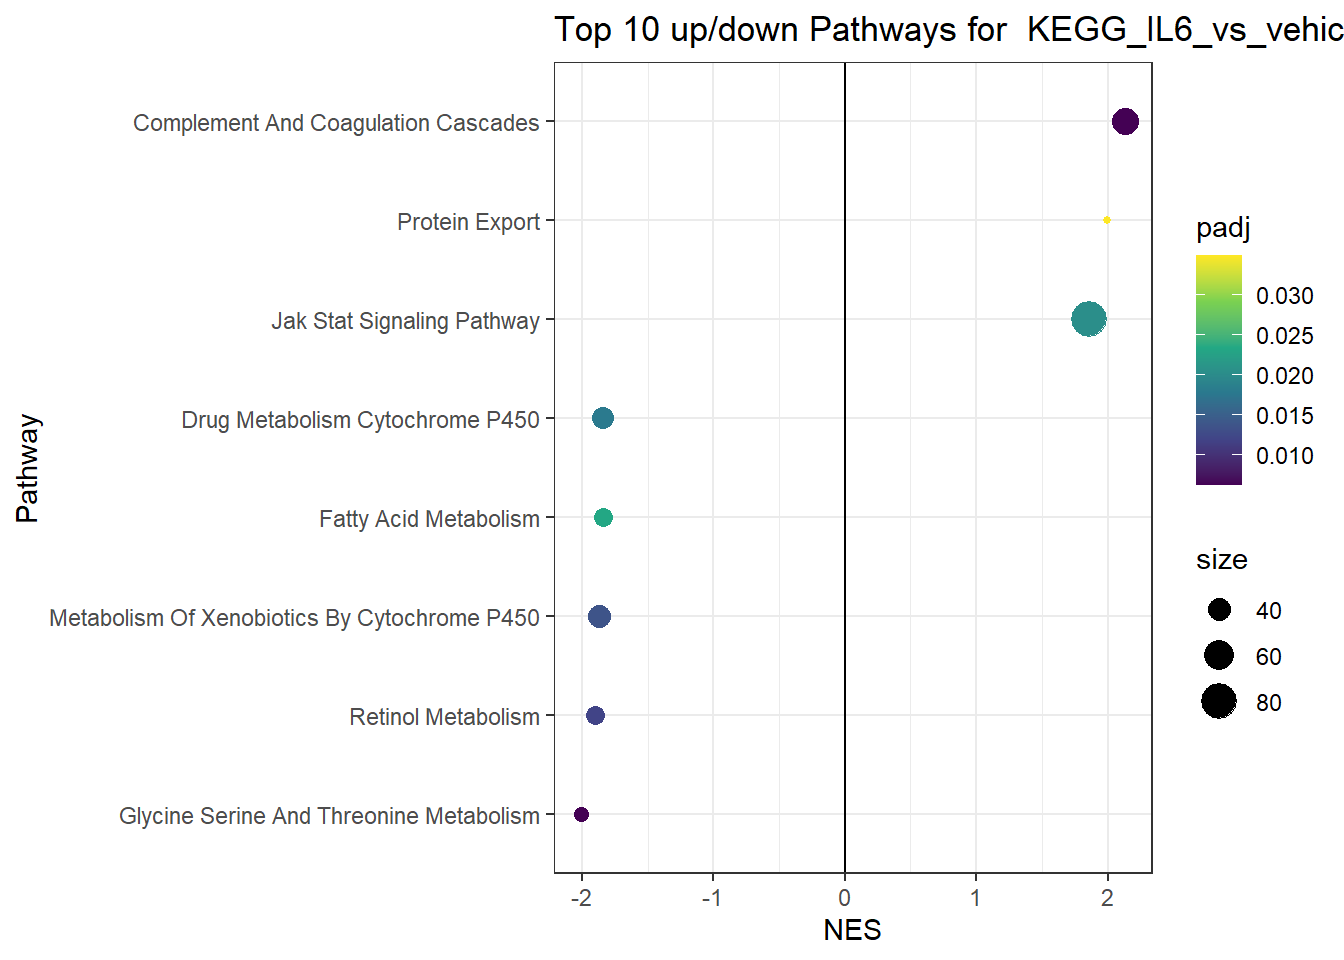

In [ ]:

KEGG_plot_list[[6]]


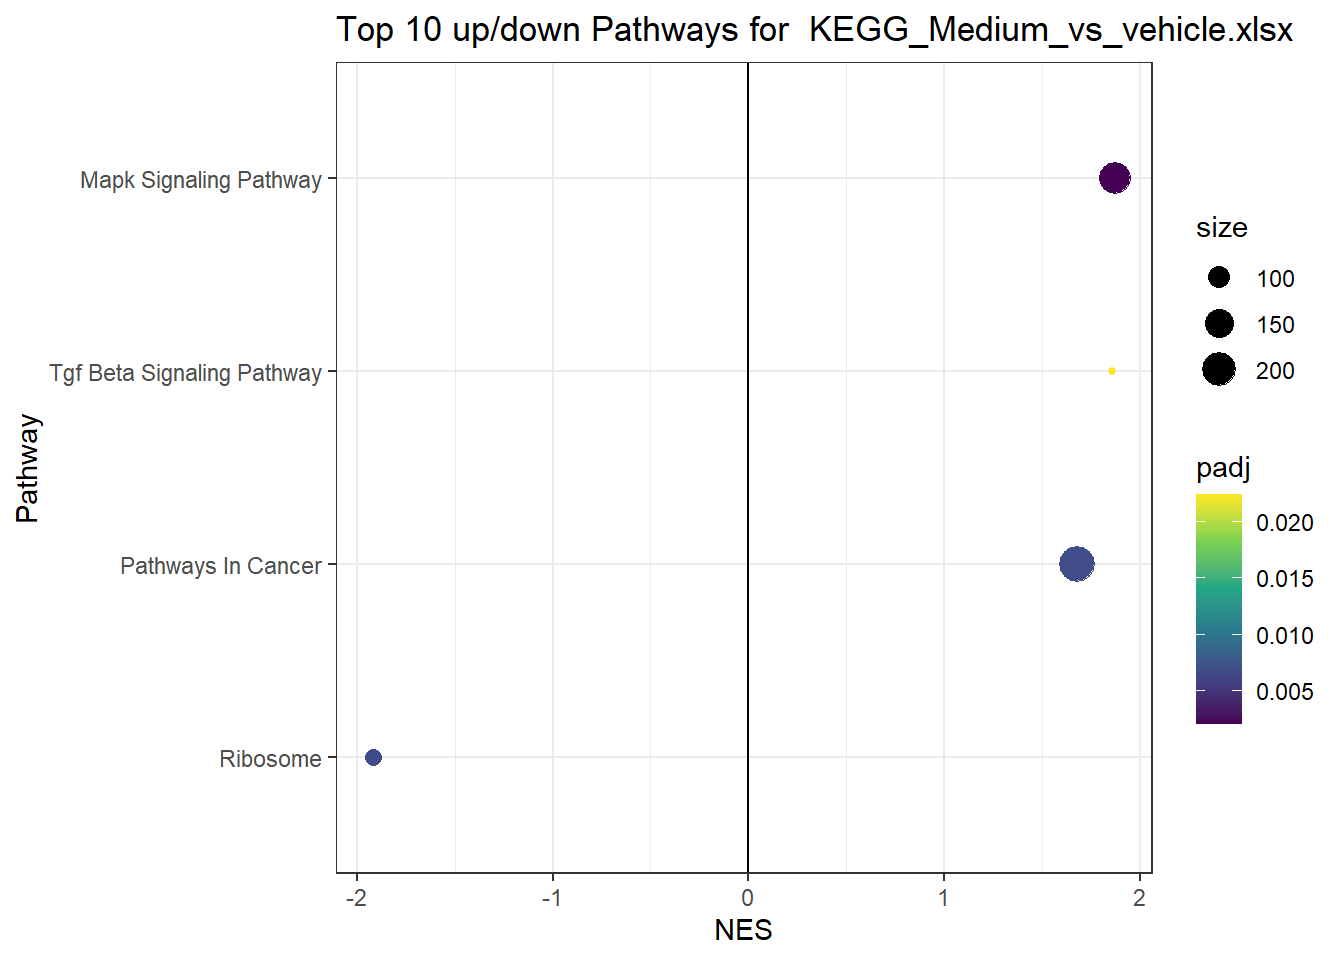

In [ ]:

KEGG_plot_list[[7]]


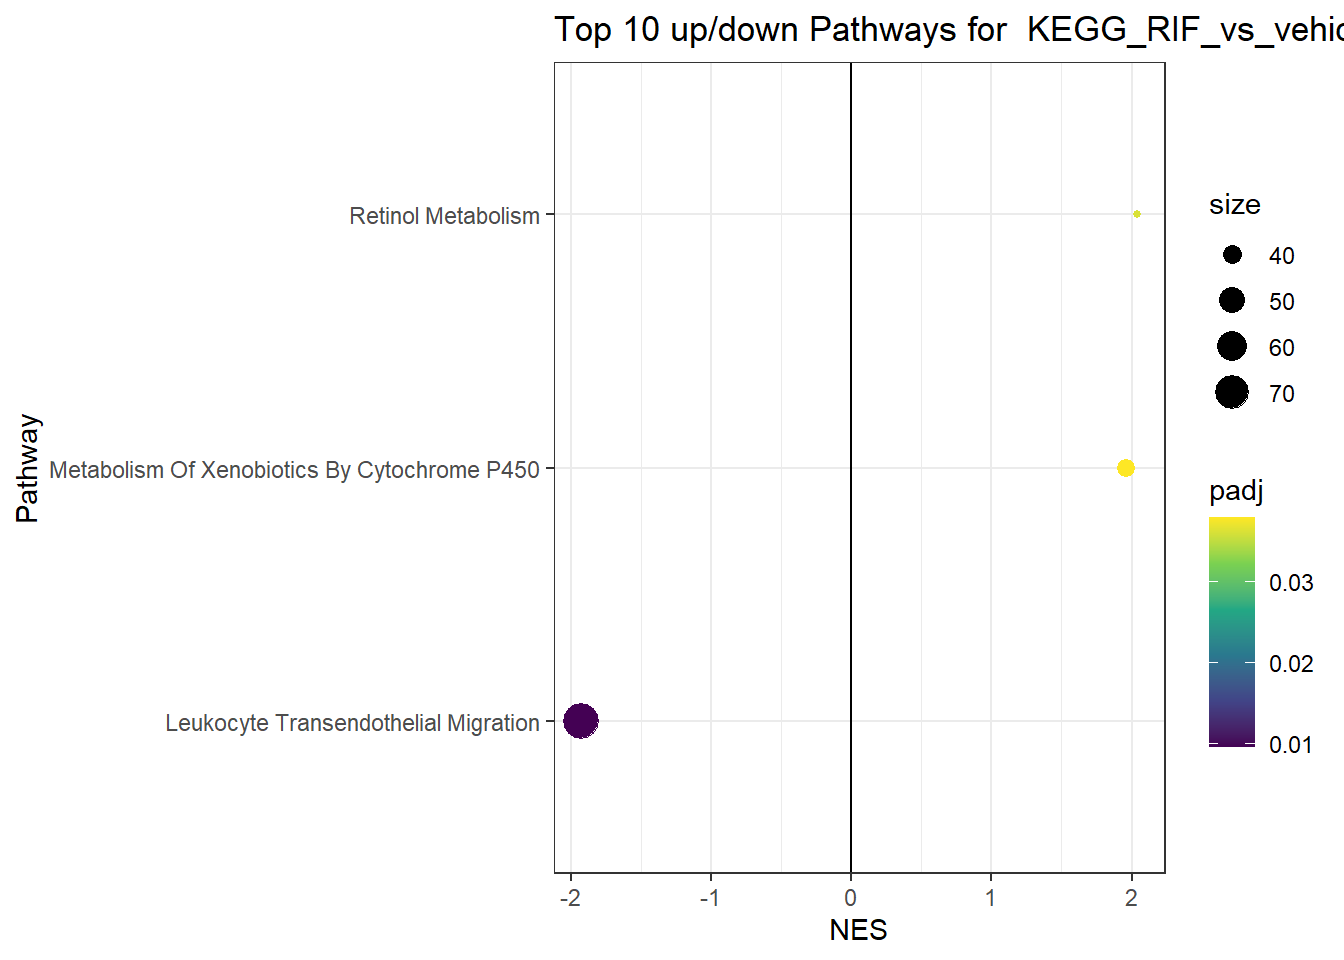

In [ ]:

KEGG_plot_list[[8]]


#### ALL BIOCARTA

**Plot all using a function**

Get all file paths related to BIOCARTA

In [ ]:
# Get file paths
biocarta_file_paths <- dir(here("notebooks/seq/data_raw/GSEA"), pattern = "BIOCARTA", full.names = TRUE)

# Subset to interleukines if wanted
# kegg_file_paths[grep(pattern = "IL", kegg_file_paths)]


In [ ]:
BIOCARTA_plot_list <- map(biocarta_file_paths, function(file_path) {
  # Read the file
  plot_data <- read_excel(file_path)
  
  # Process the data
  processed_data <- plot_data %>%
    arrange(desc(abs(NES))) %>%
    group_by(sign_NES = sign(NES)) %>%
    slice_head(n = 10) %>%
    ungroup() %>%
    filter(padj <= 0.05) %>%
    mutate(pathway = str_remove_all(pathway, "BIOCARTA"),
           pathway = str_replace_all(pathway, pattern = "_", replacement = " "),
           pathway = str_to_title(pathway))
  
  # Generate the plot
  ggplot(processed_data, aes(x = NES, y = fct_reorder(pathway, NES), color = padj, size = size)) +
    geom_point(stat = 'identity') +
    labs(x = "NES", y = "Pathway", title = paste("Top 10 up/down Pathways for","", basename(file_path))) +
    theme_bw() +
    geom_vline(xintercept = 0) +
    scale_color_viridis_c()
    #scale_color_distiller(type = "seq", palette = "YlOrRd") #+
    #theme(legend.position = "none") # Remove legend to focus on the data
})


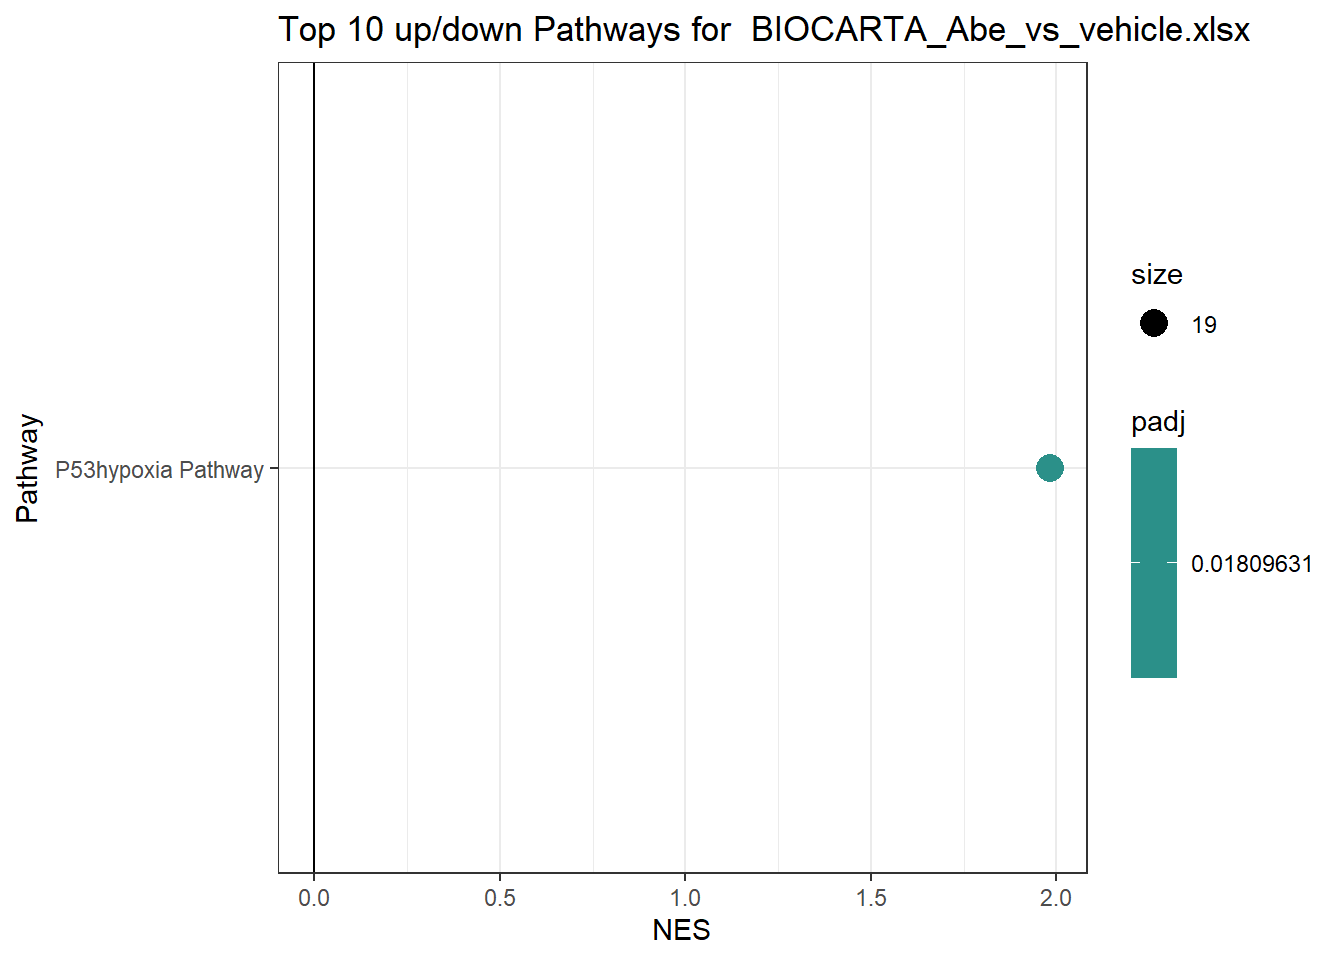

In [ ]:
BIOCARTA_plot_list[[1]]


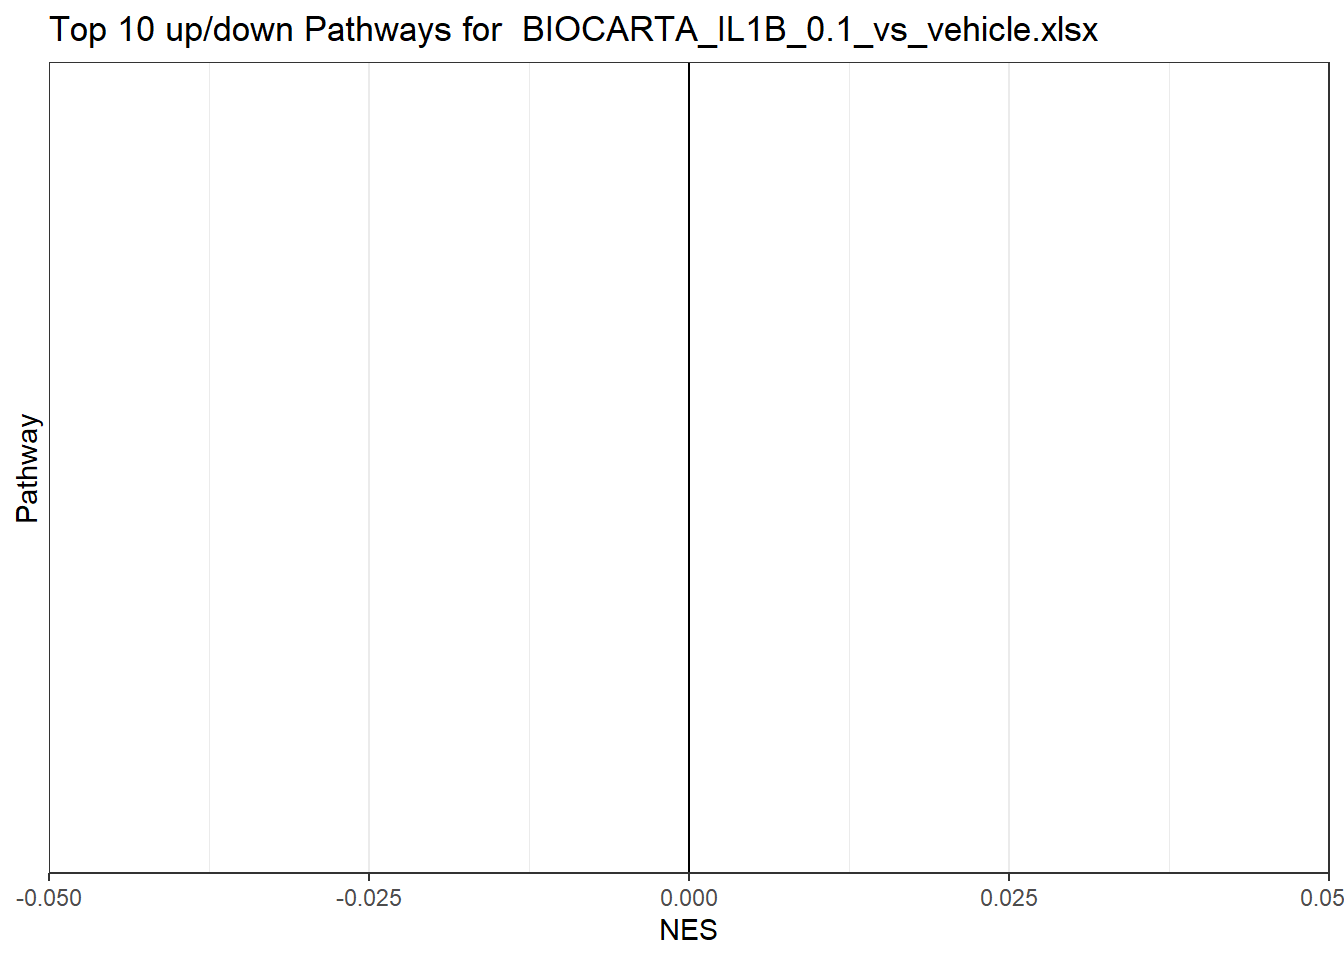

In [ ]:
BIOCARTA_plot_list[[2]]


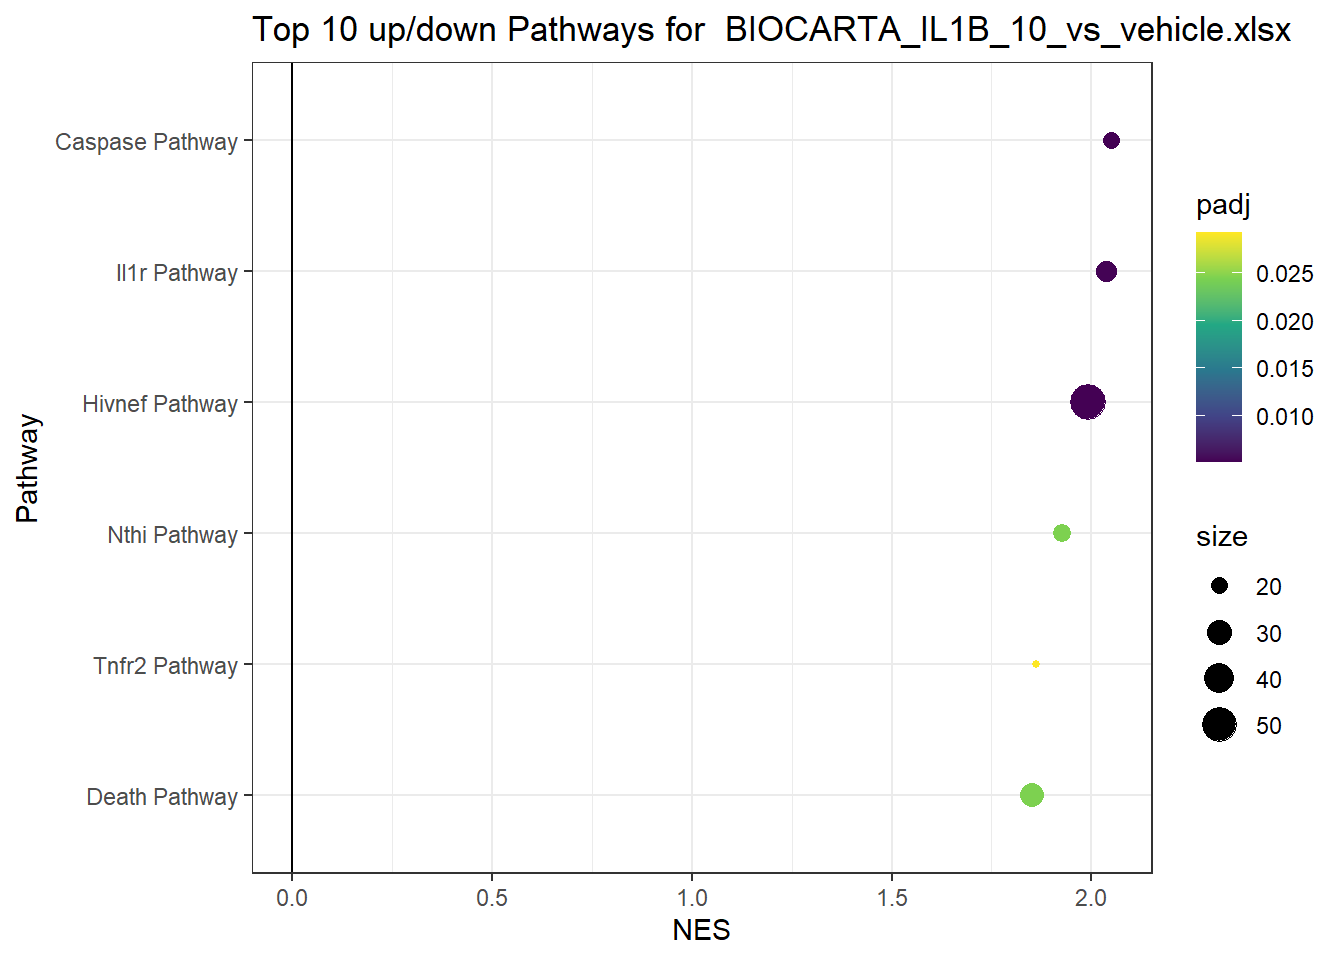

In [ ]:
BIOCARTA_plot_list[[3]]


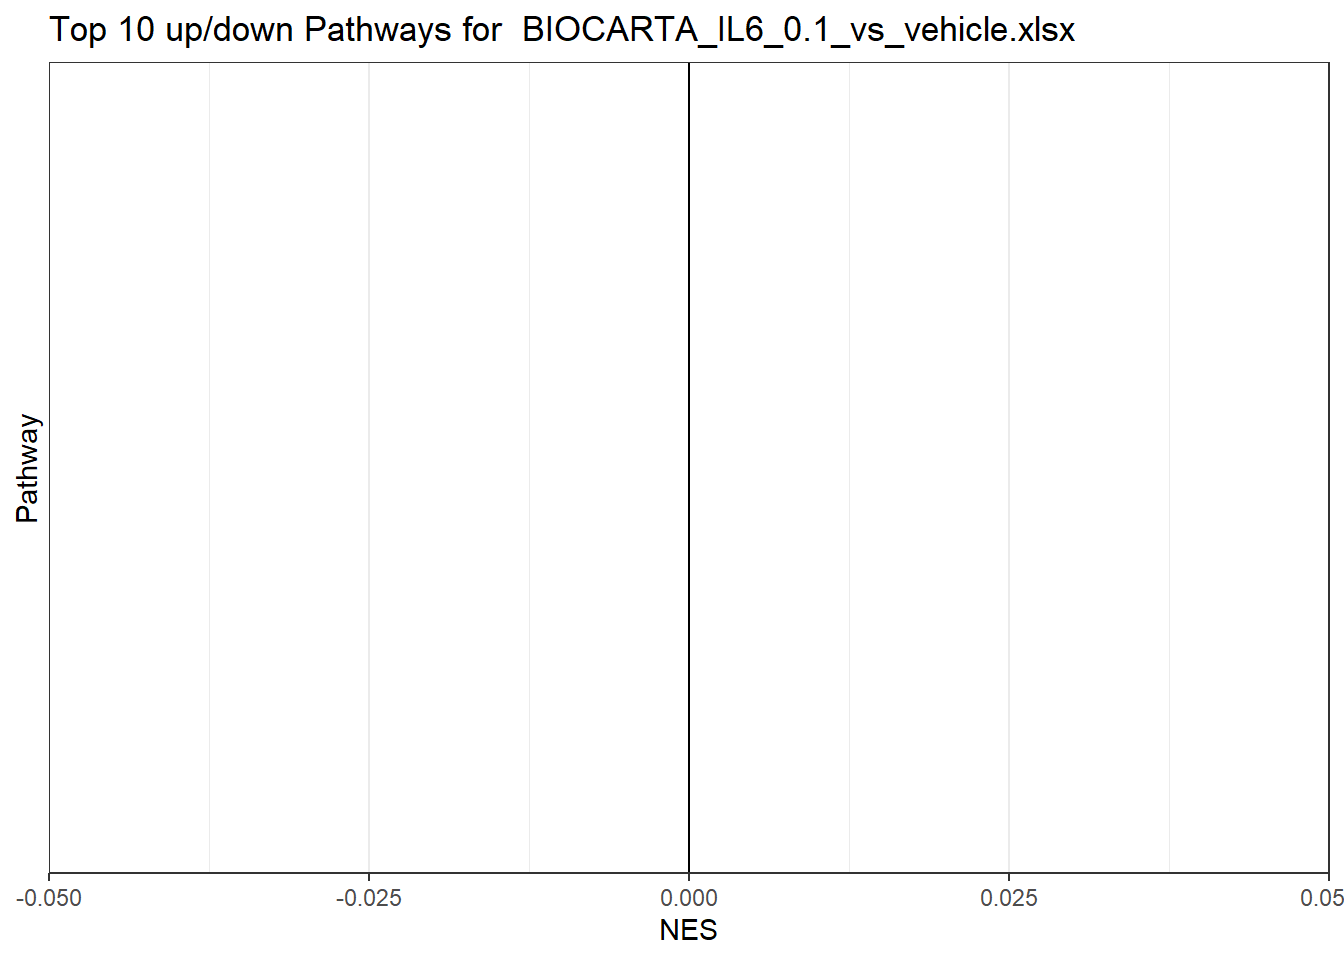

In [ ]:
BIOCARTA_plot_list[[4]]


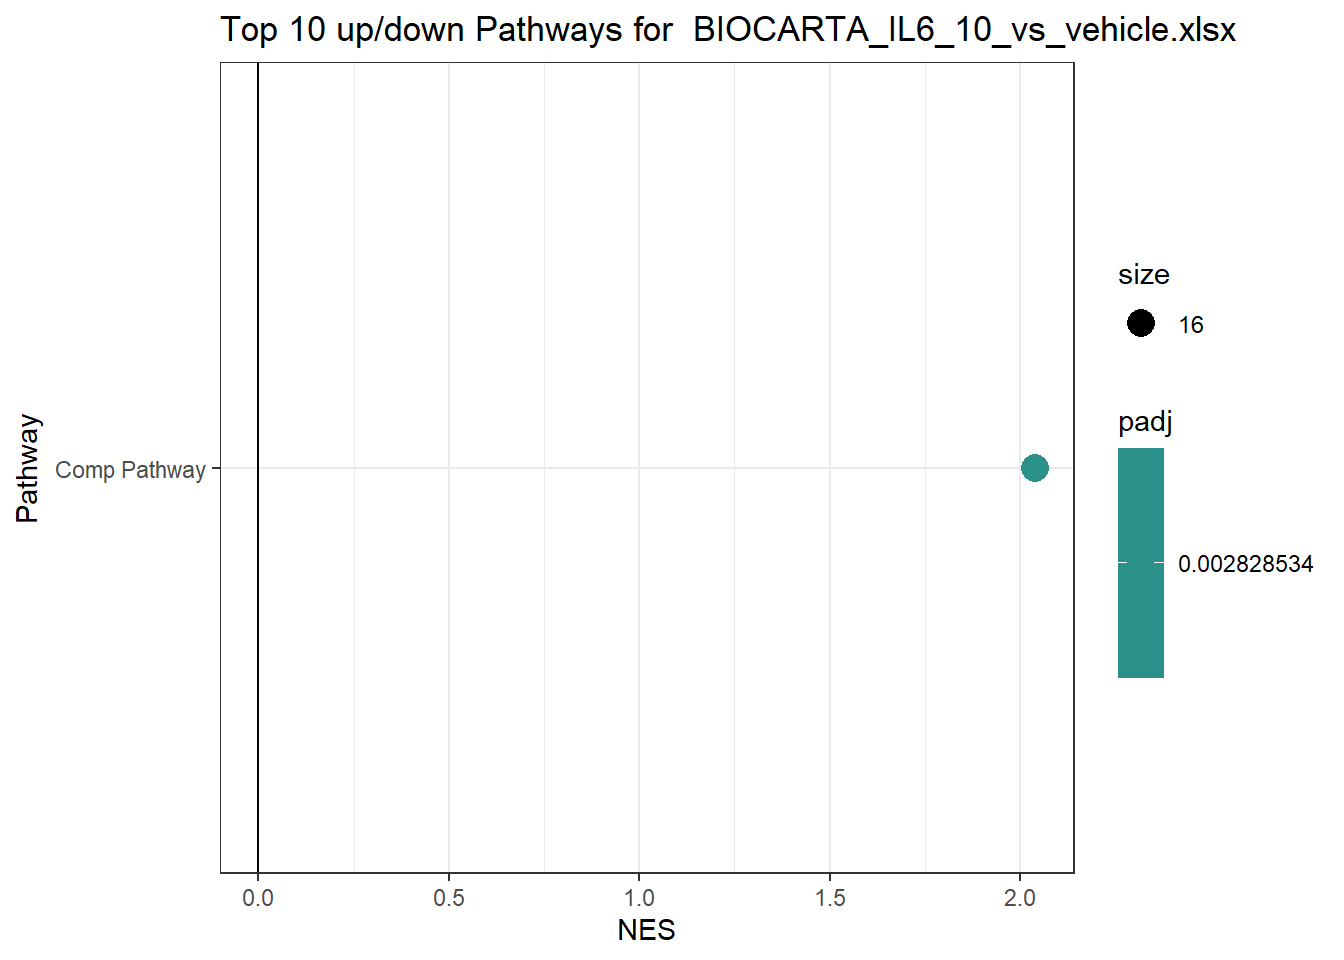

In [ ]:
BIOCARTA_plot_list[[5]]


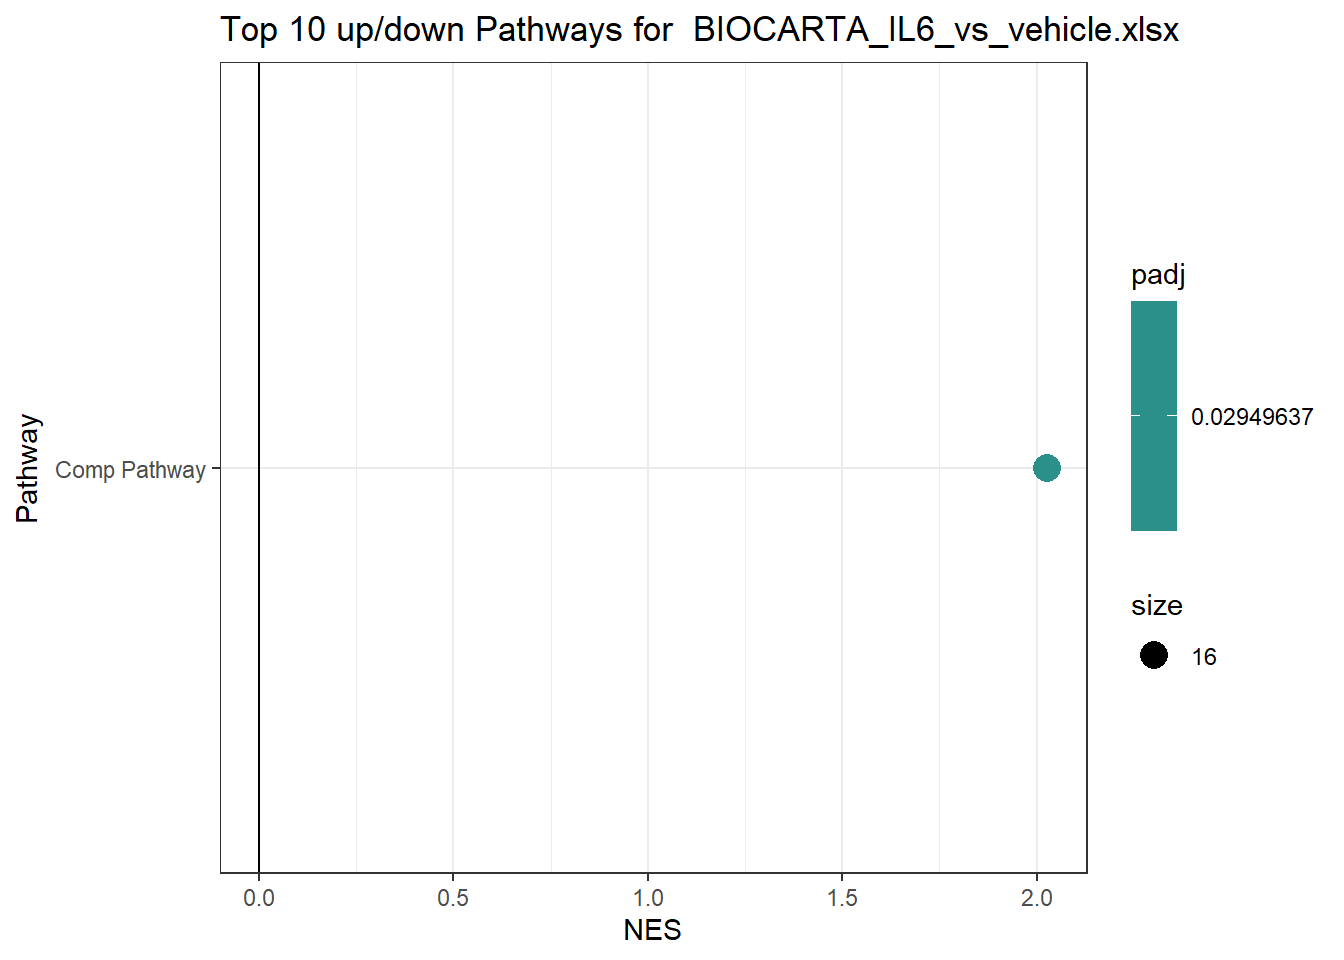

In [ ]:
BIOCARTA_plot_list[[6]]


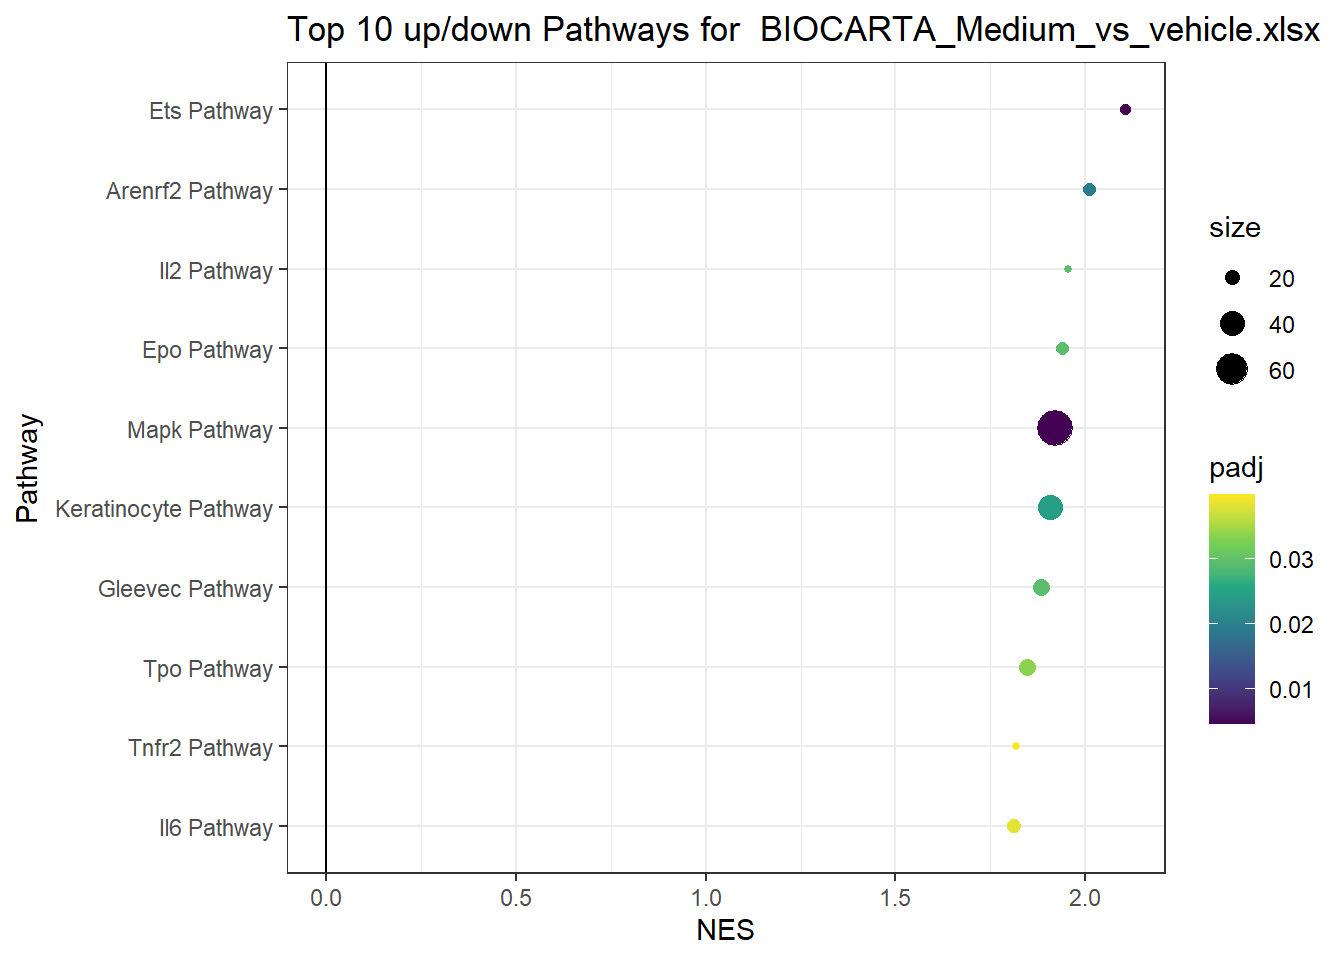

In [ ]:
BIOCARTA_plot_list[[7]]


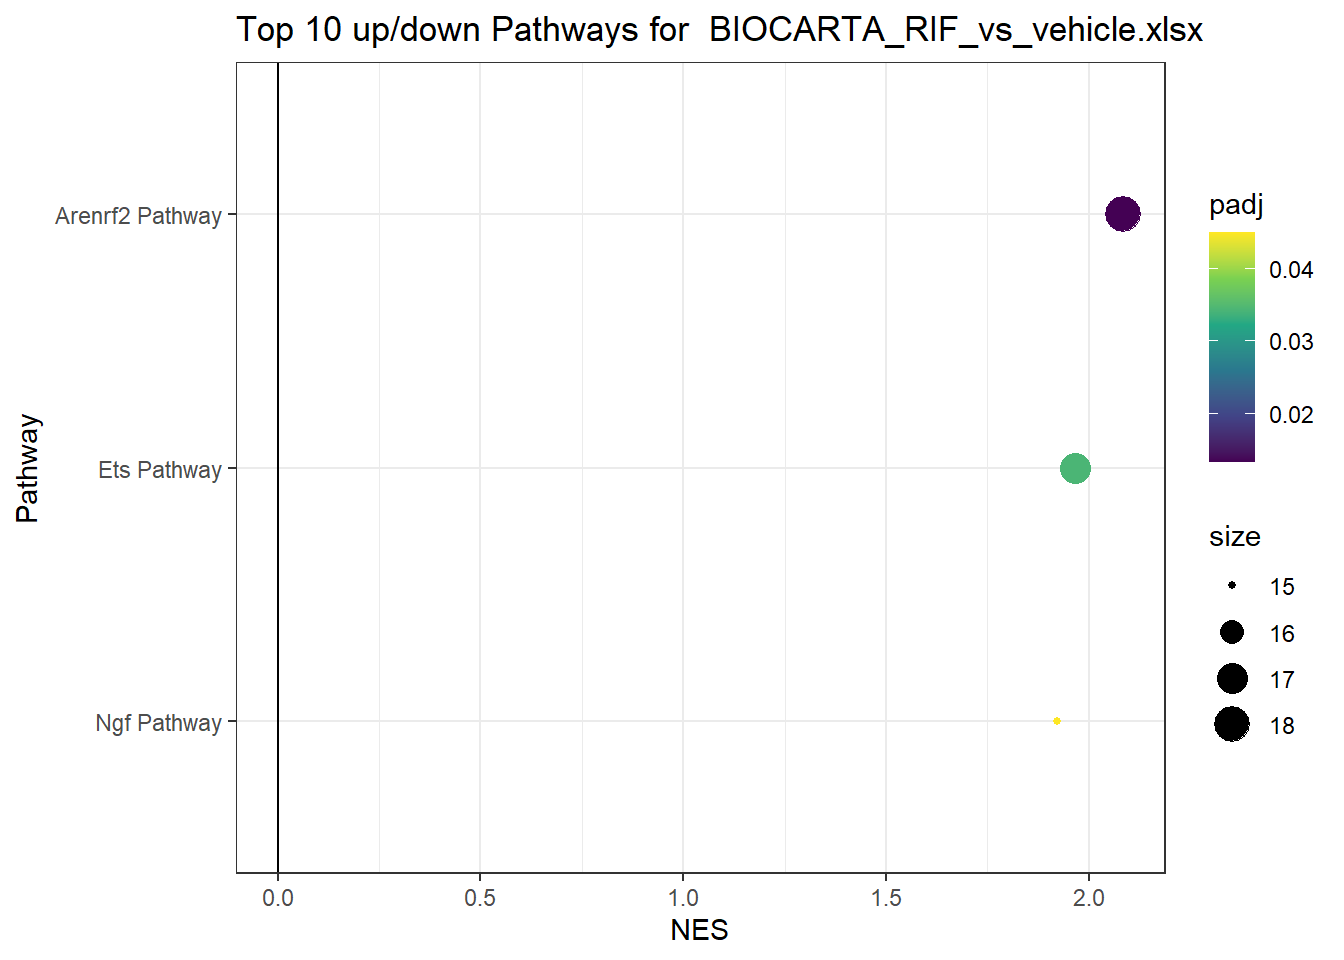

In [ ]:
BIOCARTA_plot_list[[8]]


### REACTOME

Get all file paths related to Reactome

In [ ]:
# Get file paths
reactome_file_paths <- dir(here("notebooks/seq/data_raw/GSEA"), pattern = "REACTOME", full.names = TRUE)

# Subset to interleukines if wanted
# kegg_file_paths[grep(pattern = "IL", kegg_file_paths)]


In [ ]:
REACTOME_plot_list <- map(reactome_file_paths, function(file_path) {
  # Read the file
  plot_data <- read_excel(file_path)
  
  # Process the data
  processed_data <- plot_data %>%
    arrange(desc(abs(NES))) %>%
    group_by(sign_NES = sign(NES)) %>%
    slice_head(n = 10) %>%
    ungroup() %>%
    filter(padj <= 0.05) %>%
    mutate(pathway = str_remove_all(pathway, "REACTOME_"),
           pathway = str_replace_all(pathway, pattern = "_", replacement = " "),
           pathway = str_to_title(pathway))
  
  # Generate the plot
  ggplot(processed_data,
         aes(x = NES,
             y = fct_reorder(pathway, NES),
             color = padj,
             size = size
             )
         ) +
    geom_point(stat = 'identity') +
    labs(x = "NES",
         y = "Pathway",
         title = paste("Top 10 up/down Pathways for","", basename(file_path))
         ) +
    theme_bw() +
    geom_vline(xintercept = 0) +
    scale_color_viridis_c() 
    #scale_color_distiller(type = "seq", palette = "YlOrRd") #+
    #theme(legend.position = "none") # Remove legend to focus on the data
})


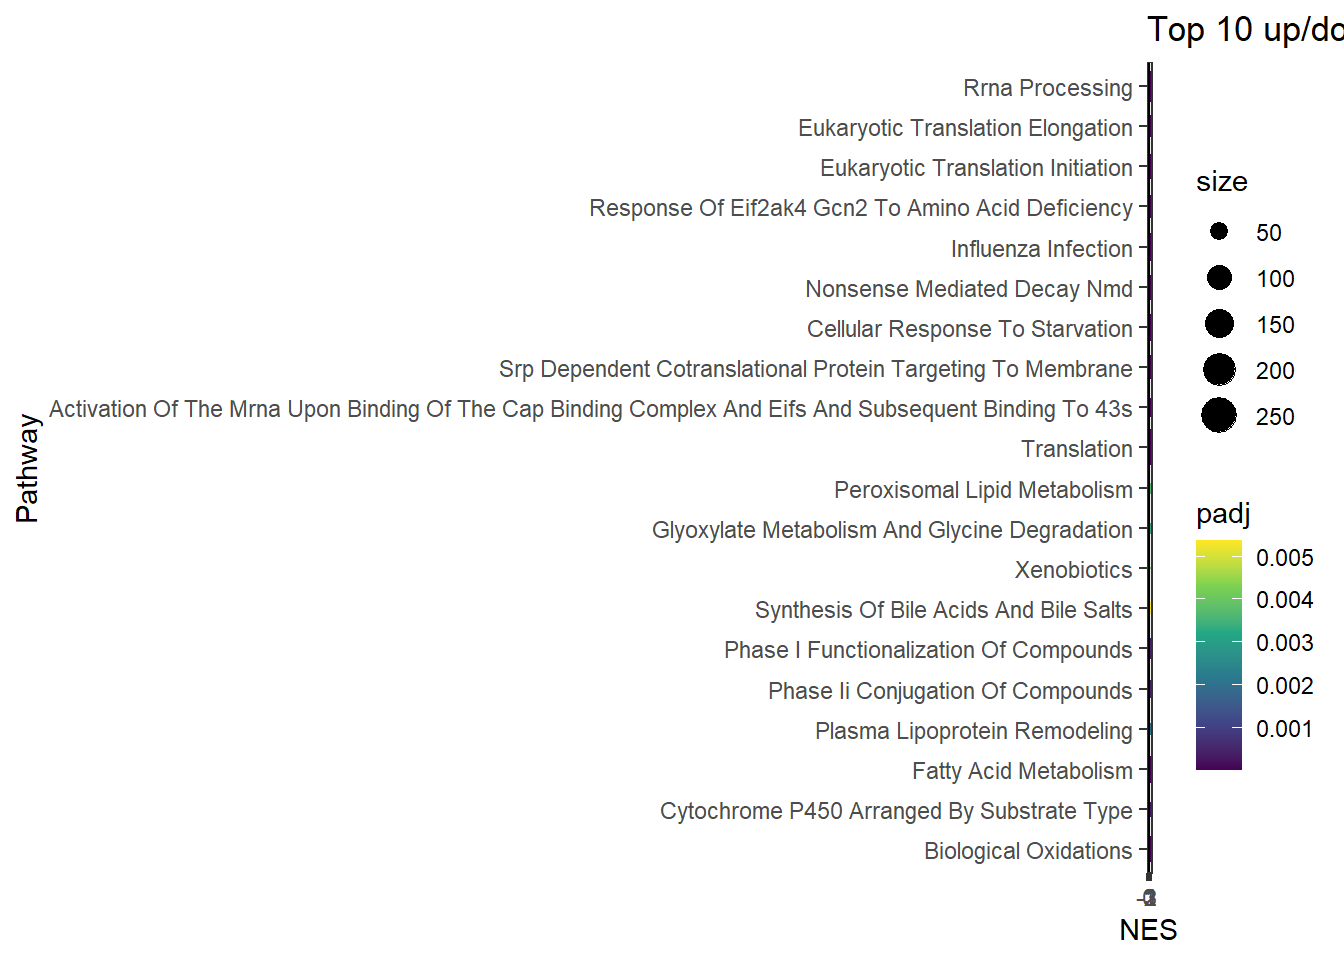

In [ ]:

REACTOME_plot_list[[1]]


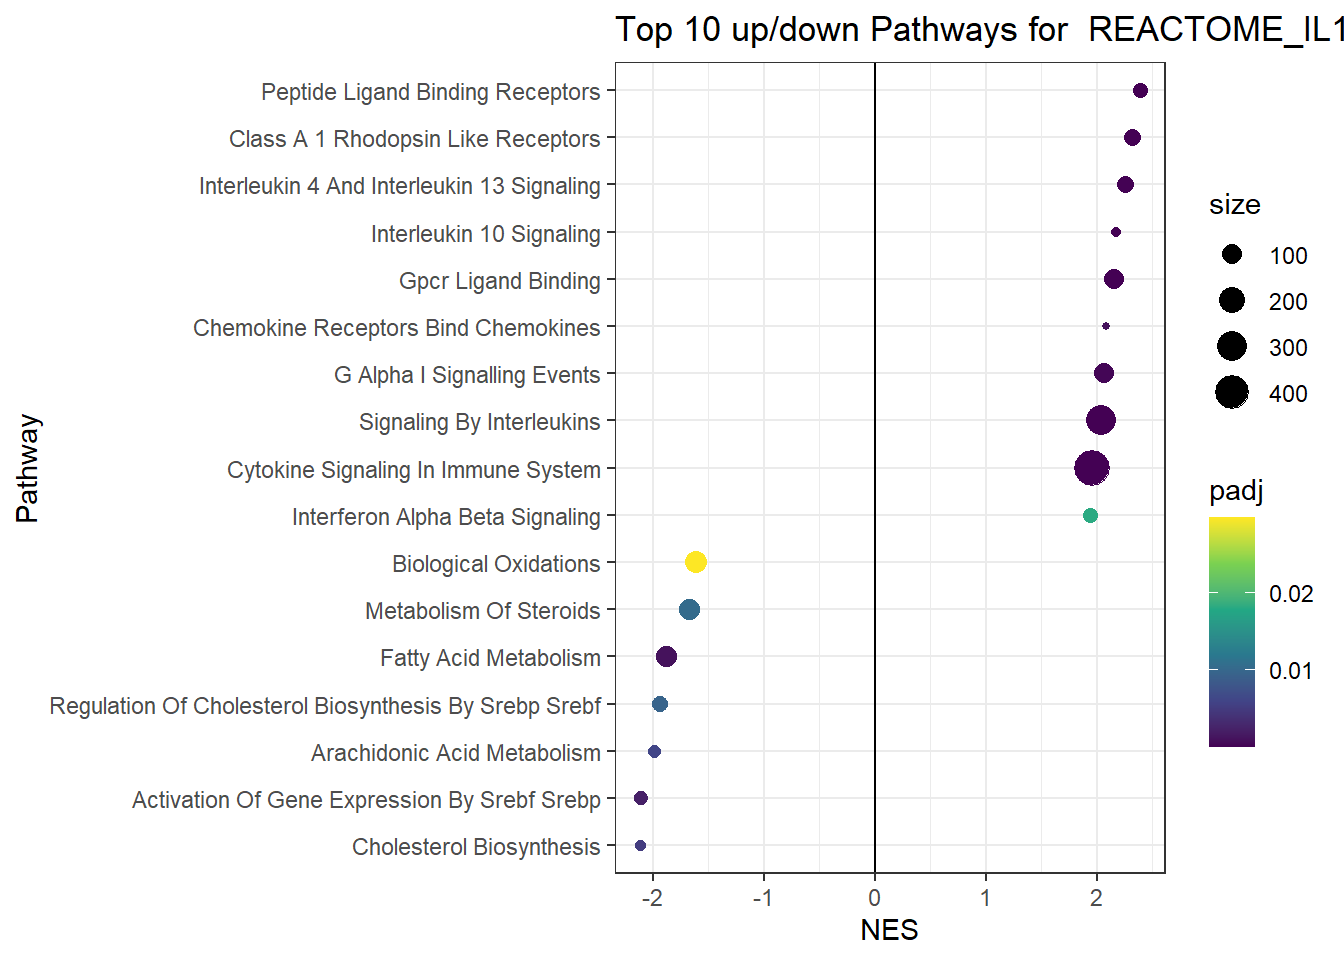

In [ ]:

REACTOME_plot_list[[2]]


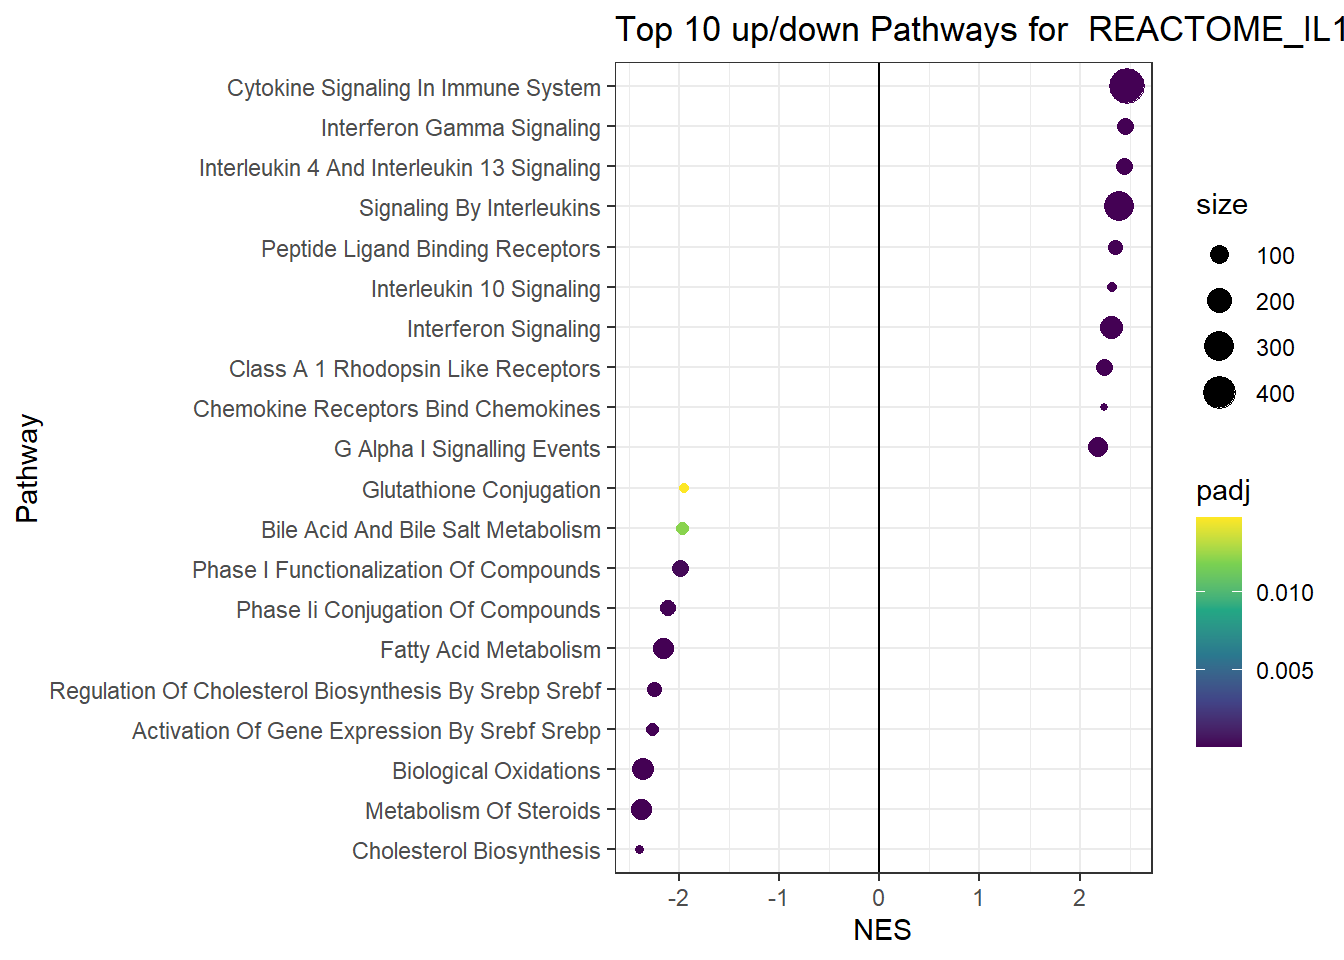

In [ ]:

REACTOME_plot_list[[3]]


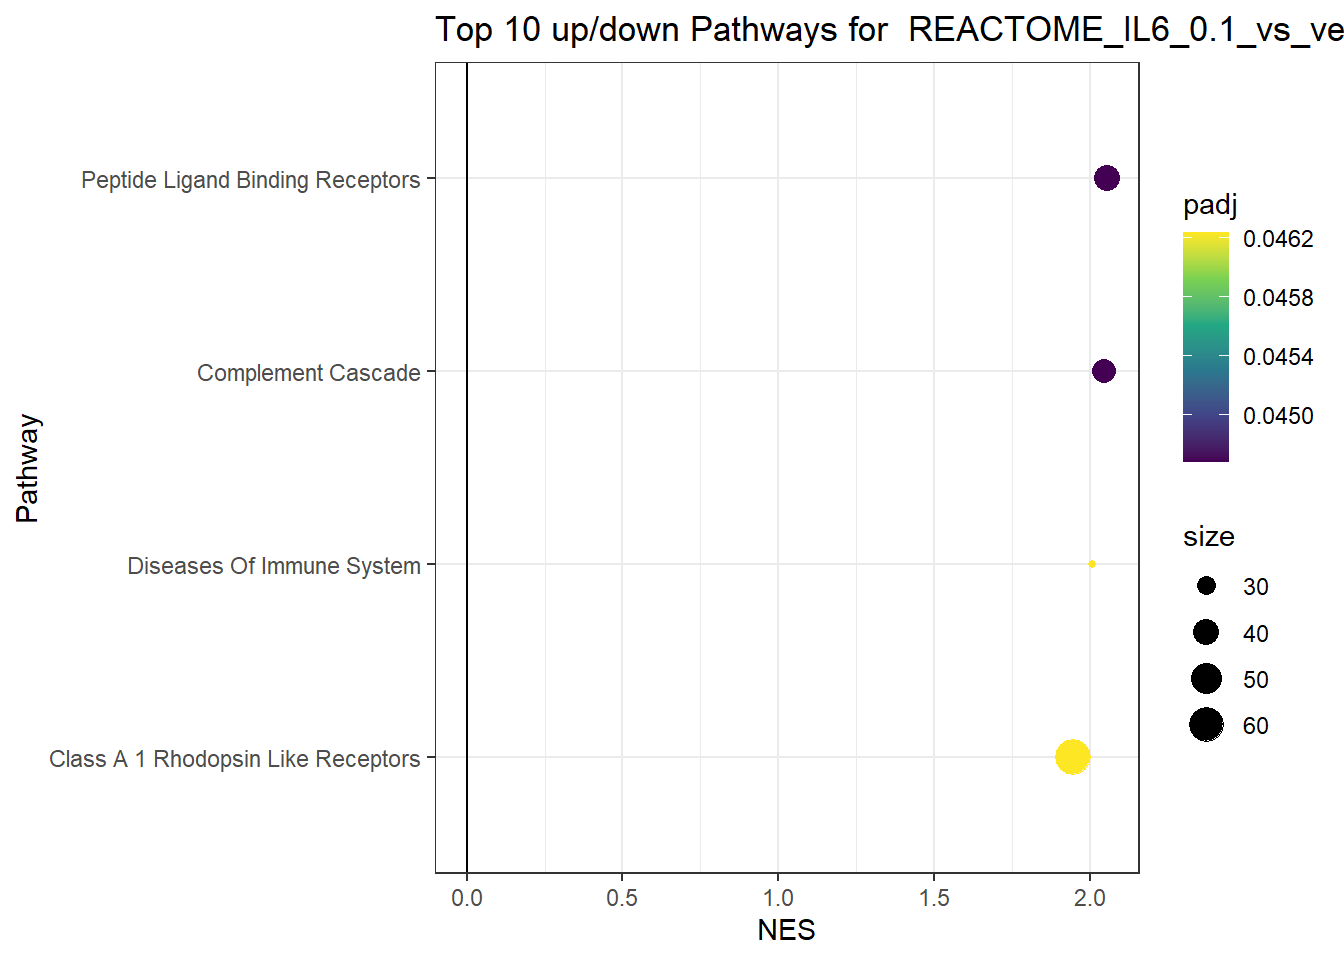

In [ ]:

REACTOME_plot_list[[4]]


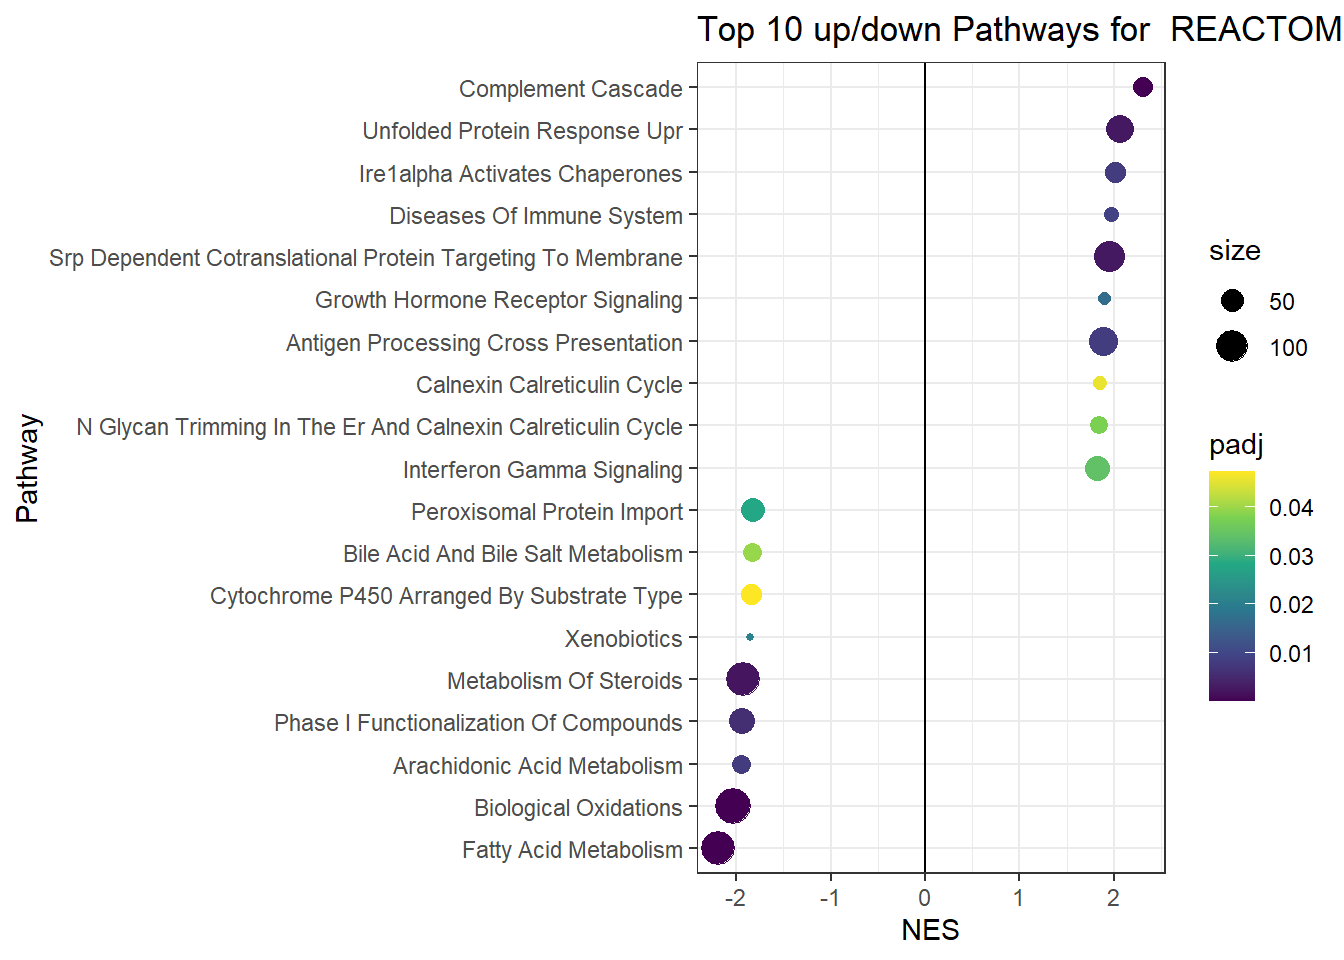

In [ ]:

REACTOME_plot_list[[5]]


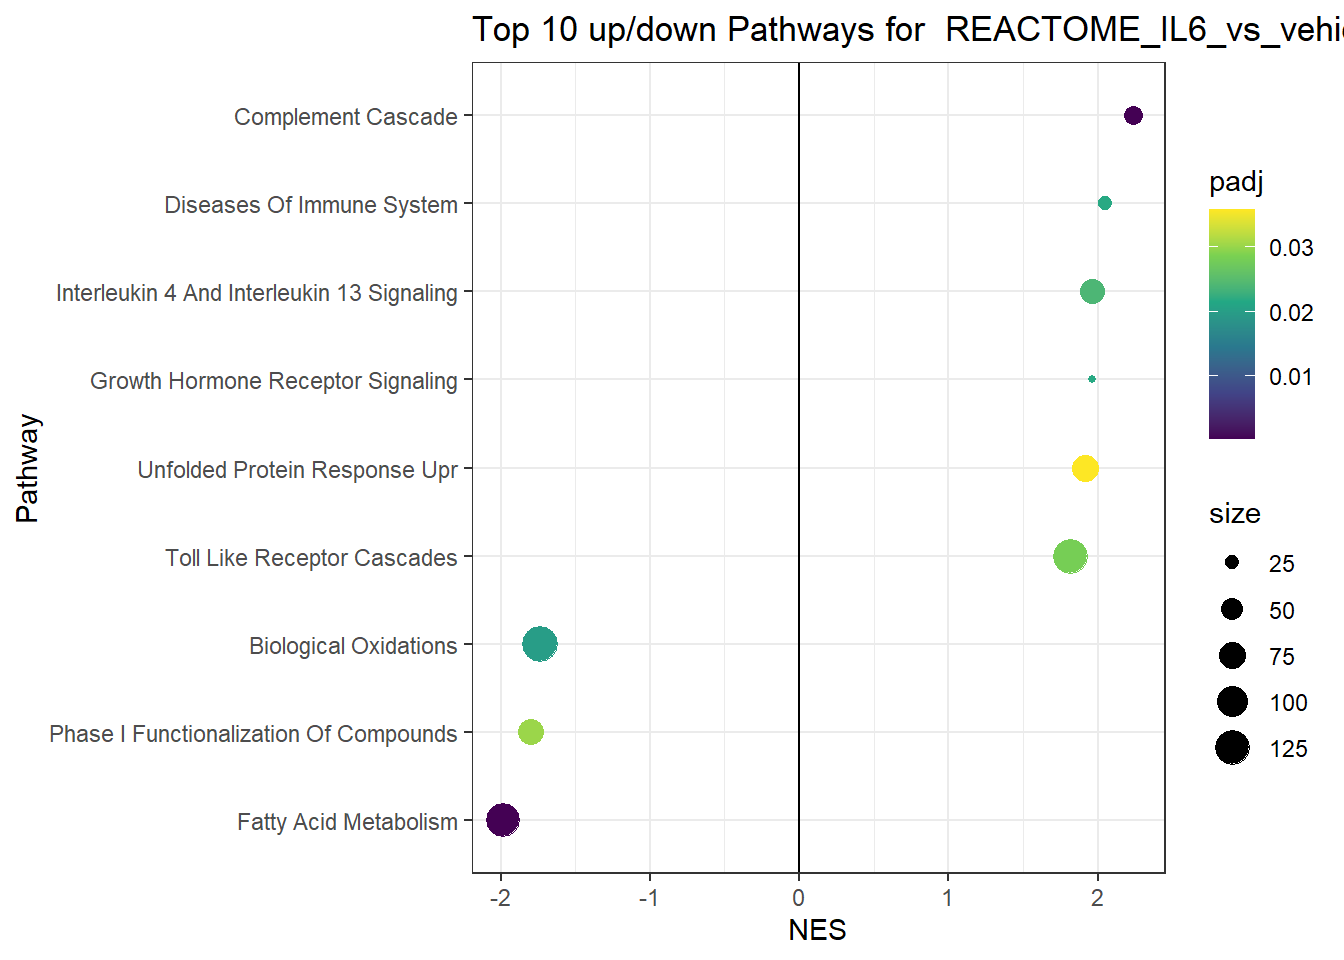

In [ ]:

REACTOME_plot_list[[6]]


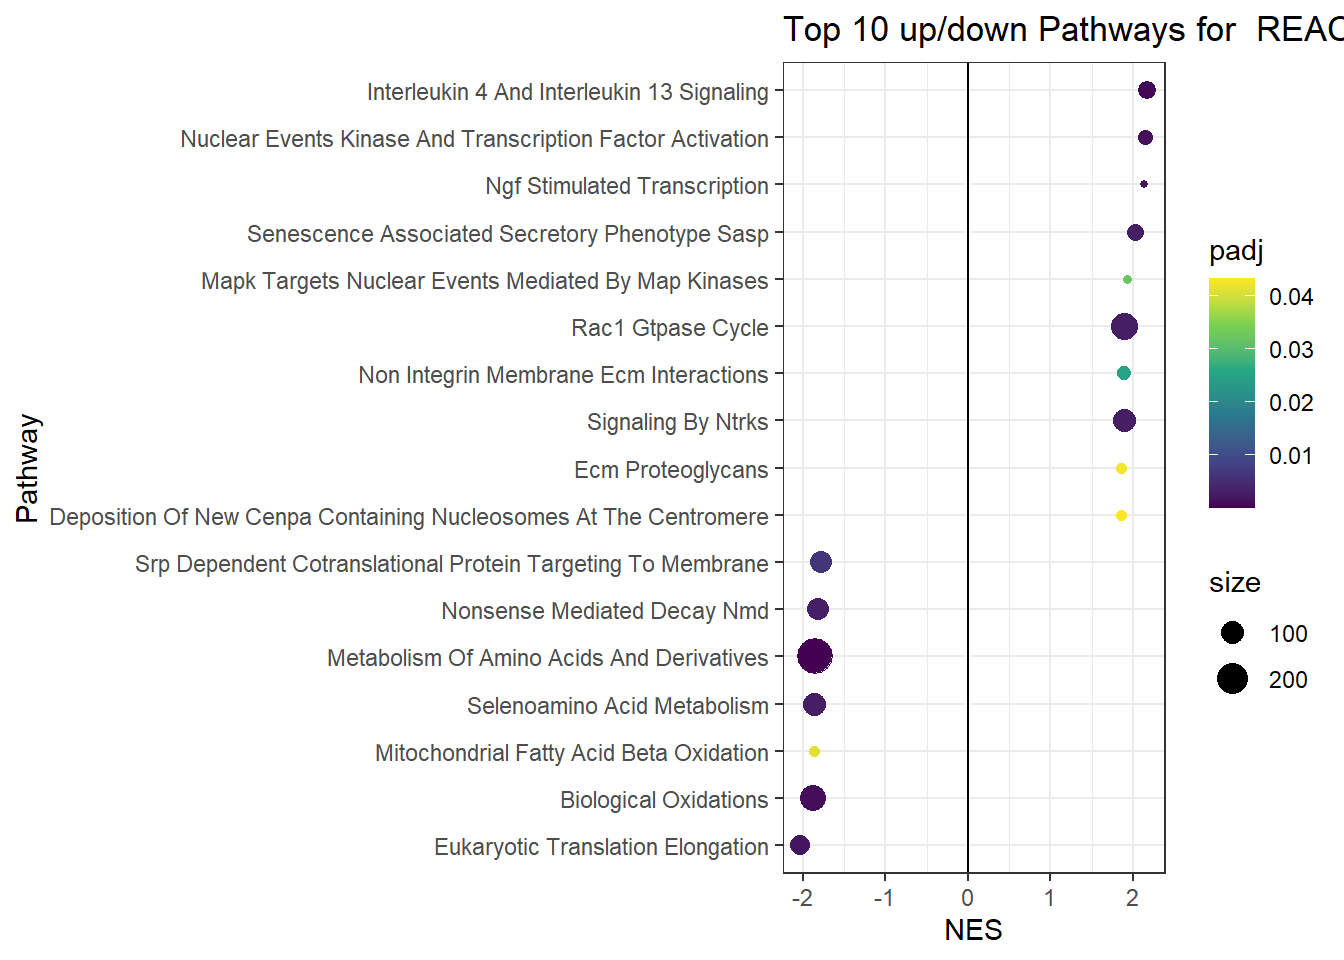

In [ ]:

REACTOME_plot_list[[7]]


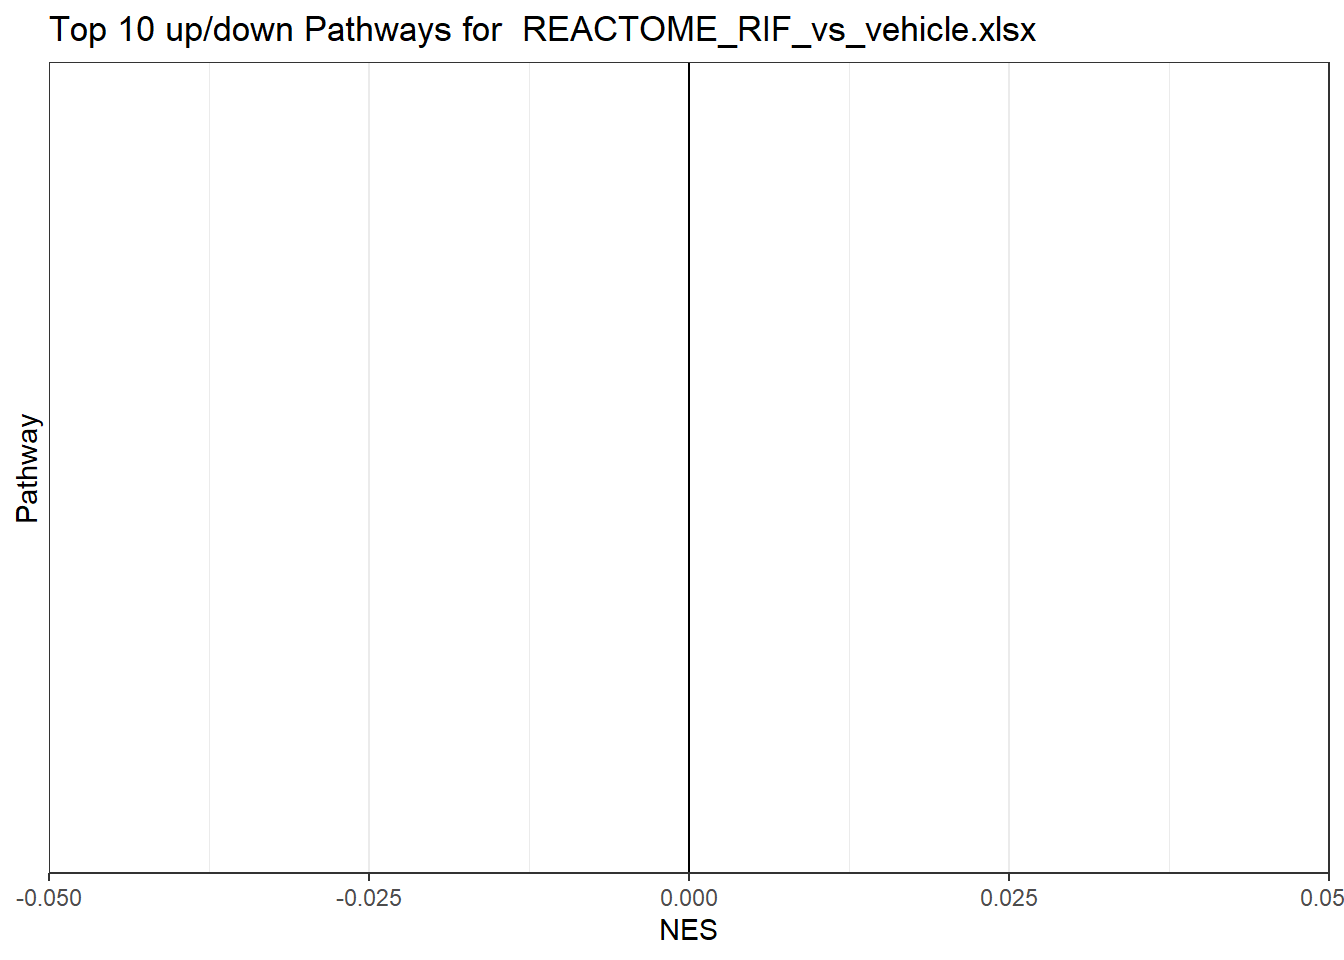

In [ ]:

REACTOME_plot_list[[8]]


### GO combined databases

CONSIDER :Split data into each of the GO databases:

1.  **Biological Process (BP)**, which describes the biological objectives to which the gene or gene product contributes.
2.  **Molecular Function (MF**), which describes the elemental activities of a gene product at the molecular level, such as binding or catalysis.
3.  **Cellular Component (CC)**, which describes where in the cell the gene product is active.

Get all file paths related to GO

In [ ]:
# Get file paths
go_file_paths <- dir(here("notebooks/seq/data_raw/GSEA"), pattern = "GO", full.names = TRUE)

# Subset to interleukines if wanted
# kegg_file_paths[grep(pattern = "IL", kegg_file_paths)]


In [ ]:
GO_plot_list <- map(go_file_paths, function(file_path) {
  # Read the file
  plot_data <- read_excel(file_path)
  
  # Process the data
  processed_data <- plot_data %>%
    arrange(desc(abs(NES))) %>%
    group_by(sign_NES = sign(NES)) %>%
    slice_head(n = 10) %>%
    ungroup() %>%
    filter(padj <= 0.05)
  
  # Generate the plot
  ggplot(processed_data,
         aes(x = NES,
             y = fct_reorder(pathway, NES),
             color = padj,
             size = size
             )
         ) +
    geom_point(stat = 'identity') +
    labs(x = "NES",
         y = "Pathway",
         title = paste("Top 10 up/down Pathways for","", basename(file_path))
         ) +
    theme_bw() +
    geom_vline(xintercept = 0) +
    scale_color_viridis_c() 
    #scale_color_viridis_c(option = "A")
    #scale_color_distiller(type = "seq", palette = "YlOrRd") #+
    #theme(legend.position = "none") # Remove legend to focus on the data
})


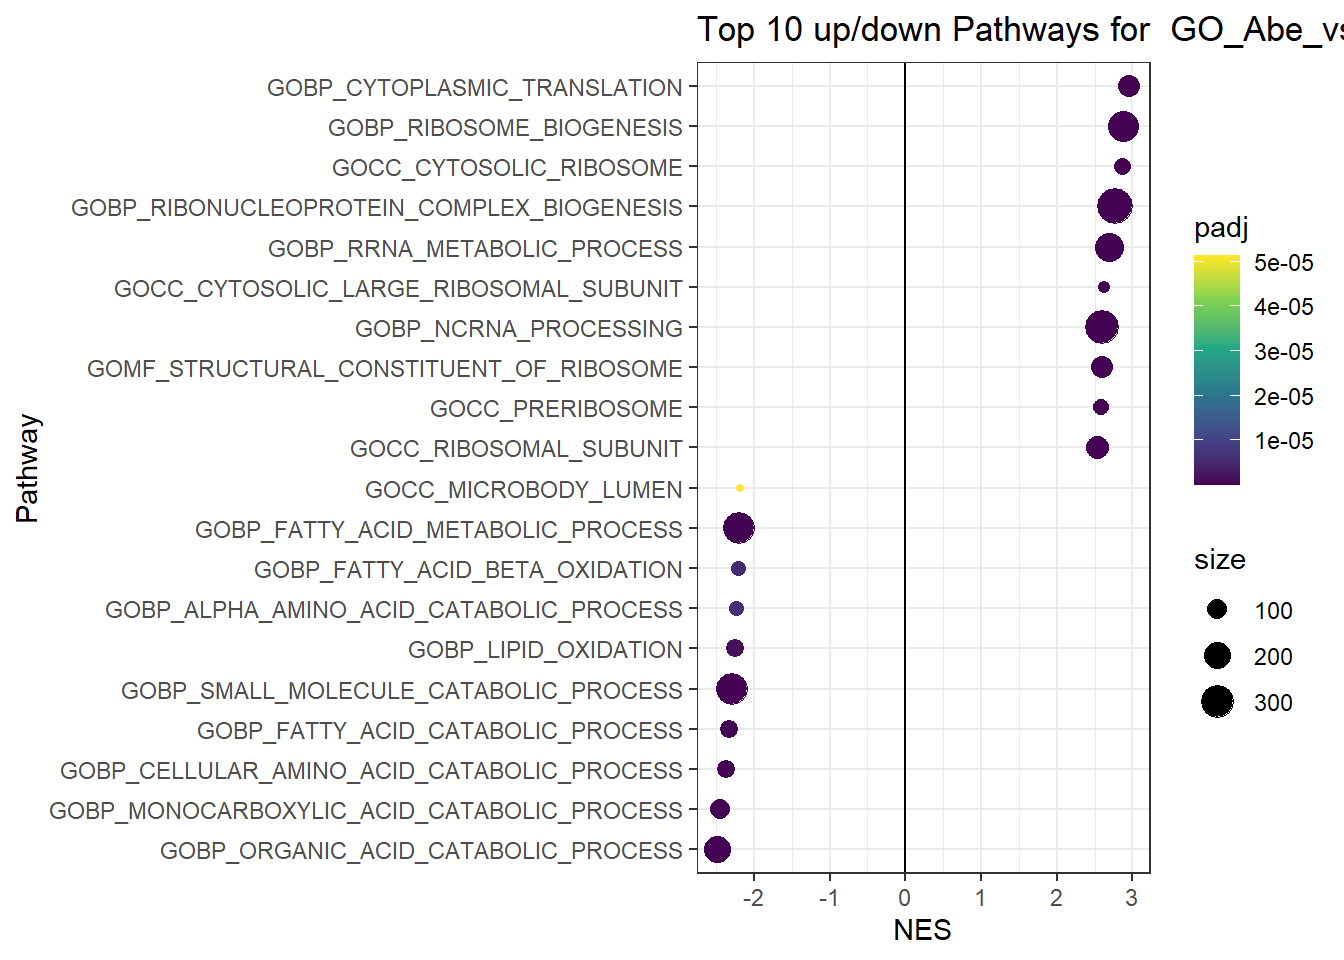

In [ ]:

GO_plot_list[[1]]


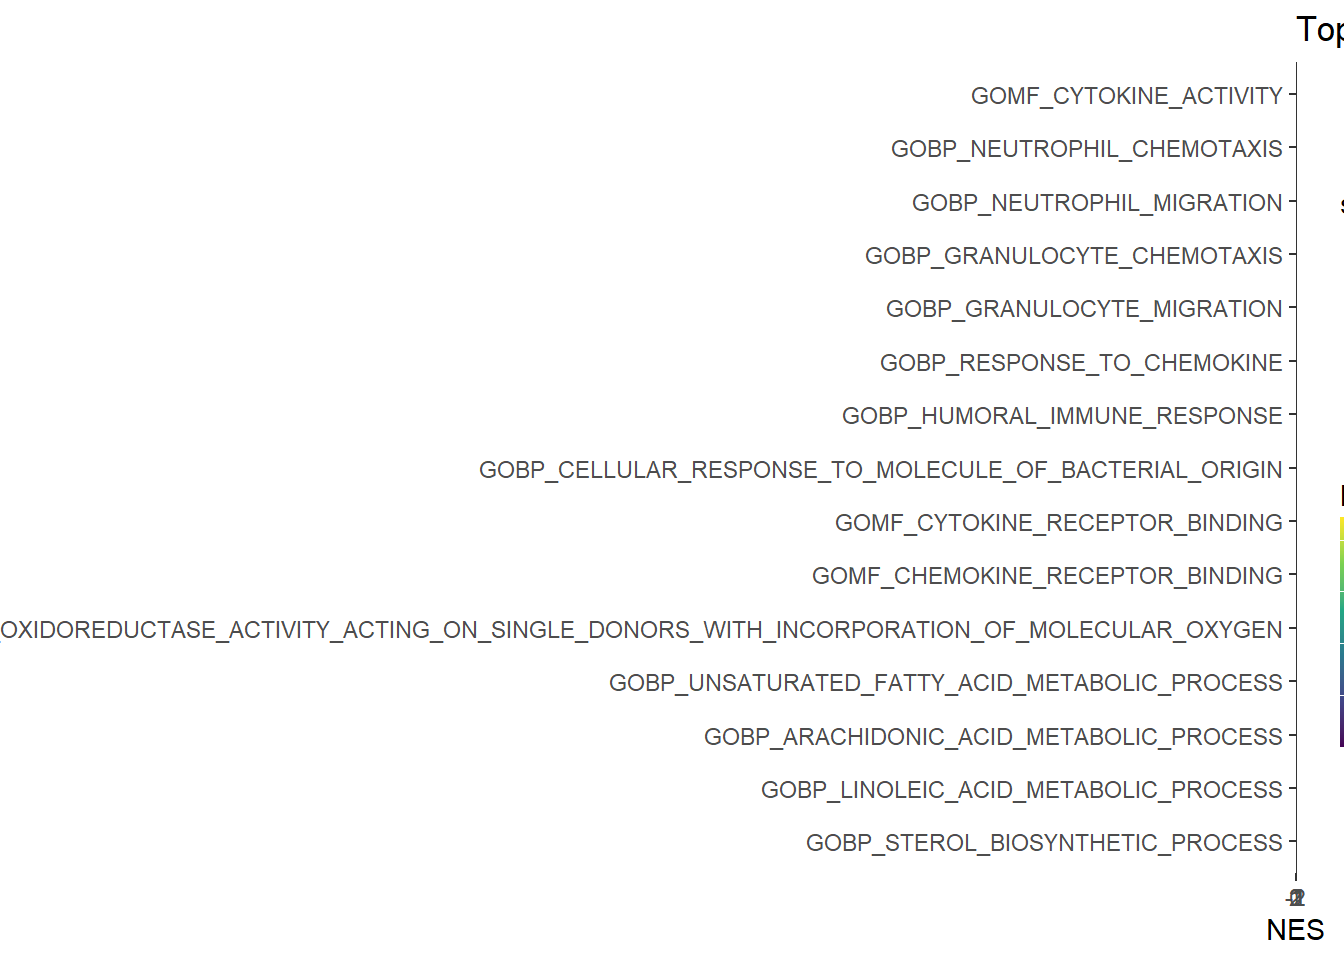

In [ ]:

GO_plot_list[[2]]


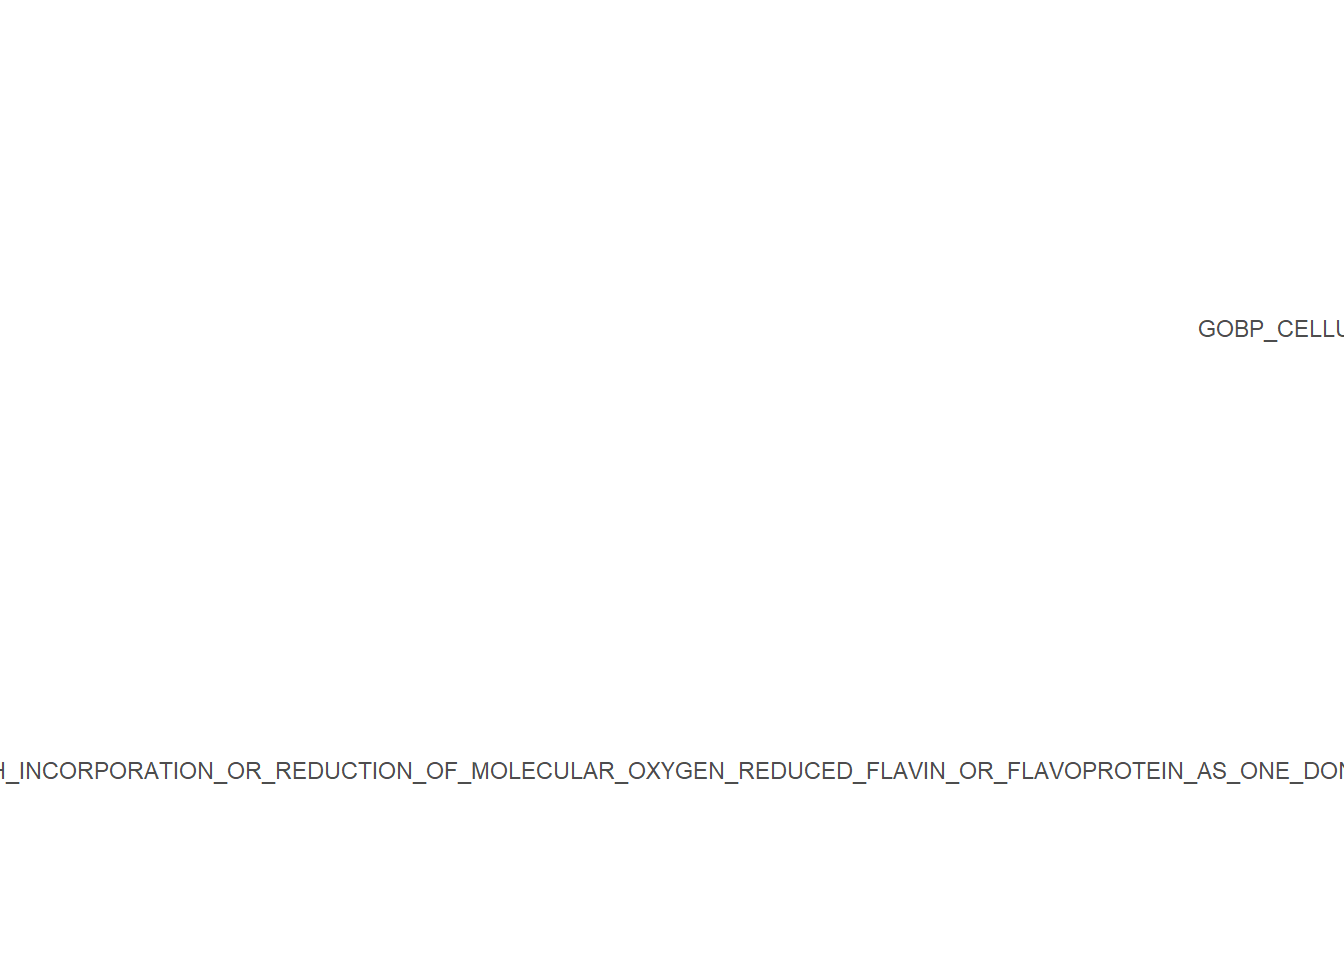

In [ ]:

GO_plot_list[[3]]


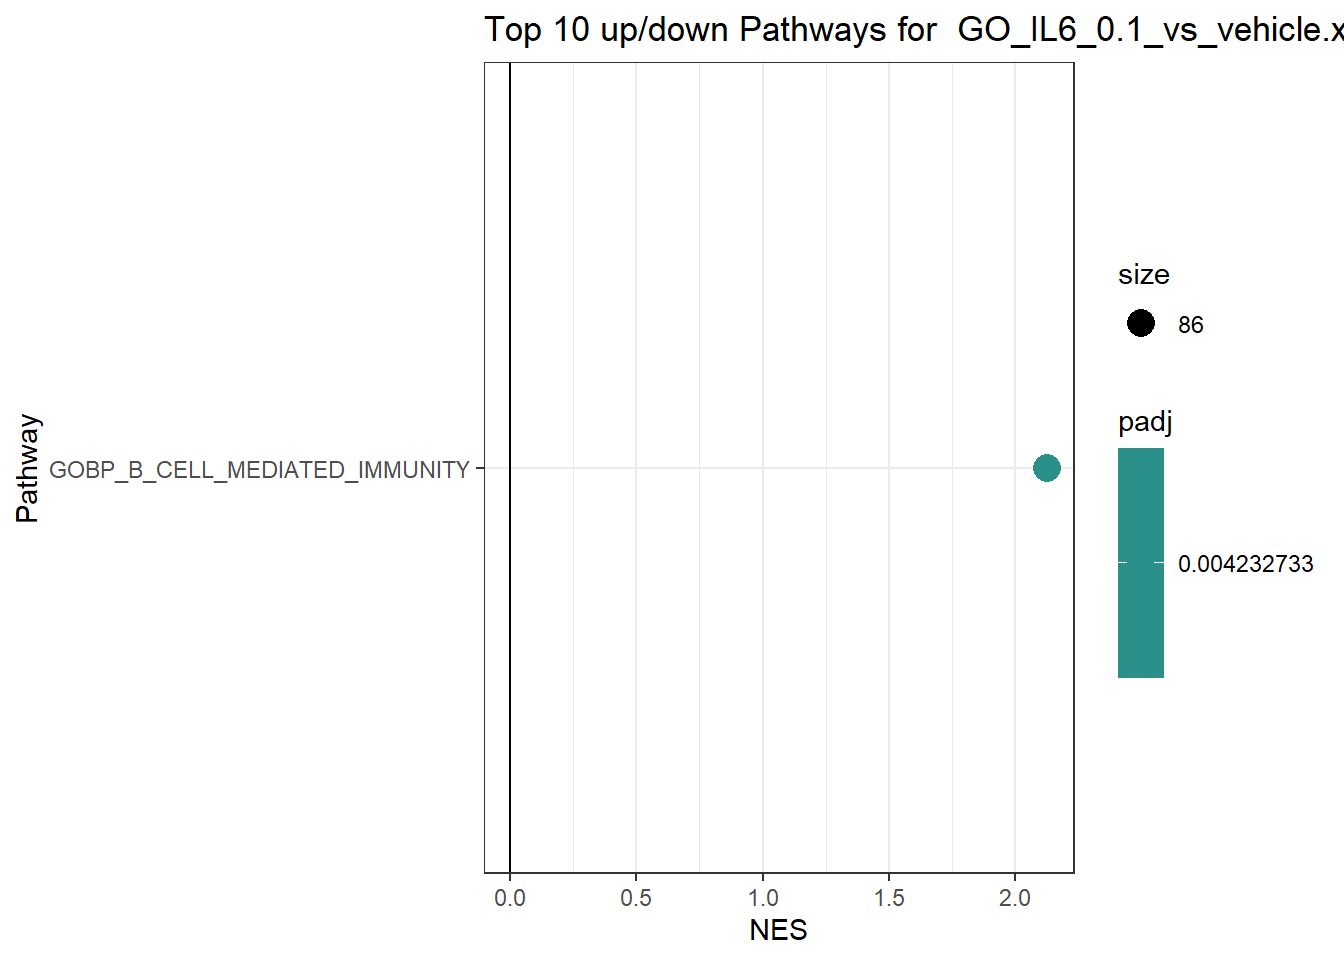

In [ ]:

GO_plot_list[[4]]


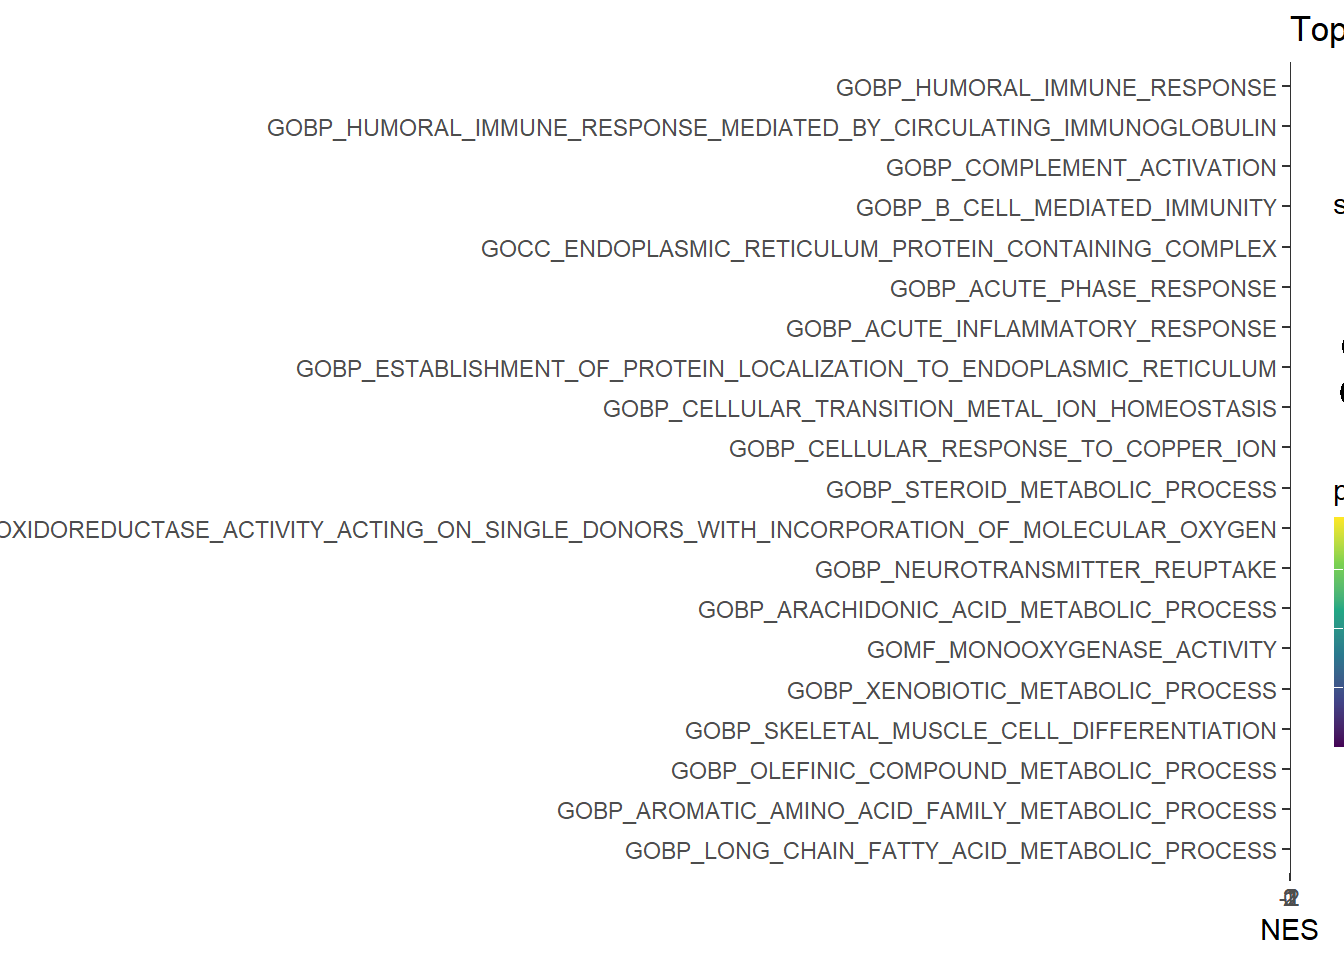

In [ ]:

GO_plot_list[[5]]


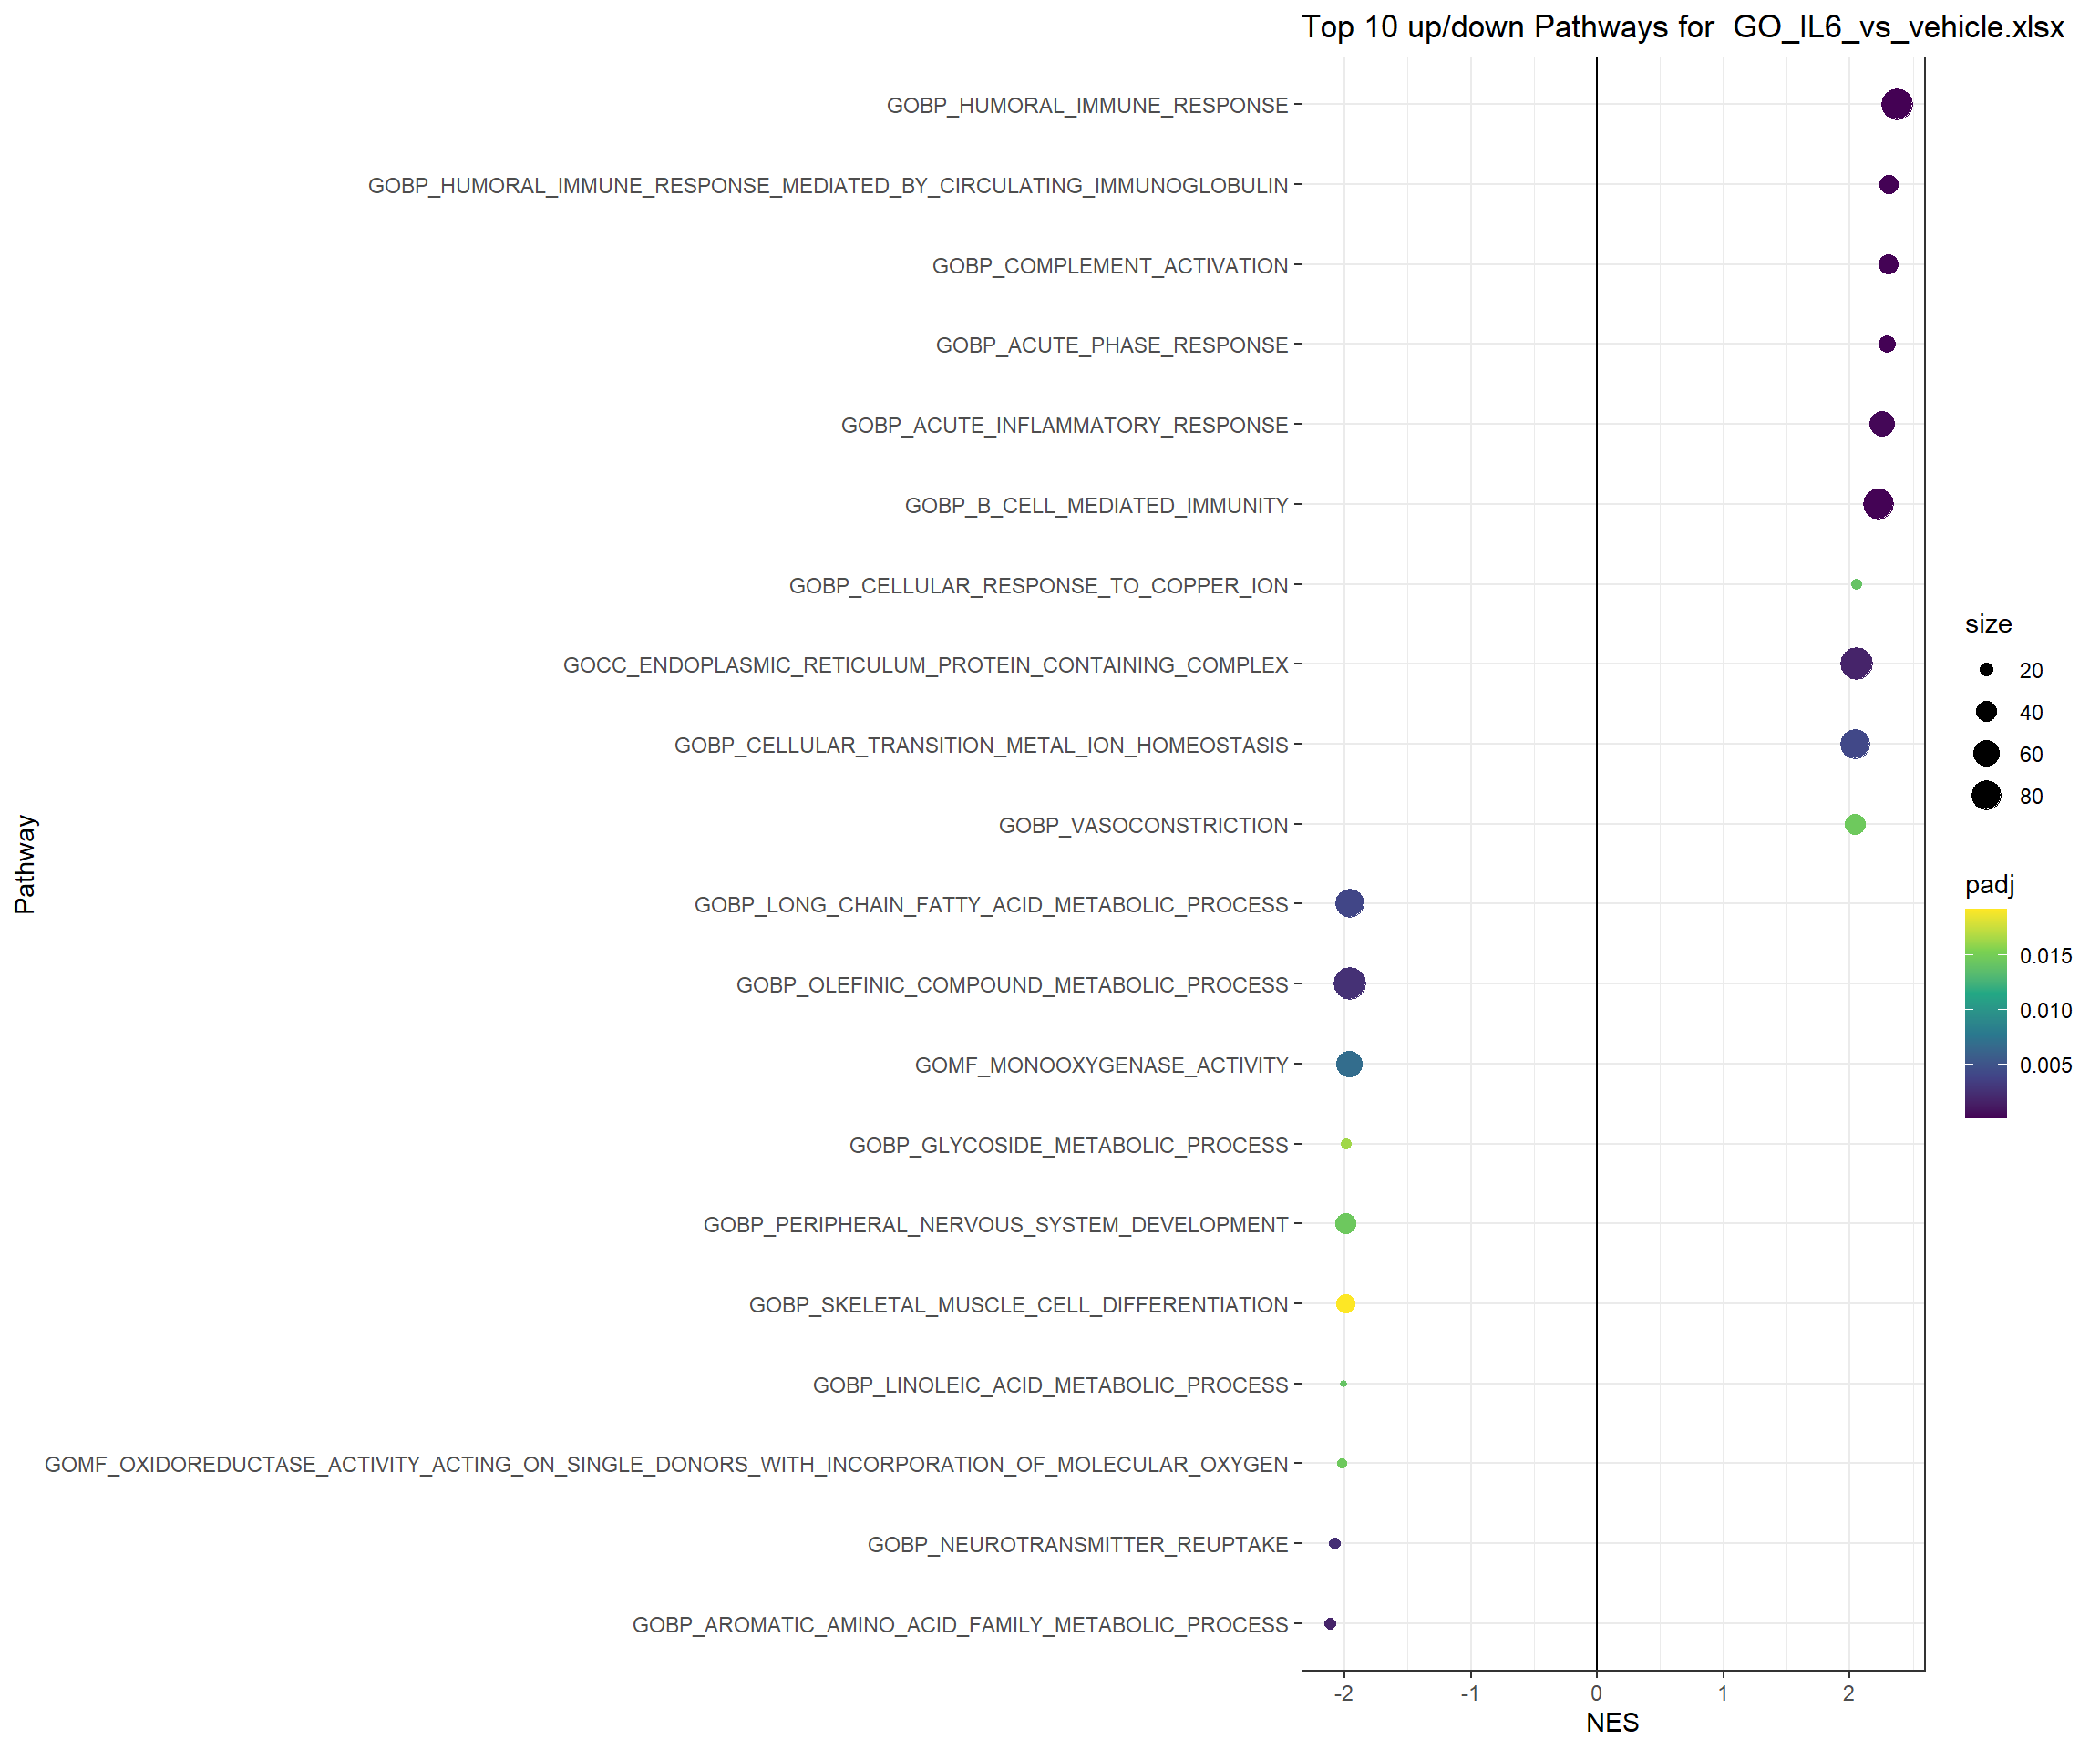

In [ ]:

GO_plot_list[[6]]


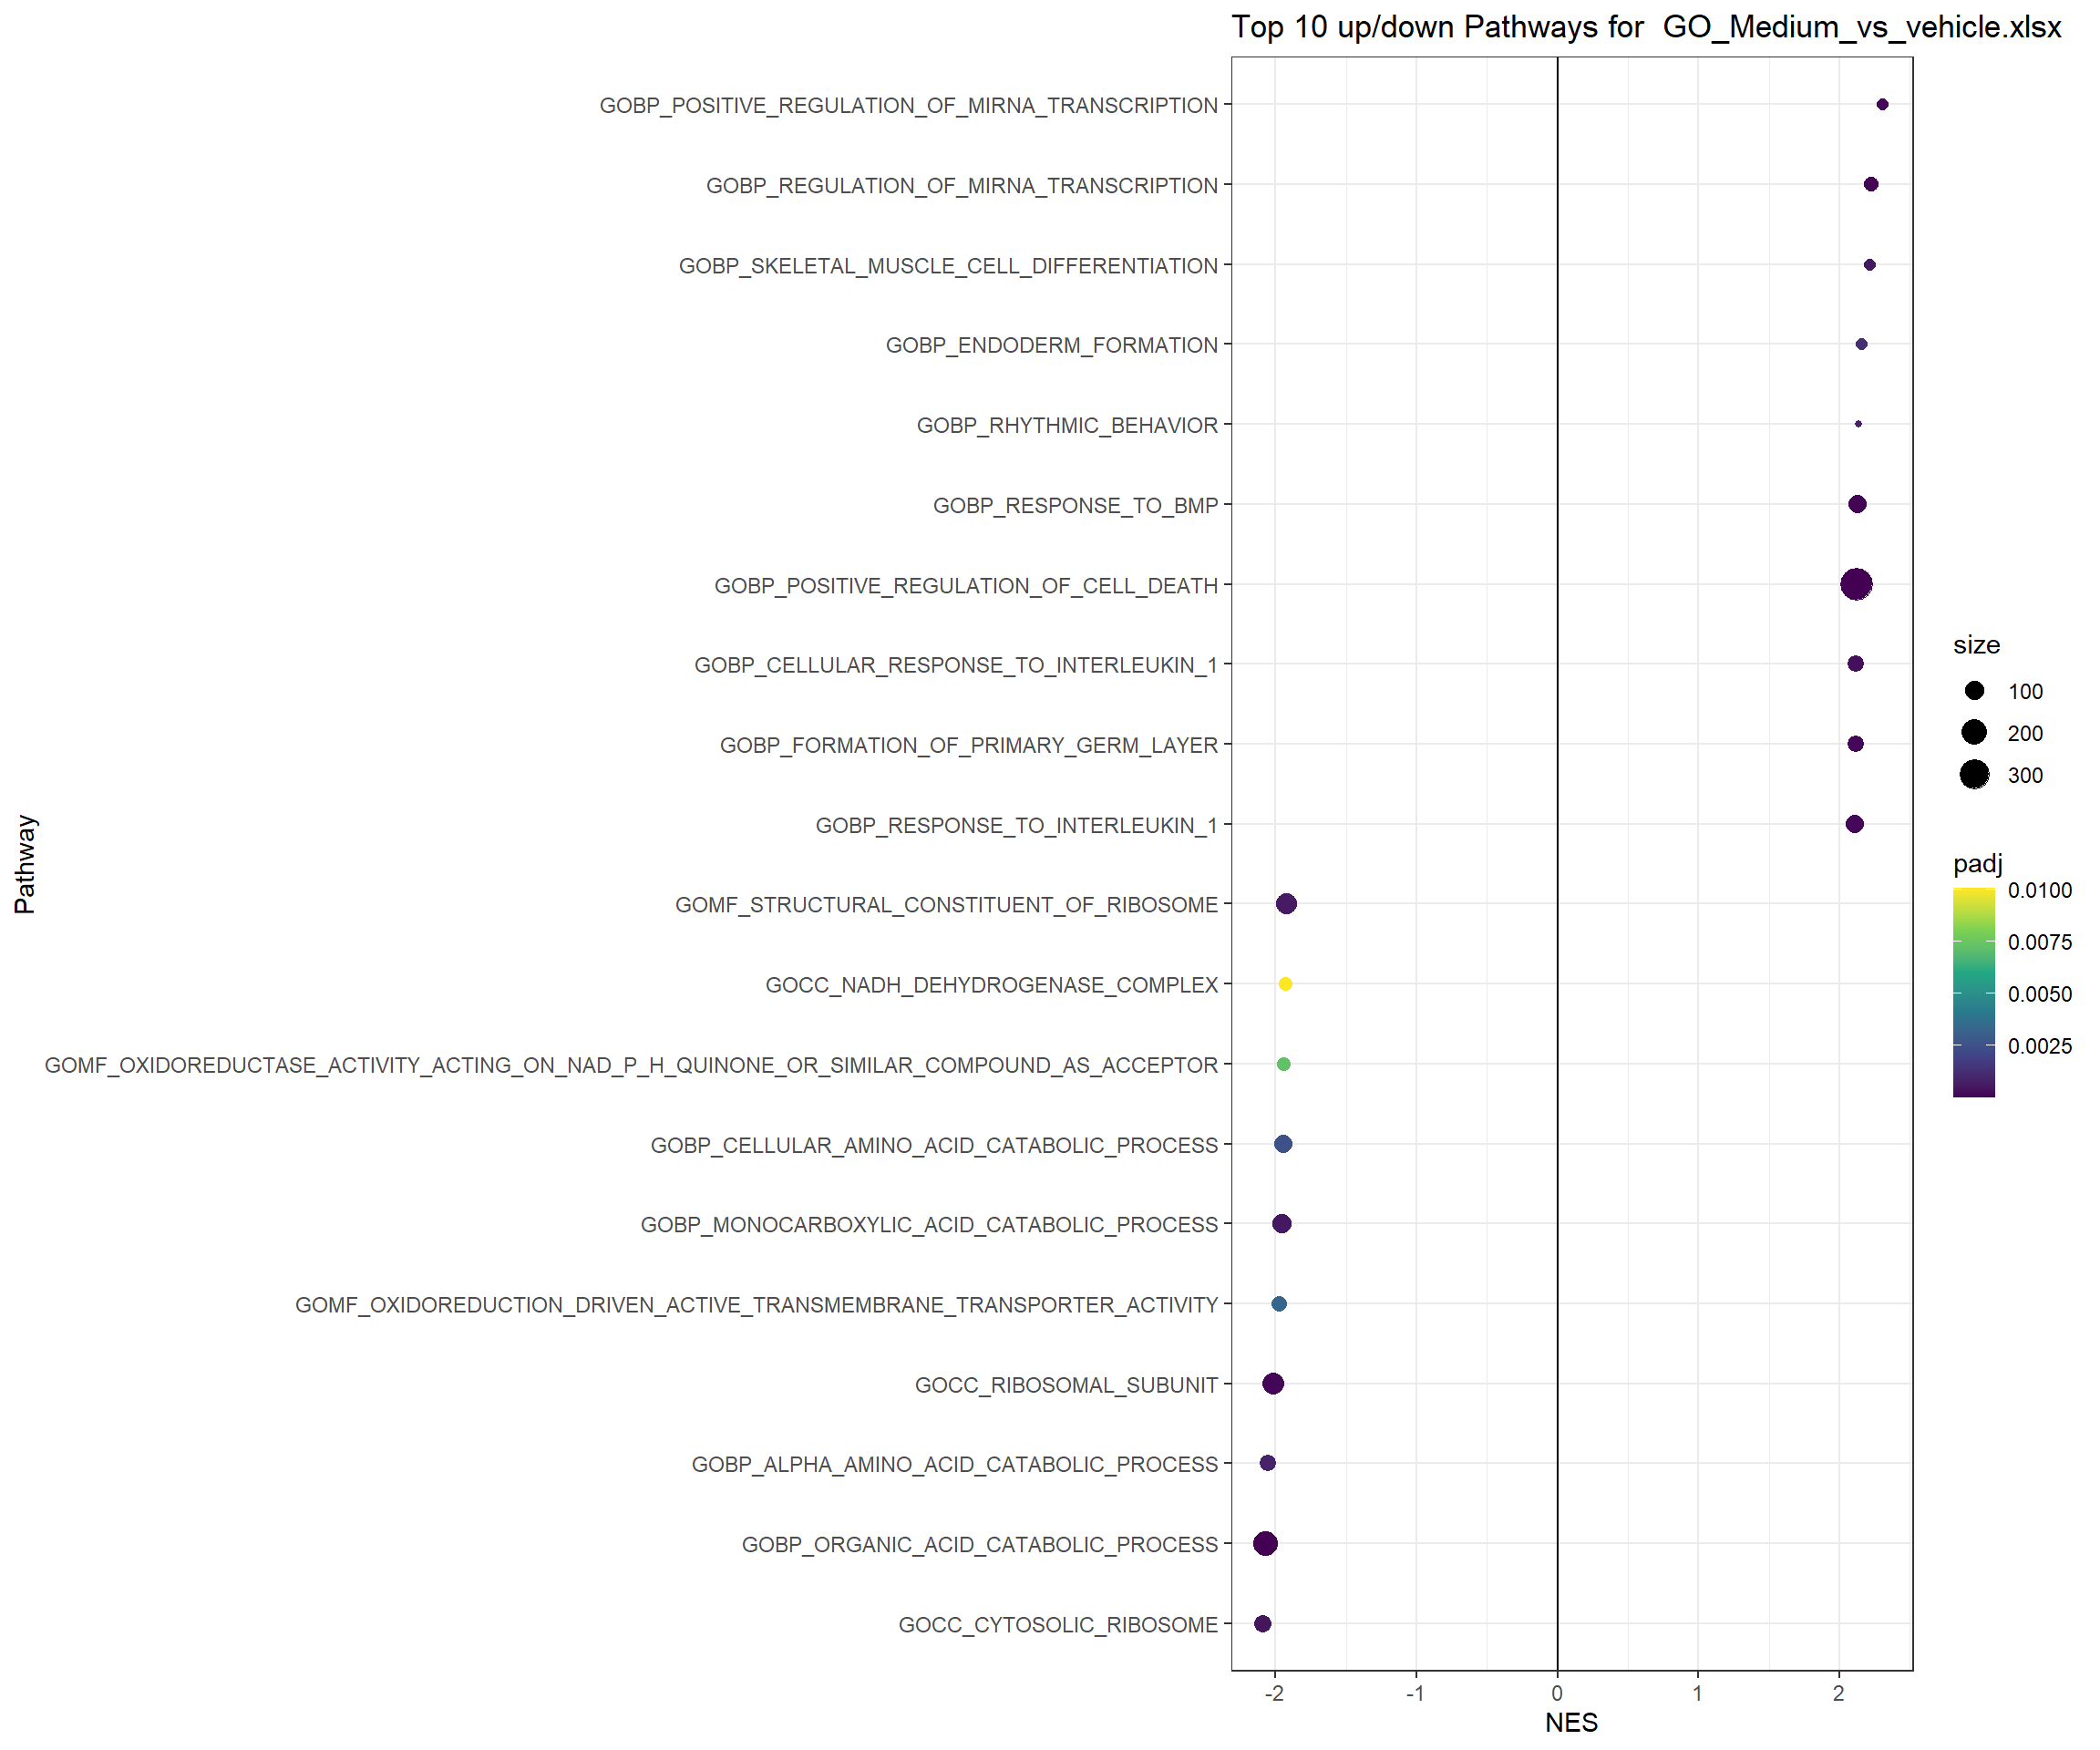

In [ ]:

GO_plot_list[[7]]


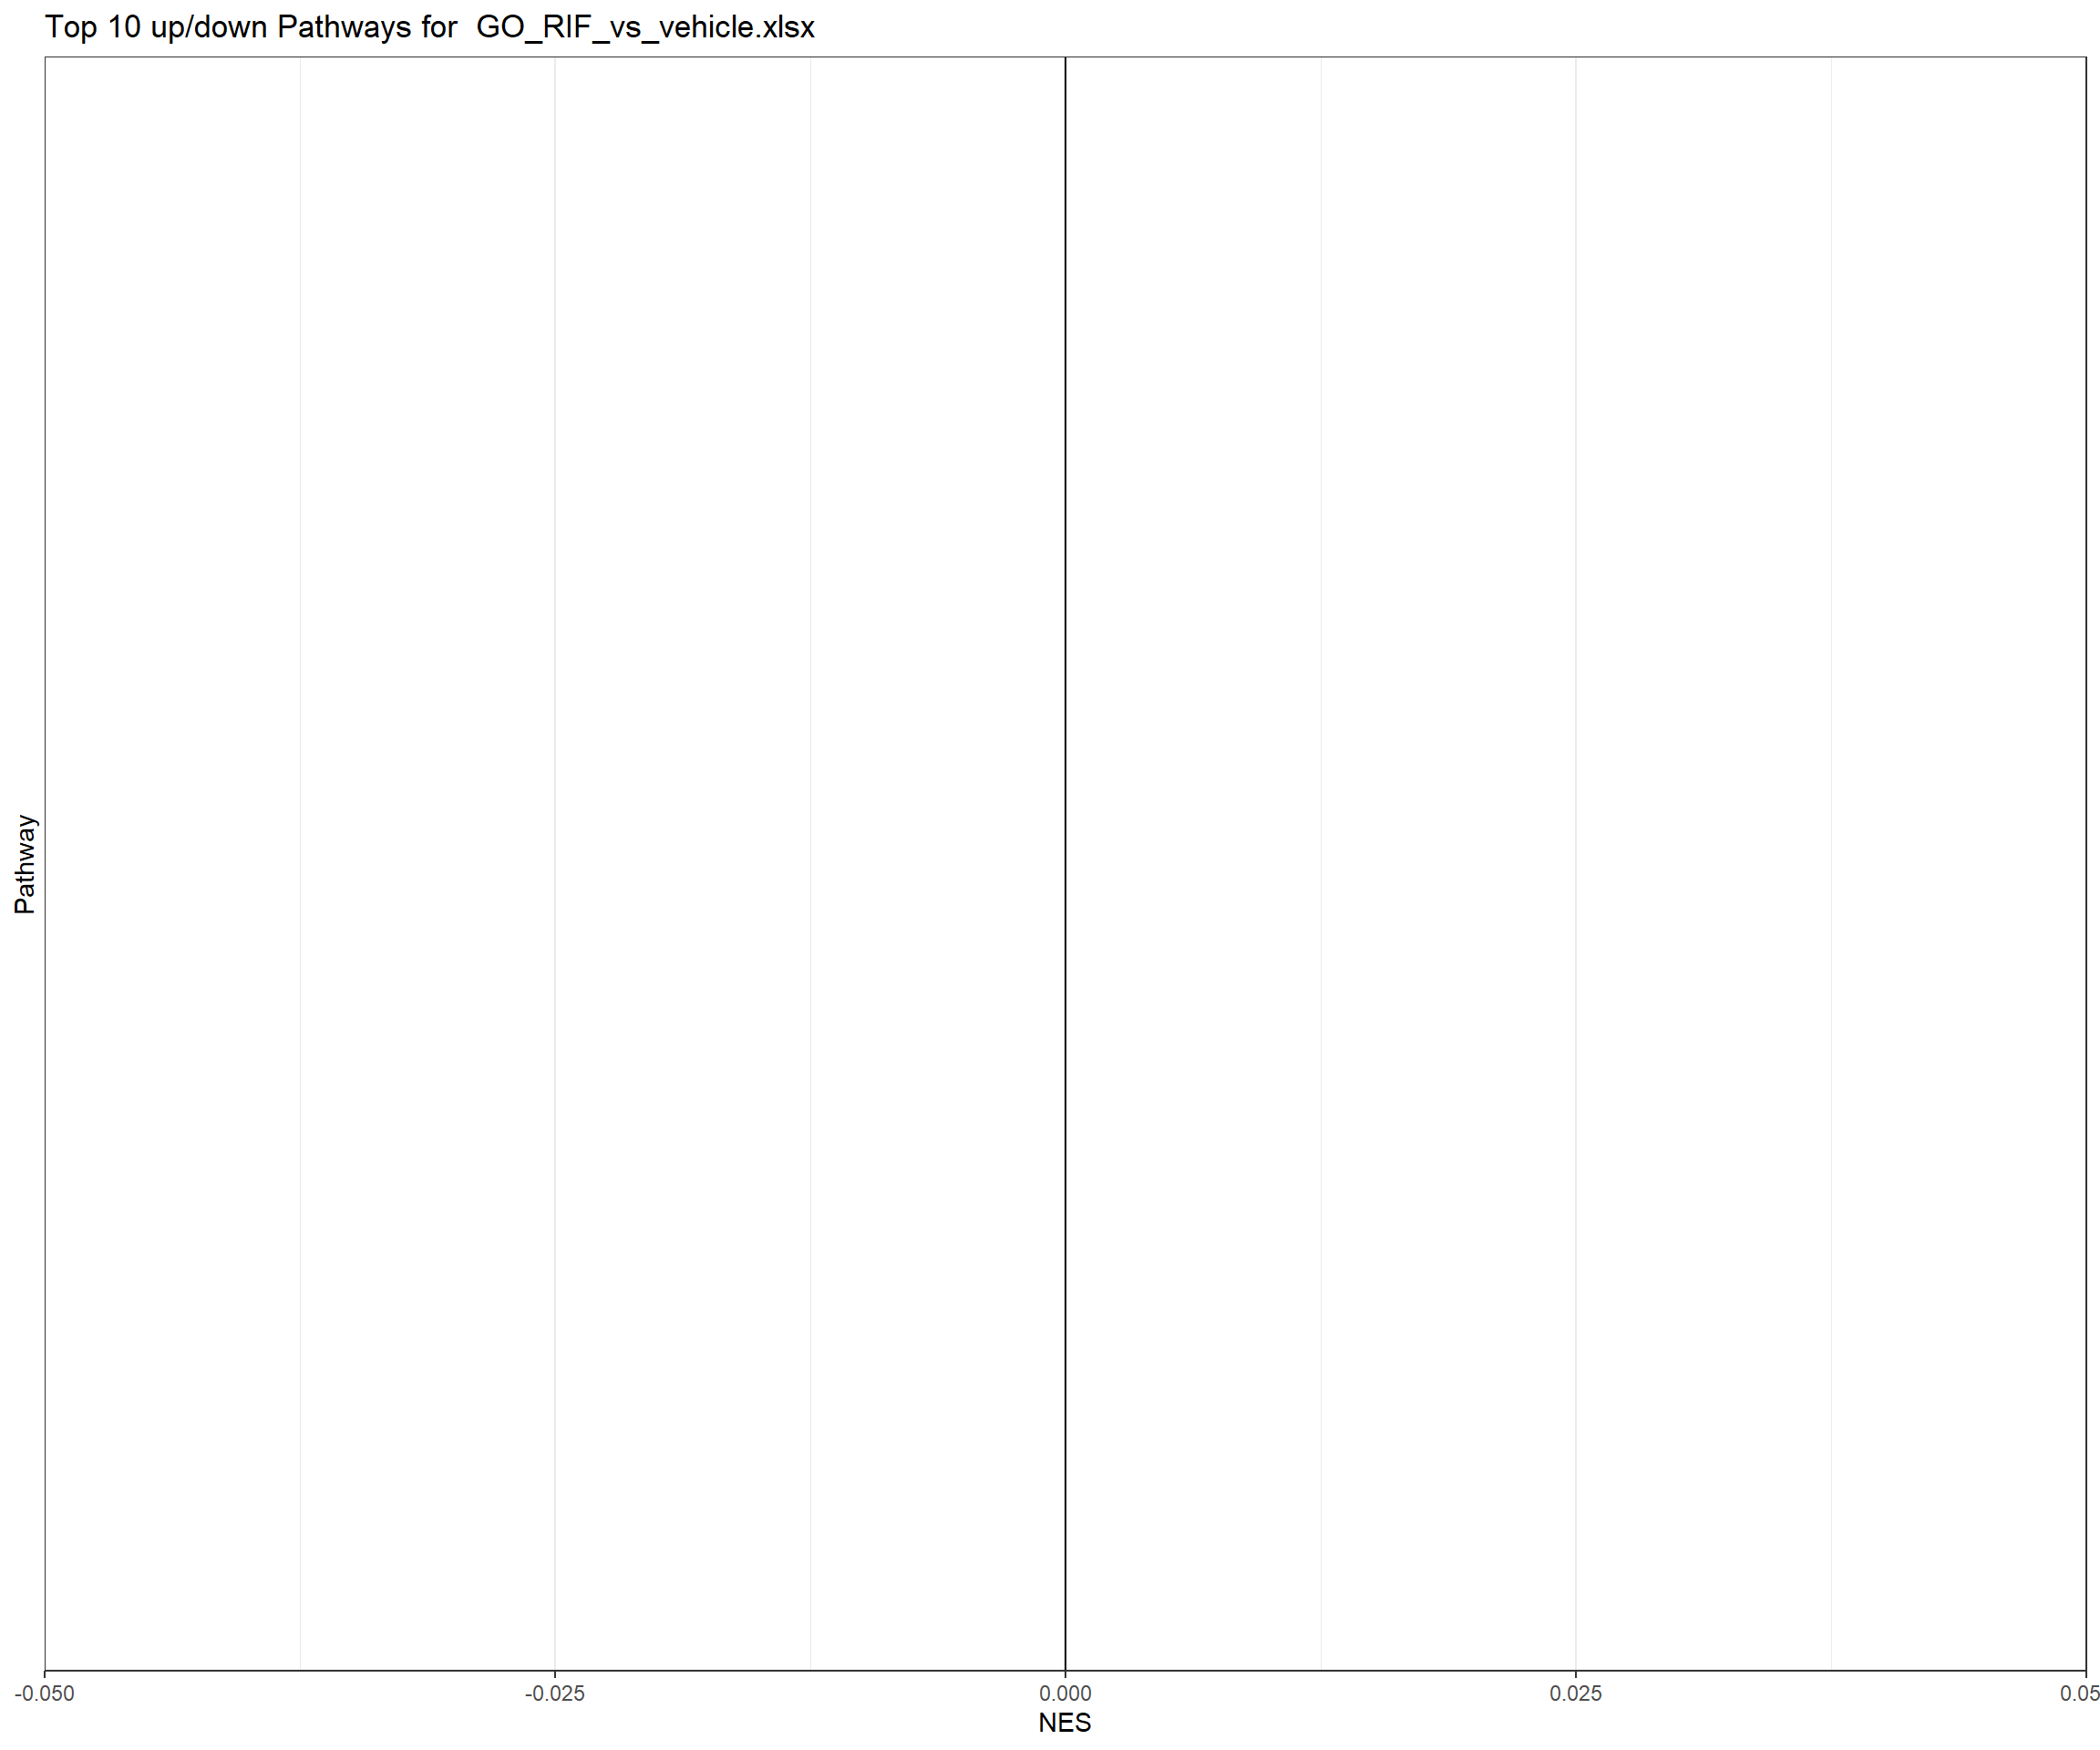

In [ ]:

GO_plot_list[[8]]


### GO split databases

In [ ]:
# Read the GO file paths, and for each dataframe, add a column denoting 
# Which GO database was used.
GO_sorted_dfs <- map(go_file_paths, function(path) {
  read_excel(path) %>%
    mutate(db = case_when(
      str_detect(pathway, "GOBP") ~ "BP",
      str_detect(pathway, "GOCC") ~ "CC",
      str_detect(pathway, "GOMF") ~ "MF"
    ))
})

# Process the dataframes. Arrange by absolute NES vaule, group on positive or 
# negative regulation. Take just top ten of each group, and filter in only stat
# significant pathways.
GO_processed_data <- map(GO_sorted_dfs, function(df) {
    df %>%
    arrange(desc(abs(NES))) %>%
    group_by(sign_NES = sign(NES)) %>%
    slice_head(n = 10) %>%
    ungroup() %>%
    filter(padj <= 0.05)
})


# Function to generate plots for each db category within a single dataframe
generate_plots <- function(df, file_path) {
  db_categories <- unique(df$db)
  plots <- map(db_categories, function(db_category) {
    filtered_data <- filter(df, db == db_category)
    plot <- ggplot(filtered_data,
                   aes(x = NES,
                       y = fct_reorder(pathway, NES),
                       color = padj,
                       size = size)) +
      geom_point(stat = 'identity') +
      labs(x = "NES",
           y = "Pathway",
           title = paste("Top 10 up/down Pathways for", db_category, basename(file_path))) +
      theme_bw() +
      geom_vline(xintercept = 0) +
      scale_color_viridis_c()
    plot
  })
  names(plots) <- db_categories
  return(plots)
}

# Map over GO_processed_data to generate plots for each dataframe
GO_plots <- map2(GO_processed_data, go_file_paths, generate_plots)

# GO_plots is a list of lists of plots, with each inner list containing three plots (one for each db category)


# Extracting treatment names from the file paths
# Assuming the treatment names are directly before "vs_vehicle.xlsx" in the file names
treatment_names <- sapply(go_file_paths, function(path) {
  # Extract the part of the filename before "vs_vehicle.xlsx"
  treatment_name <- sub(".*GO_(.*)_vs_vehicle\\.xlsx$", "\\1", basename(path))
  # Replace underscores with spaces or any other necessary formatting
  treatment_name <- gsub("_", " ", treatment_name)
  treatment_name
})

# Now, apply these names to your combined_GO_plots list
names(GO_plots) <- treatment_names


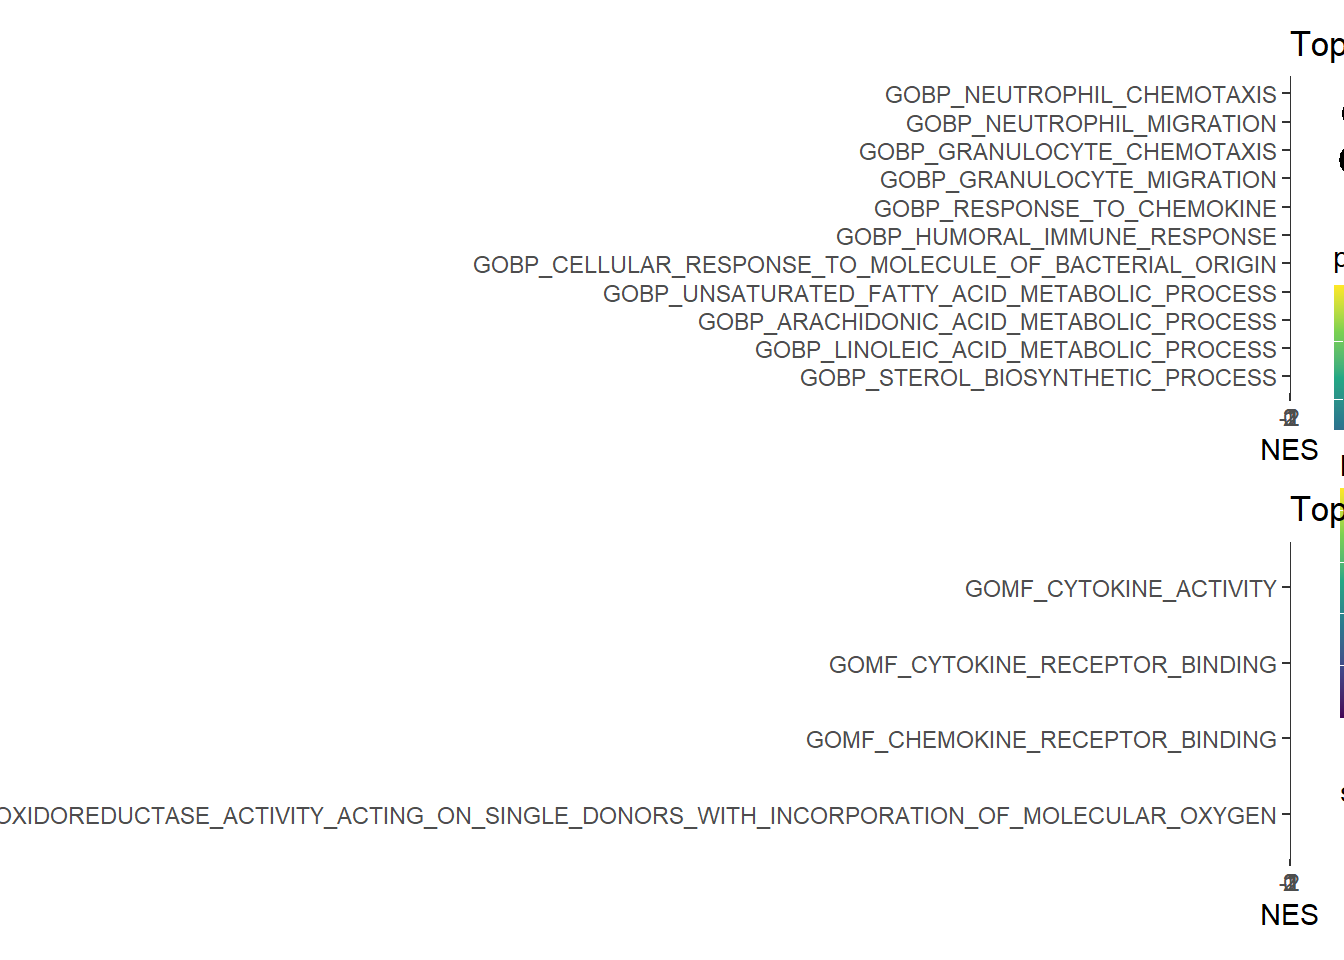

In [ ]:

# Combine plots from each database
combined_plot <- GO_plots[[2]]$BP + GO_plots[[2]]$CC + GO_plots[[2]]$MF + 
  plot_layout(ncol = 1) # Arranges the plots in a single column

# Print the combined plot
print(combined_plot)


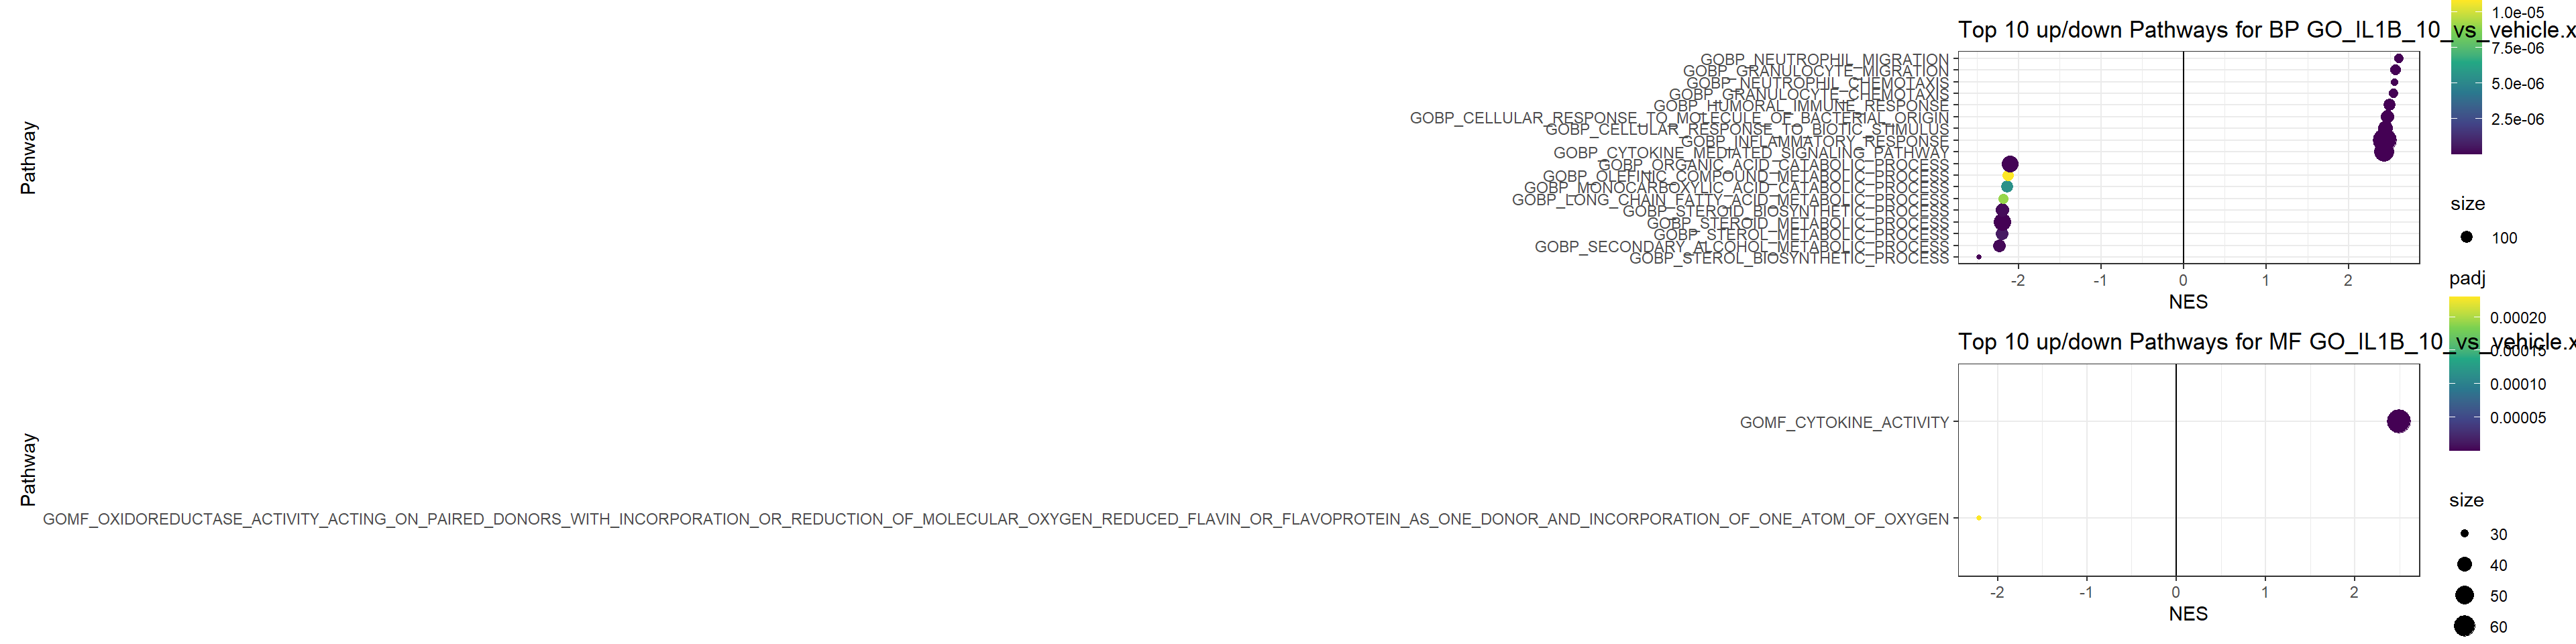

In [ ]:

# Combine plots from each database
combined_plot <- GO_plots[[3]]$BP + GO_plots[[3]]$CC + GO_plots[[3]]$MF + 
  plot_layout(ncol = 1) # Arranges the plots in a single column

# Print the combined plot
print(combined_plot)


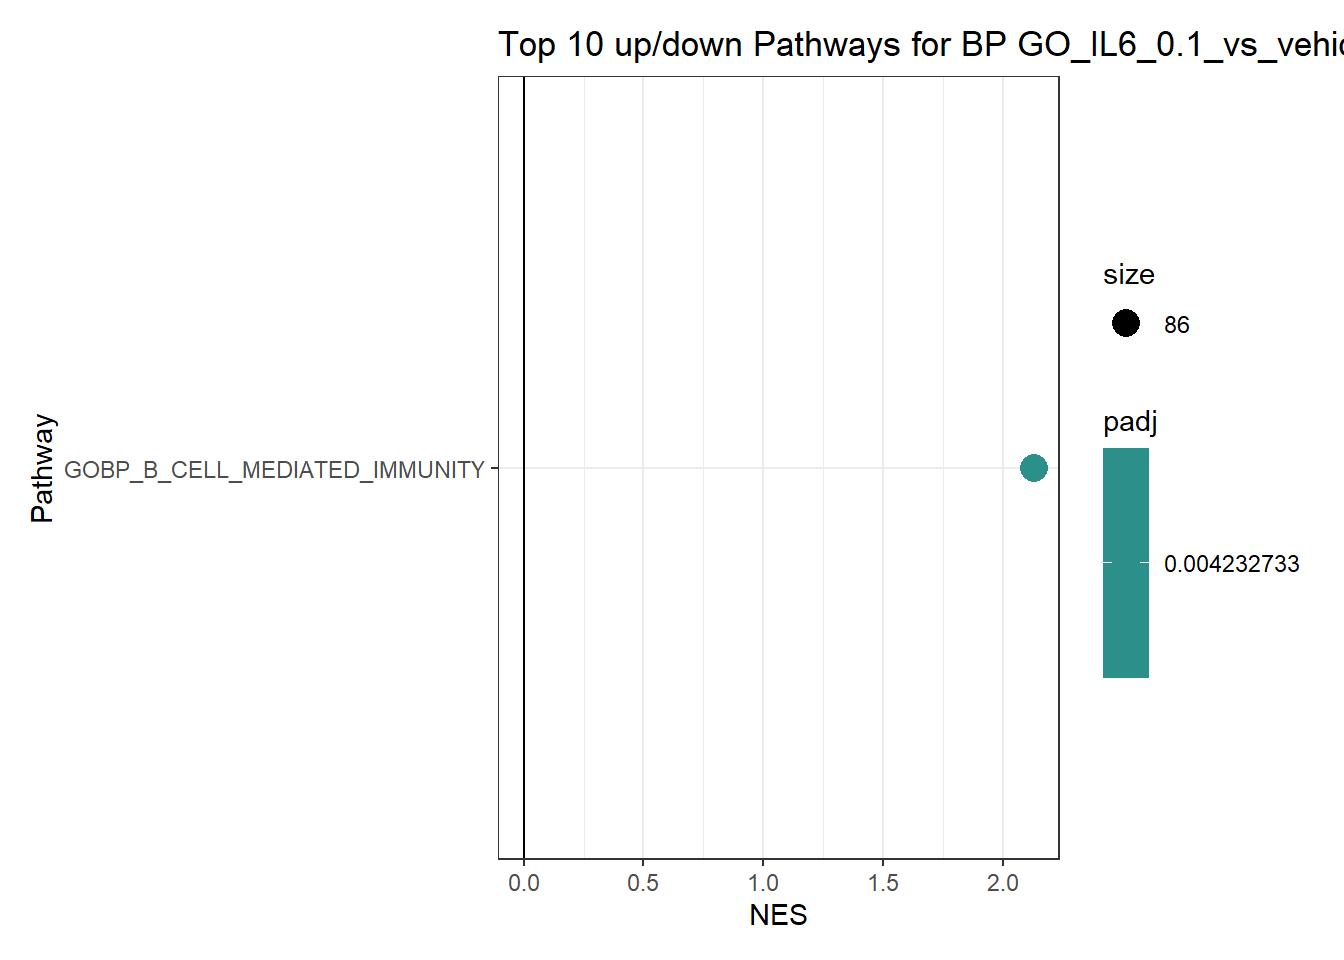

In [ ]:

# Combine plots from each database
combined_plot <- GO_plots[[4]]$BP + GO_plots[[4]]$CC + GO_plots[[4]]$MF + 
  plot_layout(ncol = 1) # Arranges the plots in a single column

# Print the combined plot
print(combined_plot)


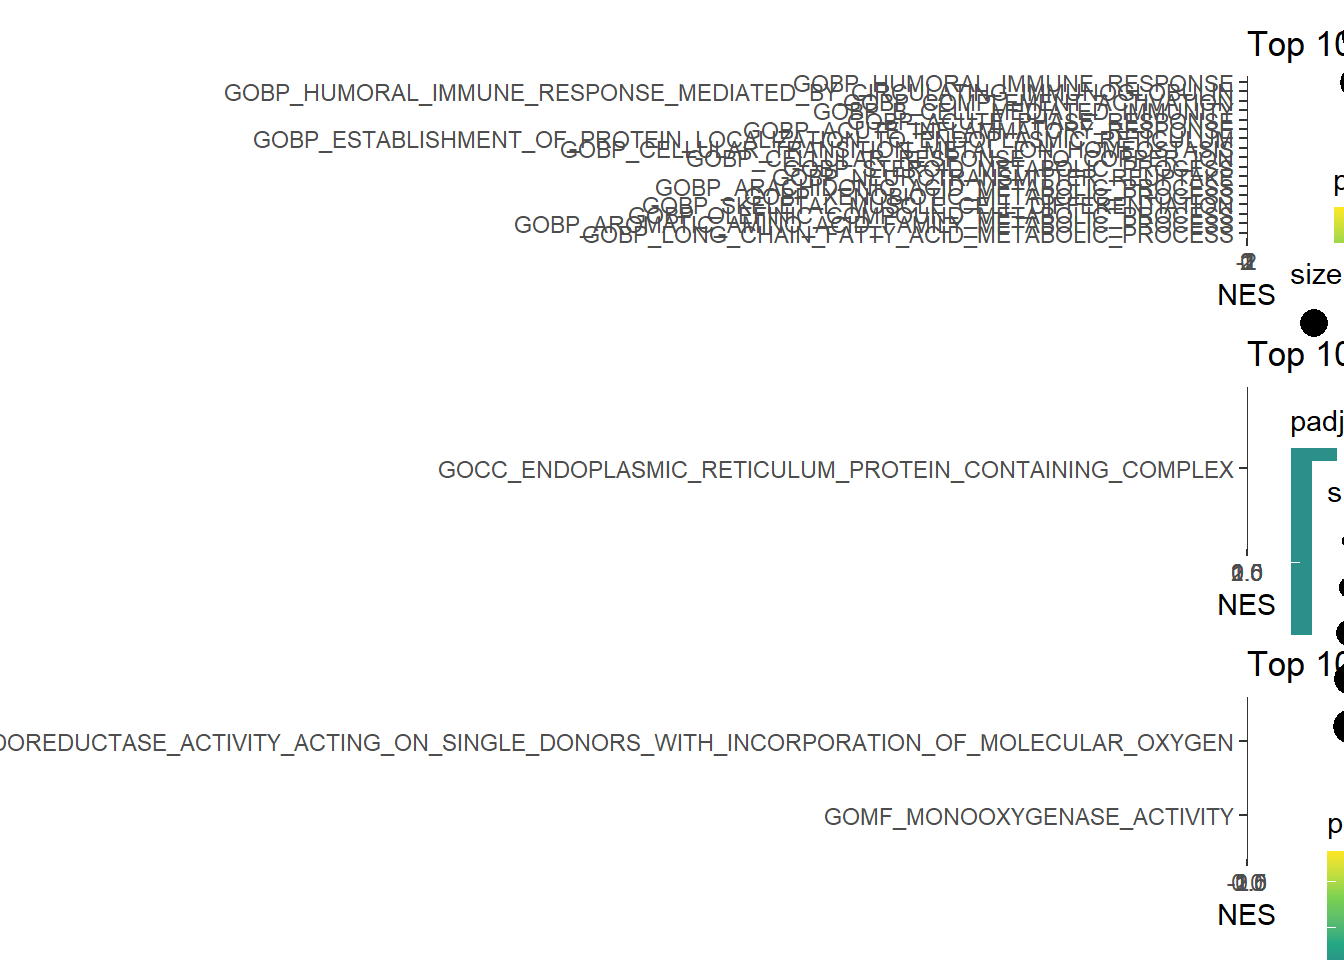

In [ ]:

# Combine plots from each database
combined_plot <- GO_plots[[5]]$BP + GO_plots[[5]]$CC + GO_plots[[5]]$MF + 
  plot_layout(ncol = 1) # Arranges the plots in a single column

# Print the combined plot
print(combined_plot)


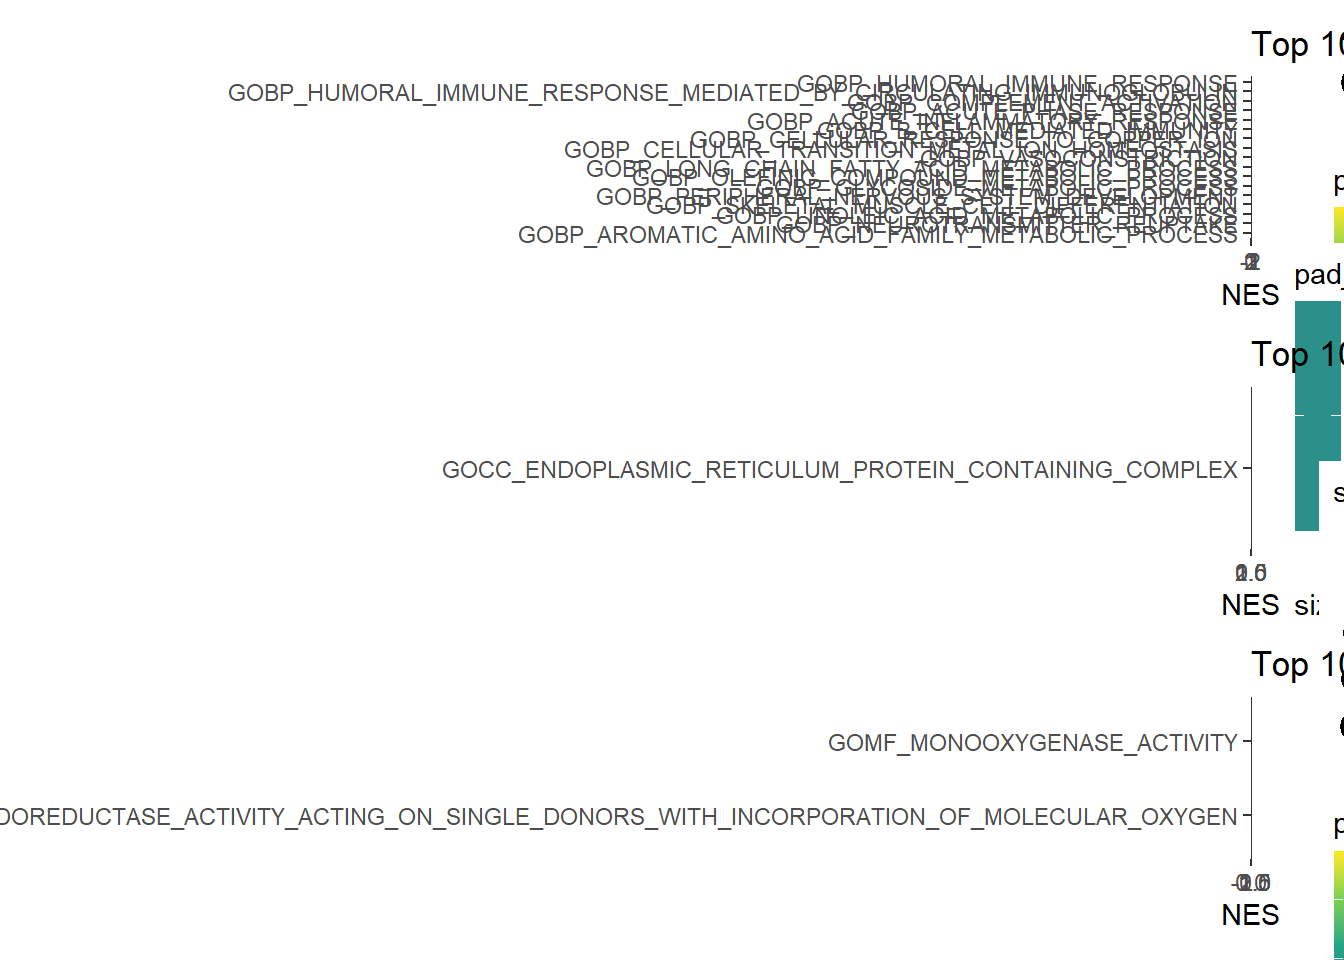

In [ ]:

# Combine plots from each database
combined_plot <- GO_plots[[6]]$BP + GO_plots[[6]]$CC + GO_plots[[6]]$MF + 
  plot_layout(ncol = 1) # Arranges the plots in a single column

# Print the combined plot
print(combined_plot)


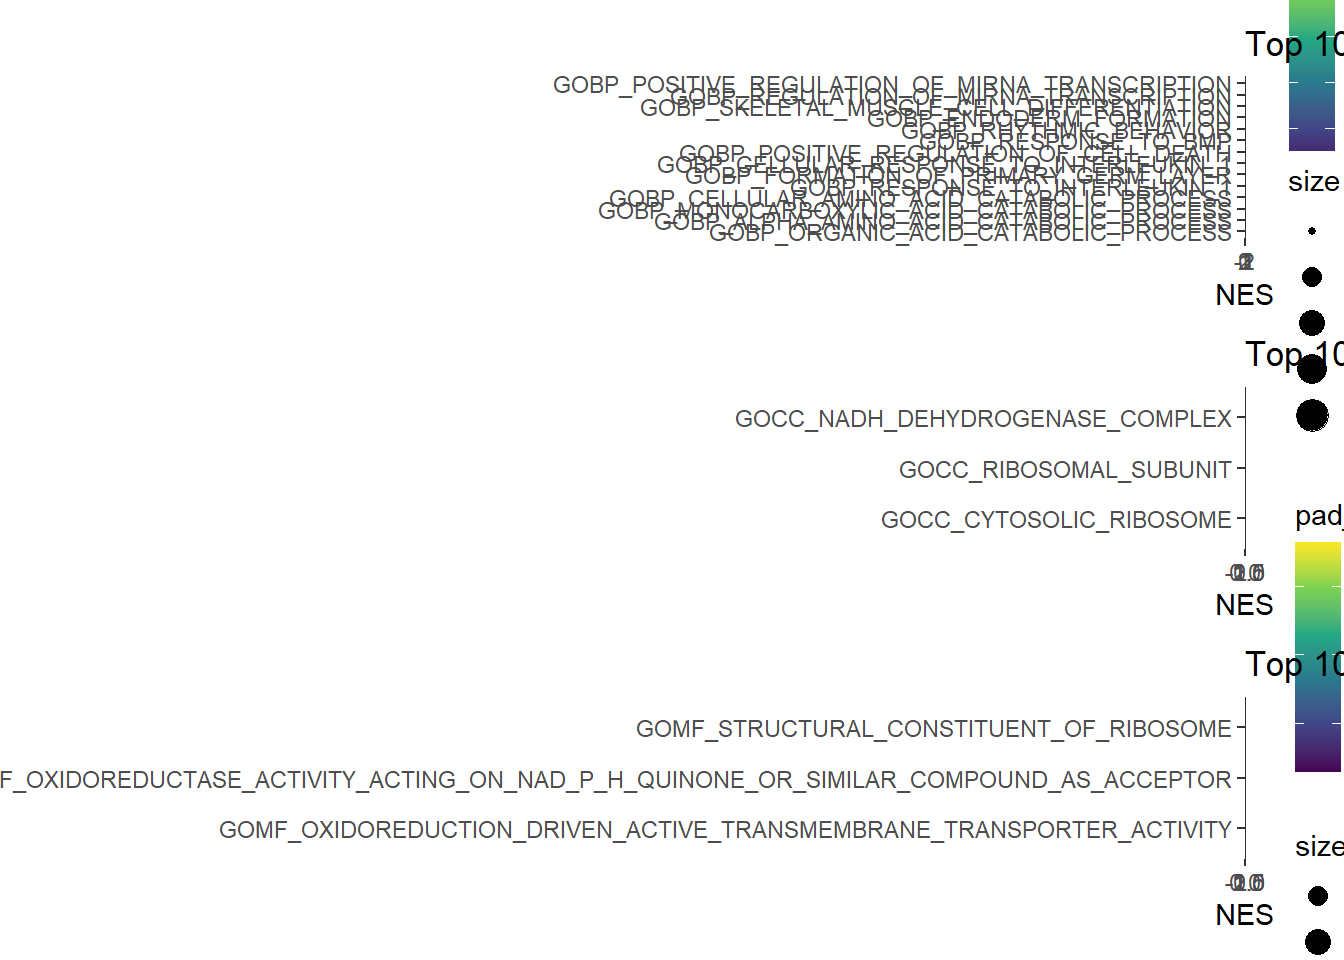

In [ ]:

# Combine plots from each database
combined_plot <- GO_plots[[7]]$BP + GO_plots[[7]]$CC + GO_plots[[7]]$MF + 
  plot_layout(ncol = 1) # Arranges the plots in a single column

# Print the combined plot
print(combined_plot)
